In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandasql as sql
import os
import math
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from functools import reduce
from scipy import stats


In [3]:
from sklearn.neighbors import KDTree
from pysal.lib.cg import KDTree as GeodesicKDTree, RADIUS_EARTH_KM

C:\ProgramData\AnacondaInstall\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [4]:
from math import sqrt

In [5]:
df = pd.read_csv(r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\TRIAL\AggregateMessurement\final.csv")
df.head()

Unnamed: 0  Unnamed: 0.1  Measured_order Measurement_file     Month  \
0           0             0             0.0           m1.csv  November   
1           1             1             1.0           m1.csv  November   
2           2             2             2.0           m1.csv  November   
3           3             3             3.0           m1.csv  November   
4           4             4             4.0           m1.csv  November   

         Day                  Start_Time                    End_Time  \
0  Wednesday  2017-11-01 16:17:38.835090  2017-11-01 16:17:58.835092   
1  Wednesday  2017-11-01 16:17:58.835092  2017-11-01 16:17:59.835087   
2  Wednesday  2017-11-01 16:17:59.835087  2017-11-01 16:18:00.835091   
3  Wednesday  2017-11-01 16:18:00.835091  2017-11-01 16:18:01.835096   
4  Wednesday  2017-11-01 16:18:01.835096  2017-11-01 16:18:03.835085   

                    Duration  Duration_in_hours  Duration_in_minutes  \
0  0 days 00:00:20.000002000           0.005556             0.333333   
1  0 days 00:00:00.999995000           0.000278             0.016667   
2  0 days 00:00:01.000004000           0.000278             0.016667   
3  0 days 00:00:01.000005000           0.000278             0.016667   
4  0 days 00:00:01.999989000           0.000556             0.033333   

   Agg_Velocity  Agg_Temp  Predicted_Seg  
0      5.046855      12.5         6512.0  
1      6.627475      12.5         6513.0  
2      3.310169      12.5         6516.0  
3      3.573751      12.5         6521.0  
4      7.243261      12.5         6524.0

In [6]:
df[['Measurement_file','allele']] = df['Measurement_file'].str.split('.',expand=True)
df[['Measurement_file','Measurement_file']] = df['Measurement_file'].str.split('m',expand=True)
del df['allele']
df['Measurement_file'] = df['Measurement_file'].astype(int)

In [7]:
df.head()

Unnamed: 0  Unnamed: 0.1  Measured_order  Measurement_file     Month  \
0           0             0             0.0                 1  November   
1           1             1             1.0                 1  November   
2           2             2             2.0                 1  November   
3           3             3             3.0                 1  November   
4           4             4             4.0                 1  November   

         Day                  Start_Time                    End_Time  \
0  Wednesday  2017-11-01 16:17:38.835090  2017-11-01 16:17:58.835092   
1  Wednesday  2017-11-01 16:17:58.835092  2017-11-01 16:17:59.835087   
2  Wednesday  2017-11-01 16:17:59.835087  2017-11-01 16:18:00.835091   
3  Wednesday  2017-11-01 16:18:00.835091  2017-11-01 16:18:01.835096   
4  Wednesday  2017-11-01 16:18:01.835096  2017-11-01 16:18:03.835085   

                    Duration  Duration_in_hours  Duration_in_minutes  \
0  0 days 00:00:20.000002000           0.005556             0.333333   
1  0 days 00:00:00.999995000           0.000278             0.016667   
2  0 days 00:00:01.000004000           0.000278             0.016667   
3  0 days 00:00:01.000005000           0.000278             0.016667   
4  0 days 00:00:01.999989000           0.000556             0.033333   

   Agg_Velocity  Agg_Temp  Predicted_Seg  
0      5.046855      12.5         6512.0  
1      6.627475      12.5         6513.0  
2      3.310169      12.5         6516.0  
3      3.573751      12.5         6521.0  
4      7.243261      12.5         6524.0

In [8]:
# converting to to_datetime
df['End_Time'] = pd.to_datetime(df.End_Time)
df['Start_Time'] = pd.to_datetime(df.Start_Time)

In [130]:
df['Datetime'] = pd.to_datetime(df['Start_Time'])
df = df.set_index('Datetime')

In [4185]:
# testing a route which started at 13:00. So retrieving all the data between 12:00 - 15:00

# #Case 1
# df = df.between_time('11:00', '17:00')

#Case 2
# q1 = """ select * from df where Month IN ('November')"""
# df = sql.sqldf(q1, locals())

# #Case 3
# df = df.between_time('11:00', '17:00')
# q1 = """ select * from df where Month IN ('November')"""
# df = sql.sqldf(q1, locals())

#Case 3
#df = df.between_time('12:00', '14:00')
# q1 = """ select * from df where Month IN ('November') and Year = 2017 and Measurement_file <9"""
# df = sql.sqldf(q1, locals())

In [194]:
#tempdf.head()
len(df)

101315

In [9]:
q1 = """ select distinct(Measurement_file) from df order by Measurement_file  """
messFiles = sql.sqldf(q1, locals())


In [10]:
messFiles = messFiles['Measurement_file'].values
messFiles

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93], dtype=int64)

In [4]:
weather_df = pd.read_csv(r"C:\Users\NImi Jithin\Downloads\weather_mean.csv", delimiter=';')
weather_df.head()

id                 date  wind_velocity  wind_direction  temperature  \
0  288118  2016-01-01 00:00:00            1.3             209          1.4   
1  288119  2016-01-01 00:01:00            0.7             210          1.4   
2  288120  2016-01-01 00:02:00            1.1             209          1.4   
3  288121  2016-01-01 00:03:00            0.7             194          1.4   
4  288122  2016-01-01 00:04:00            1.0             217          1.4   

   humidity  pressure  radiation  precipitation  
0     100.0    1023.8          9            0.0  
1     100.0    1023.8          9            0.0  
2     100.0    1023.8          9            0.0  
3     100.0    1023.8          9            0.0  
4     100.0    1023.8          9            0.0

In [5]:
#weather_df.dtypes
weather_df['date'] = pd.to_datetime(weather_df.date)

In [4127]:
#weather_df.dtypes

In [6]:
weather_df['Datetime'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.set_index('Datetime')
weather_df['month'] = pd.to_datetime(weather_df['date']).dt.month
weather_df['year'] = pd.to_datetime(weather_df['date']).dt.year
weather_df['day'] = pd.to_datetime(weather_df['date']).dt.day
weather_df.head()

id                date  wind_velocity  \
Datetime                                                         
2016-01-01 00:00:00  288118 2016-01-01 00:00:00            1.3   
2016-01-01 00:01:00  288119 2016-01-01 00:01:00            0.7   
2016-01-01 00:02:00  288120 2016-01-01 00:02:00            1.1   
2016-01-01 00:03:00  288121 2016-01-01 00:03:00            0.7   
2016-01-01 00:04:00  288122 2016-01-01 00:04:00            1.0   

                     wind_direction  temperature  humidity  pressure  \
Datetime                                                               
2016-01-01 00:00:00             209          1.4     100.0    1023.8   
2016-01-01 00:01:00             210          1.4     100.0    1023.8   
2016-01-01 00:02:00             209          1.4     100.0    1023.8   
2016-01-01 00:03:00             194          1.4     100.0    1023.8   
2016-01-01 00:04:00             217          1.4     100.0    1023.8   

                     radiation  precipitation  month  year  day  
Datetime                                                         
2016-01-01 00:00:00          9            0.0      1  2016    1  
2016-01-01 00:01:00          9            0.0      1  2016    1  
2016-01-01 00:02:00          9            0.0      1  2016    1  
2016-01-01 00:03:00          9            0.0      1  2016    1  
2016-01-01 00:04:00          9            0.0      1  2016    1

In [9]:
q1 = """ select * from weather_df where month=11 and year = 2017 and day = 6 and id> 1260940"""
sample = sql.sqldf(q1, locals())
sample

Datetime       id                        date  \
0    2017-11-06 13:56:00.000000  1260941  2017-11-06 13:56:00.000000   
1    2017-11-06 13:57:00.000000  1260942  2017-11-06 13:57:00.000000   
2    2017-11-06 13:58:00.000000  1260943  2017-11-06 13:58:00.000000   
3    2017-11-06 13:59:00.000000  1260944  2017-11-06 13:59:00.000000   
4    2017-11-06 14:00:00.000000  1260945  2017-11-06 14:00:00.000000   
5    2017-11-06 14:01:00.000000  1260946  2017-11-06 14:01:00.000000   
6    2017-11-06 14:02:00.000000  1260947  2017-11-06 14:02:00.000000   
7    2017-11-06 14:03:00.000000  1260948  2017-11-06 14:03:00.000000   
8    2017-11-06 14:04:00.000000  1260949  2017-11-06 14:04:00.000000   
9    2017-11-06 14:05:00.000000  1260950  2017-11-06 14:05:00.000000   
10   2017-11-06 14:06:00.000000  1260951  2017-11-06 14:06:00.000000   
11   2017-11-06 14:07:00.000000  1260952  2017-11-06 14:07:00.000000   
12   2017-11-06 14:08:00.000000  1260953  2017-11-06 14:08:00.000000   
13   2017-11-06 14:09:00.000000  1260954  2017-11-06 14:09:00.000000   
14   2017-11-06 14:10:00.000000  1260955  2017-11-06 14:10:00.000000   
15   2017-11-06 14:11:00.000000  1260956  2017-11-06 14:11:00.000000   
16   2017-11-06 14:12:00.000000  1260957  2017-11-06 14:12:00.000000   
17   2017-11-06 14:13:00.000000  1260958  2017-11-06 14:13:00.000000   
18   2017-11-06 14:14:00.000000  1260959  2017-11-06 14:14:00.000000   
19   2017-11-06 14:15:00.000000  1260960  2017-11-06 14:15:00.000000   
20   2017-11-06 14:16:00.000000  1260961  2017-11-06 14:16:00.000000   
21   2017-11-06 14:17:00.000000  1260962  2017-11-06 14:17:00.000000   
22   2017-11-06 14:18:00.000000  1260963  2017-11-06 14:18:00.000000   
23   2017-11-06 14:19:00.000000  1260964  2017-11-06 14:19:00.000000   
24   2017-11-06 14:20:00.000000  1260965  2017-11-06 14:20:00.000000   
25   2017-11-06 14:21:00.000000  1260966  2017-11-06 14:21:00.000000   
26   2017-11-06 14:22:00.000000  1260967  2017-11-06 14:22:00.000000   
27   2017-11-06 14:23:00.000000  1260968  2017-11-06 14:23:00.000000   
28   2017-11-06 14:24:00.000000  1260969  2017-11-06 14:24:00.000000   
29   2017-11-06 14:25:00.000000  1260970  2017-11-06 14:25:00.000000   
..                          ...      ...                         ...   
574  2017-11-06 23:30:00.000000  1261515  2017-11-06 23:30:00.000000   
575  2017-11-06 23:31:00.000000  1261516  2017-11-06 23:31:00.000000   
576  2017-11-06 23:32:00.000000  1261517  2017-11-06 23:32:00.000000   
577  2017-11-06 23:33:00.000000  1261518  2017-11-06 23:33:00.000000   
578  2017-11-06 23:34:00.000000  1261519  2017-11-06 23:34:00.000000   
579  2017-11-06 23:35:00.000000  1261520  2017-11-06 23:35:00.000000   
580  2017-11-06 23:36:00.000000  1261521  2017-11-06 23:36:00.000000   
581  2017-11-06 23:37:00.000000  1261522  2017-11-06 23:37:00.000000   
582  2017-11-06 23:38:00.000000  1261523  2017-11-06 23:38:00.000000   
583  2017-11-06 23:39:00.000000  1261524  2017-11-06 23:39:00.000000   
584  2017-11-06 23:40:00.000000  1261525  2017-11-06 23:40:00.000000   
585  2017-11-06 23:41:00.000000  1261526  2017-11-06 23:41:00.000000   
586  2017-11-06 23:42:00.000000  1261527  2017-11-06 23:42:00.000000   
587  2017-11-06 23:43:00.000000  1261528  2017-11-06 23:43:00.000000   
588  2017-11-06 23:44:00.000000  1261529  2017-11-06 23:44:00.000000   
589  2017-11-06 23:45:00.000000  1261530  2017-11-06 23:45:00.000000   
590  2017-11-06 23:46:00.000000  1261531  2017-11-06 23:46:00.000000   
591  2017-11-06 23:47:00.000000  1261532  2017-11-06 23:47:00.000000   
592  2017-11-06 23:48:00.000000  1261533  2017-11-06 23:48:00.000000   
593  2017-11-06 23:49:00.000000  1261534  2017-11-06 23:49:00.000000   
594  2017-11-06 23:50:00.000000  1261535  2017-11-06 23:50:00.000000   
595  2017-11-06 23:51:00.000000  1261536  2017-11-06 23:51:00.000000   
596  2017-11-06 23:52:00.000000  1261537  2017-11-06 23:52:00.000000   
597  2017-11-06 23:53:00.000000  1261538  2017-11-06 23:53:00.0

In [1]:
sample.to_csv('C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/sample.csv')

NameError: name 'sample' is not defined

In [4139]:
year = weather_df['year'] == 2017
month = weather_df['month'] == 11
weather_df = weather_df[year & month]

In [4142]:
meanTemp = weather_df["temperature"].mean()

In [4143]:
meanTemp

3.0605053651783316

In [3687]:
# #Case 1
# weather_df = weather_df.between_time('11:00', '17:00')

# #Case 2
# No  specific timing but only specif month (November)

# # #Case 3
# weather_df = weather_df.between_time('11:00', '17:00')



In [572]:
q1 = """ select distinct(year) from weather_df """
rslt = sql.sqldf(q1, locals())
rslt

year
0  2016
1  2017
2  2018
3  2019

In [4189]:
#Case 1
# q1 = """ select * from weather_df where year in ('2018','2017','2019') """
# weather_df = sql.sqldf(q1, locals())

# #Case 2
# q1 = """ select * from weather_df where month=11 and year = 2017"""
# weather_df = sql.sqldf(q1, locals())

#Case 2
q1 = """ select avg(temp) from weather_df where month=11 and year = 2017"""
weather_df = sql.sqldf(q1, locals())

#Case 3
# q1 = """ select * from weather_df where year in ('2018','2017') and month=11  """
# weather_df = sql.sqldf(q1, locals())

In [626]:
weather_df = sql.sqldf(q1, locals())

In [627]:
len(weather_df)


123957

In [11]:
total_len = len(messFiles)
#taking 50% of data for training and 50% for testing
#Calculating testing and trainin data index
train = math.ceil(0.35*total_len)
test =  train+1 #math.floor(0.2*total_len)
print(train,test,total_len)

33 34 93


In [12]:
train = messFiles[0:train+1:1]
test = messFiles[test :total_len:1]
print(train,test)
print(len(train), len(test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93]
34 59


In [253]:
test = [66]

In [26]:
# dividing the data into test and  as training set
trainingDf = df[df['Measurement_file'].isin(train)]
testDf = df[df['Measurement_file'].isin(test)]
print(len(trainingDf),len(testDf))

52307 1590


In [4193]:
# testRoute = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/test.csv'
# testRouteDF = pd.read_csv(testRoute)

In [18]:
# x = reduce(np.intersect1d, (testDf.Predicted_Seg, testRouteDF.Predicted_Seg, trainingDf.Predicted_Seg))
x = reduce(np.intersect1d, (testDf.Predicted_Seg, trainingDf.Predicted_Seg))

In [125]:
len(x)

3

In [20]:
trainingDf = trainingDf[trainingDf['Predicted_Seg'].isin(x)]
testDf = testDf[testDf['Predicted_Seg'].isin(x)]
#testRouteDF = testRouteDF[testRouteDF['Predicted_Seg'].isin(x)]

In [4197]:
len(testRouteDF)

1550

In [4198]:
Segmentdf = pd.read_excel("C:/Users/NImi Jithin/Desktop/data/measurements/SegmentTable.xlsx")
Segmentdf = Segmentdf.set_index(['Segment_ID'])

In [4199]:
trainingDf.head()

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
0  2017-11-01 16:17:31.835088       60734         60734             0.0   
1  2017-11-01 16:17:58.835092       60735         60735             1.0   
3  2017-11-01 16:18:00.835091       60737         60737             3.0   
4  2017-11-01 16:18:01.835096       60738         60738             4.0   
5  2017-11-01 16:18:03.835085       60739         60739             5.0   

   Measurement_file     Month        Day  Year                  Start_Time  \
0                 1  November  Wednesday  2017  2017-11-01 16:17:31.835088   
1                 1  November  Wednesday  2017  2017-11-01 16:17:58.835092   
3                 1  November  Wednesday  2017  2017-11-01 16:18:00.835091   
4                 1  November  Wednesday  2017  2017-11-01 16:18:01.835096   
5                 1  November  Wednesday  2017  2017-11-01 16:18:03.835085   

                     End_Time                   Duration  Duration_in_hours  \
0  2017-11-01 16:17:58.835092  0 days 00:00:27.000004000           0.007500   
1  2017-11-01 16:17:59.835087  0 days 00:00:00.999995000           0.000278   
3  2017-11-01 16:18:01.835096  0 days 00:00:01.000005000           0.000278   
4  2017-11-01 16:18:03.835085  0 days 00:00:01.999989000           0.000556   
5  2017-11-01 16:18:05.835084  0 days 00:00:01.999999000           0.000556   

   Duration_in_minutes  Agg_Velocity  Agg_Temp  Predicted_Seg  
0             0.450000      3.732855      12.5         6512.0  
1             0.016667      6.627475      12.5         6513.0  
3             0.016667      3.573751      12.5         6521.0  
4             0.033333      7.243261      12.5         6524.0  
5             0.033333     15.256550      12.5         6471.0

In [4200]:
for indexMess, rowMess in trainingDf.iterrows():
    trainingDf.loc[indexMess,'Segment_Length'] = Segmentdf.loc[rowMess['Predicted_Seg']]['Segment_Length']

In [4201]:
for indexMess, rowMess in testRouteDF.iterrows():
    testRouteDF.loc[indexMess,'Seg_length'] = Segmentdf.loc[rowMess['Predicted_Seg']]['Segment_Length']

In [4202]:
len(testRouteDF)

1550

In [4203]:
testRouteDF.head()
#len(testRouteDF)

Predicted_Seg  Seg_length
0           6512    0.009717
1           6513    0.019795
2           6519    0.015773
3           6521    0.014433
4           6524    0.010078

In [4204]:
testRouteDF.dtypes

Predicted_Seg      int64
Seg_length       float64
dtype: object

In [4205]:
testRouteDF.insert(0, 'TimeStamp', datetime.strptime('15:47:00', '%H:%M:%S'))

In [4206]:
without_date = testRouteDF['TimeStamp'].apply( lambda d : d.time() )
testRouteDF['Time_Seg'] = without_date

In [4207]:
#del testRouteDF['TimeStamp']

In [4208]:
len(test_route_seg_ids)

728

In [27]:
avgsPredicted = """ select avg(Agg_Velocity) Predicted_Velocity,avg(Agg_Temp) Predicted_Temp,
                    avg(Duration_in_minutes) Duration_in_minutes, 
                    Predicted_Seg  from trainingDf  group by Predicted_Seg  """
avgsPredicted_df = sql.sqldf(avgsPredicted, locals())

In [28]:
avgsPredicted_df.head()

Predicted_Velocity  Predicted_Temp  Duration_in_minutes  Predicted_Seg
0           38.539365        7.413934             0.032650         3132.0
1           42.007331        7.409836             0.072131         3133.0
2           39.769795        7.418033             0.024044         3136.0
3           48.038239        7.414520             0.108743         3143.0
4           41.788208        7.418033             0.020219         3145.0

In [17]:
#testDf['Predicted_Velocity'] = trainingDf[trainingDf['Agg_Velocity'].isin(train)]
#avgsPredicted_df.set_index('Predicted_Seg', inplace=True)
#avgsPredicted_df = avgsPredicted_df.reset_index()

In [18]:
x = avgsPredicted_df.loc[3132.0]
x['Predicted_Velocity']

38.53936544373722

In [281]:
q = """ select *  from avgsPredicted_df  where Predicted_Seg = 6490.0  """
rslt = sql.sqldf(q, locals())
rslt

Empty DataFrame
Columns: [Predicted_Velocity, Predicted_Temp, Duration_in_minutes, Predicted_Seg]
Index: []

In [24]:
 testDf.set_index('Predicted_Seg', inplace= True)

Predicted_Seg  Predicted_Velocity  Predicted_Temp  Duration_in_minutes
0            3132.0           38.539365        7.413934             0.032650
1            3133.0           42.007331        7.409836             0.072131
2            3136.0           39.769795        7.418033             0.024044
3            3143.0           48.038239        7.414520             0.108743
4            3145.0           41.788208        7.418033             0.020219
5            3154.0           43.748236        7.418033             0.023770
6            3159.0           45.613410        7.418033             0.030328
7            3174.0           47.211537        7.418033             0.033197
8            3181.0           47.818378        7.418033             0.044945
9            3199.0           47.262692        7.418033             0.074180
10           3209.0           43.984454        6.980769             0.019872
11           3210.0           45.931867        6.720930             0.021899
12           3212.0           44.388727        7.418033             0.060656
13           3222.0           45.491235        7.150000             0.016944
14           3223.0           42.862050        8.000000             0.018827
15           3226.0           43.436536        5.652143             0.015931
16           3229.0           41.836204        8.826087             0.017391
17           3230.0           43.727614        7.508333             0.018750
18           3235.0           43.904119        7.409836             0.023907
19           3245.0           42.243182       10.210526             0.013158
20           3246.0           43.404198        7.409836             0.023361
21           3247.0           42.699105        7.624503             0.022072
22           3249.0           41.360017        6.829545             0.020455
23           3251.0           38.677350        7.418033             0.048634
24           3252.0           40.230630        7.038462             0.024359
25           3255.0           41.124328        7.875000             0.017045
26           3256.0           41.907353        7.409836             0.041803
27           3260.0           42.072656        8.465517             0.016379
28           3261.0           43.906072        7.387726             0.041803
29           3262.0           39.426787        7.785714             0.017460
...             ...                 ...             ...                  ...
1740         8471.0          132.937280       33.500000             0.083333
1741         8473.0          126.139063       33.500000             0.016667
1742         8474.0          129.370905       33.500000             0.016667
1743         8475.0          128.129377       33.500000             0.016667
1744         8476.0          127.088249       33.500000             0.016666
1745         8477.0          123.736825       33.166666             0.150000
1746         8478.0          128.687121       33.500000             0.016667
1747         8479.0          128.953211       33.500000             0.016667
1748         8480.0          138.577530       33.500000             0.033333
1749         8481.0          127.587852       33.500000             0.033333
1750         8482.0          128.304205       33.500000             0.016667
1751         8487.0           52.121889       32.000000             0.116667
1752         8490.0           18.031758       32.233672             6.416667
1753         8491.0           37.042019       31.500000             0.050000
1754         8492.0           36.877091       31.500000             0.033333
1755         8515.0            8.220520       31.500000             0.141667
1756         8521.0            2.250040       31.549107             0.933333
1757         8522.0           24.105078       31.500000             0.058333
1758         8538.0           14.938436       31.500000             0.116667
1759         8543.0           35.895624       31.500000             0.016667
17

In [23]:
trainingDf.head()

Predicted_Velocity  Predicted_Temp  Duration_in_minutes
Predicted_Seg                                                         
3132.0                  38.539365        7.413934             0.032650
3133.0                  42.007331        7.409836             0.072131
3136.0                  39.769795        7.418033             0.024044
3143.0                  48.038239        7.414520             0.108743
3145.0                  41.788208        7.418033             0.020219

In [244]:
#del newTestDf['Actual_Temp']
del newTestDf['Predicted_Velocity']
del newTestDf['Predicted_Temp']
del newTestDf['Predicted_Seg']

In [264]:
newTestDf.head()

Empty DataFrame
Columns: [Measured_order, Measurement_file, Actual_Velocity, Predicted_Velocity, Actual_Temp, Predicted_Temp, Predicted_Seg]
Index: []

In [29]:
newTestDf = pd.DataFrame({'Measured_order': [],
               'Measurement_file':[],
               'Actual_Velocity':[],
               'Predicted_Velocity':[],
               'Actual_Temp':[],
               
               'Predicted_Temp':[],
               'Predicted_Seg':[]})

---------------- 35
---------------- 36
---------------- 37
---------------- 38
---------------- 39
---------------- 40
---------------- 41
---------------- 42
---------------- 43
---------------- 44
---------------- 45


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 46


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 47


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 48


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 49


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 50


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 51


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 52


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 53


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 54


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 55


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 56


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 57


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 58


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 59


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 60


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 61


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 62


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 63


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 64


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 65


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 66


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 67


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 68


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 69


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 70


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 71


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 72


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 73


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 74


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 75


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 76


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 77


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 78


C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------------- 79


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

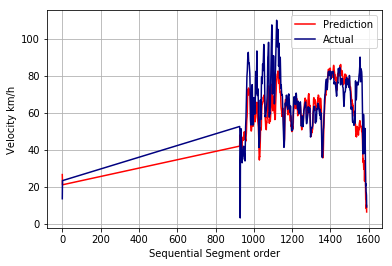

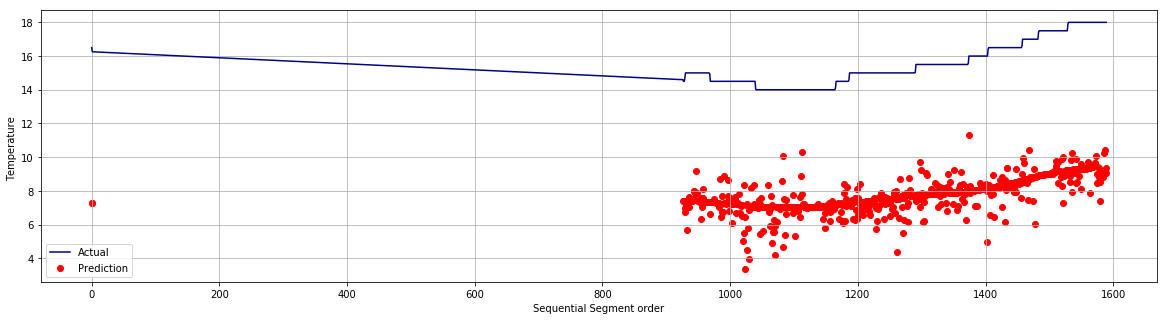

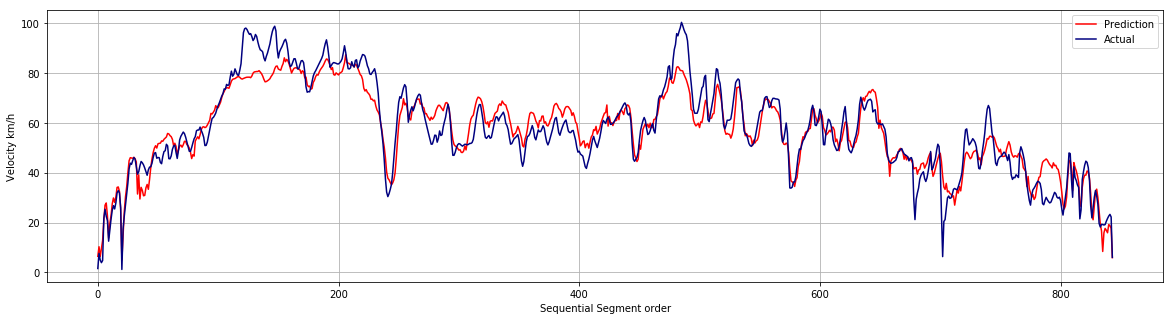

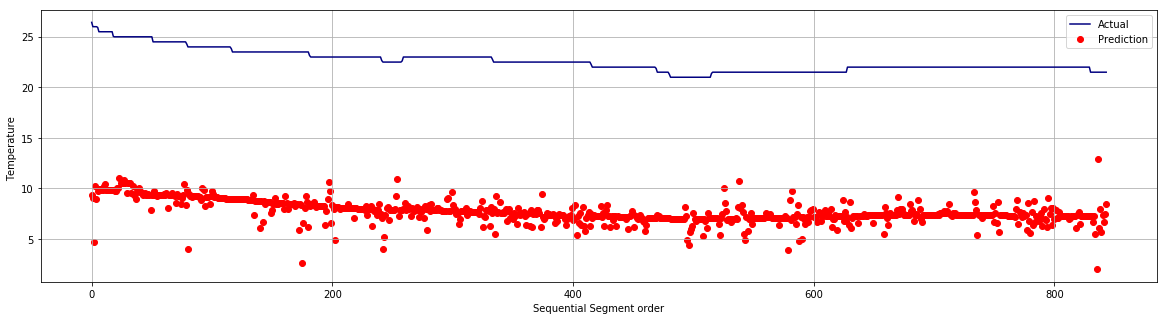

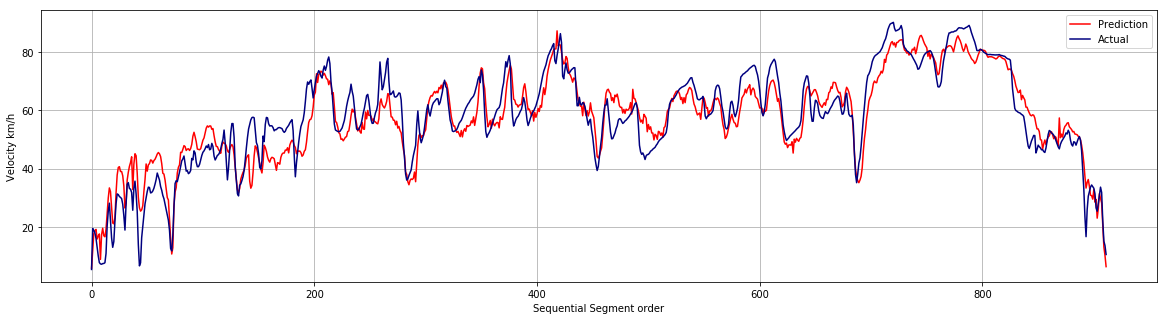

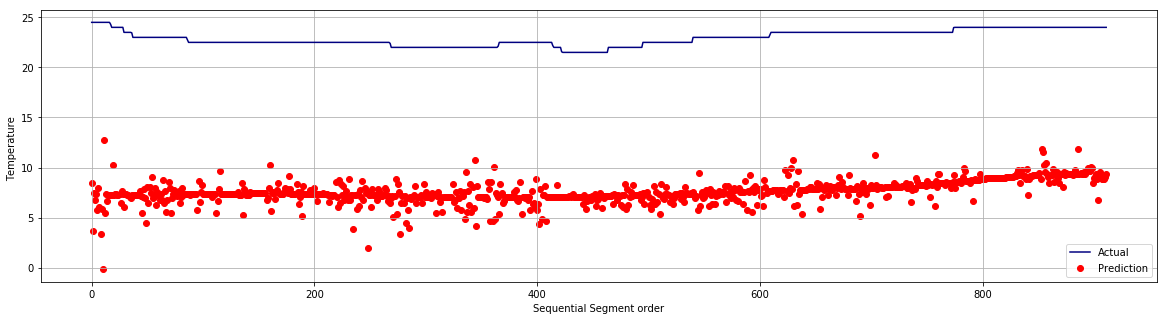

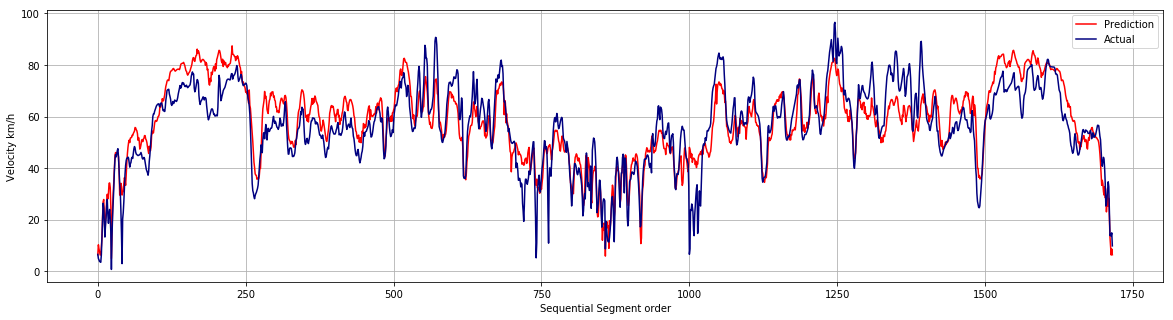

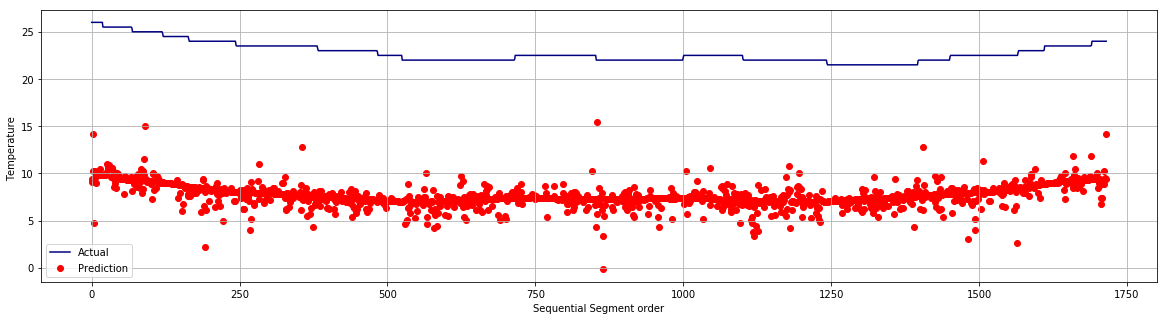

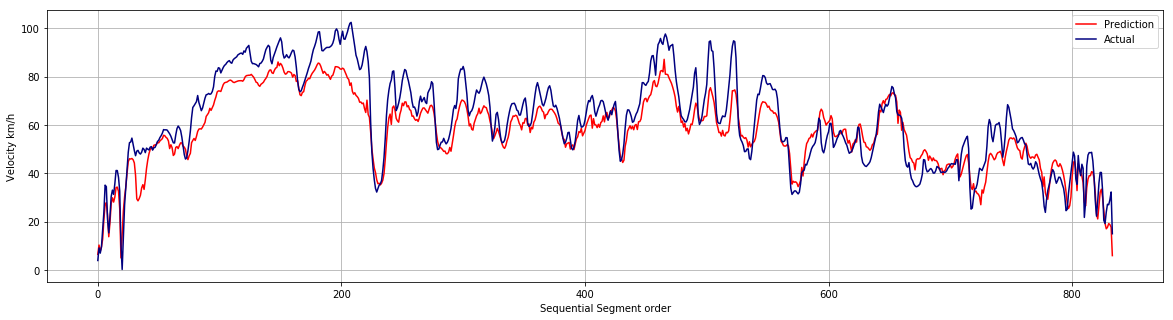

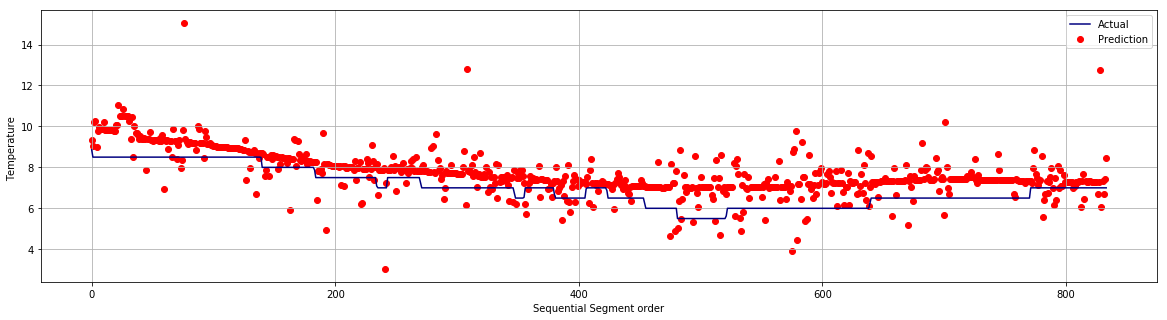

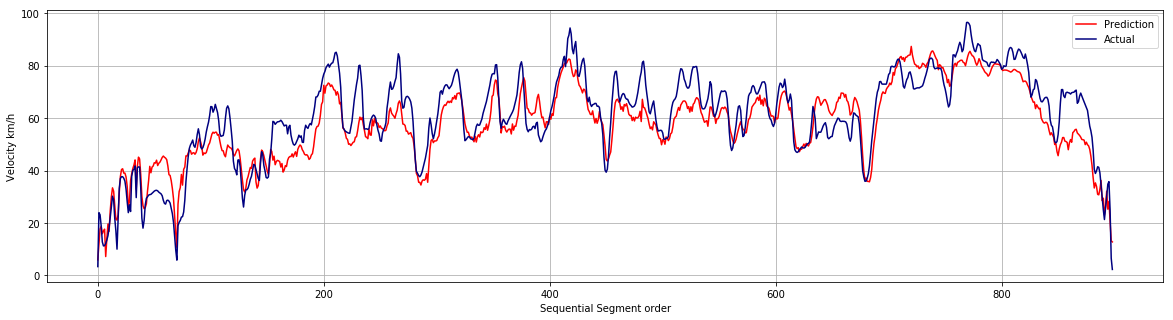

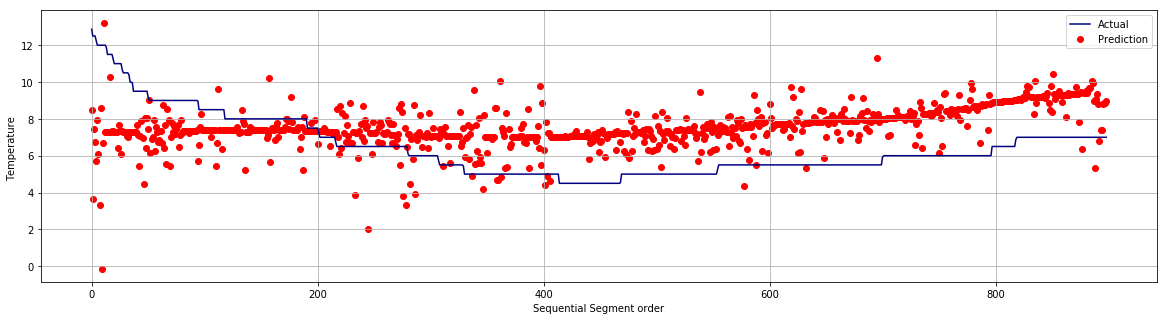

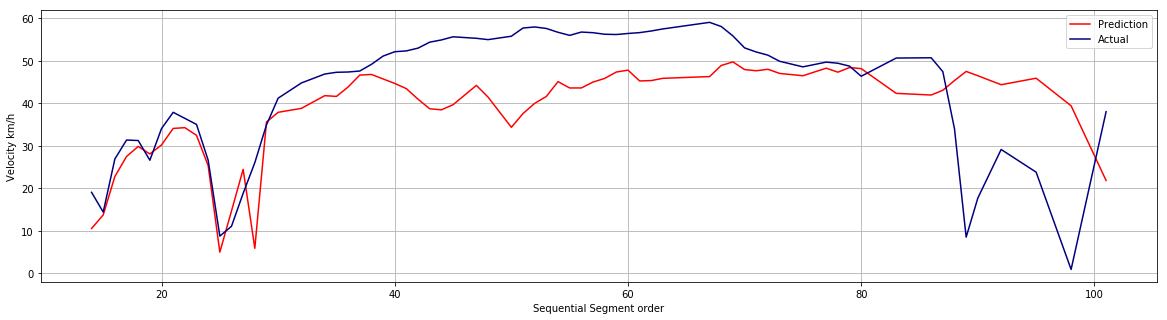

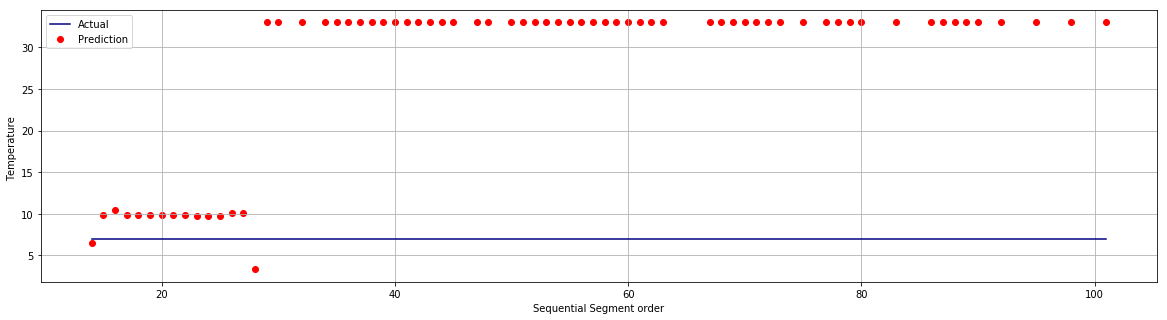

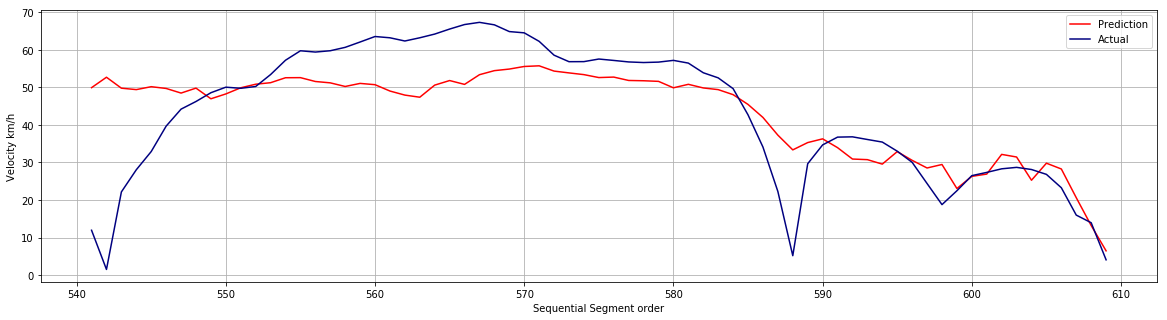

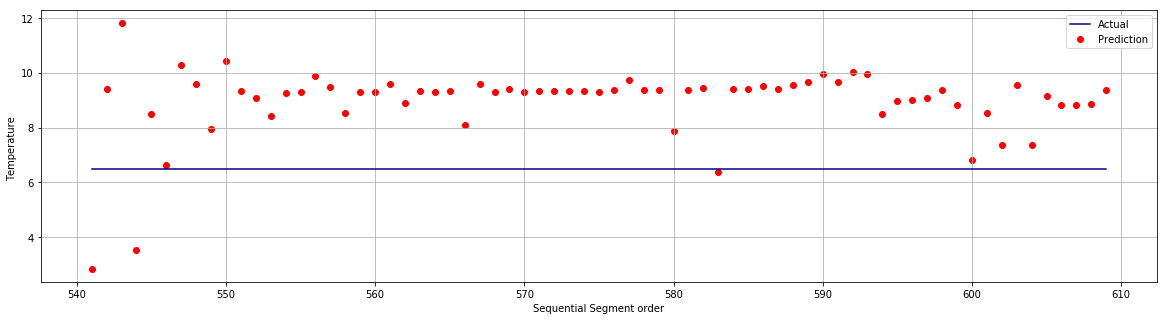

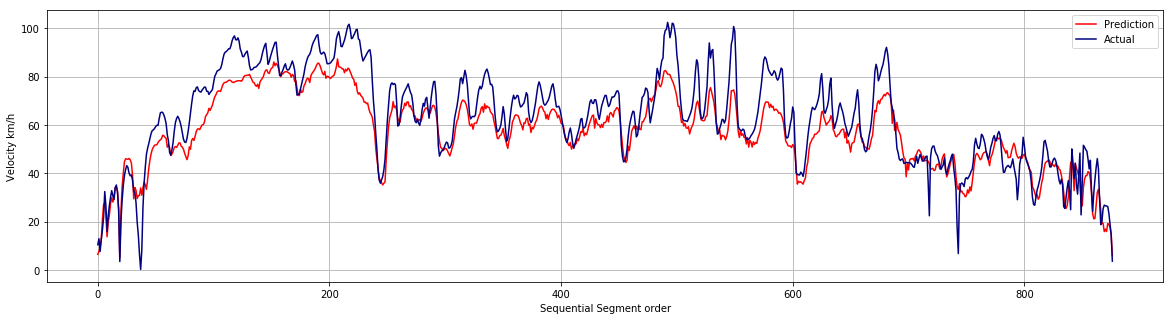

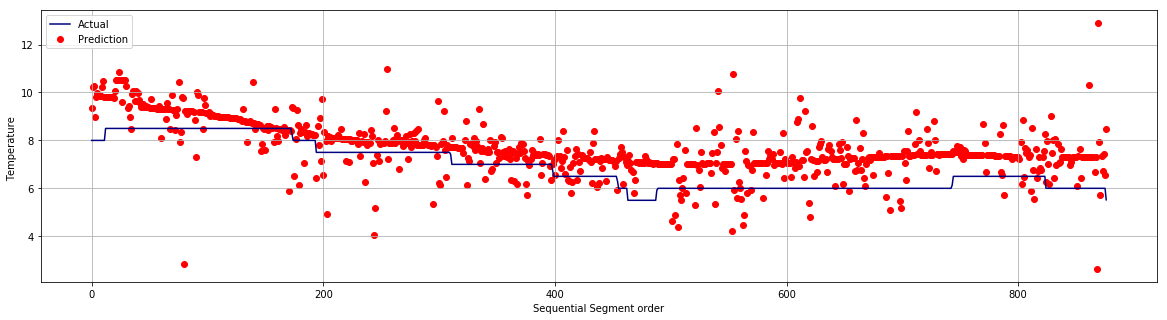

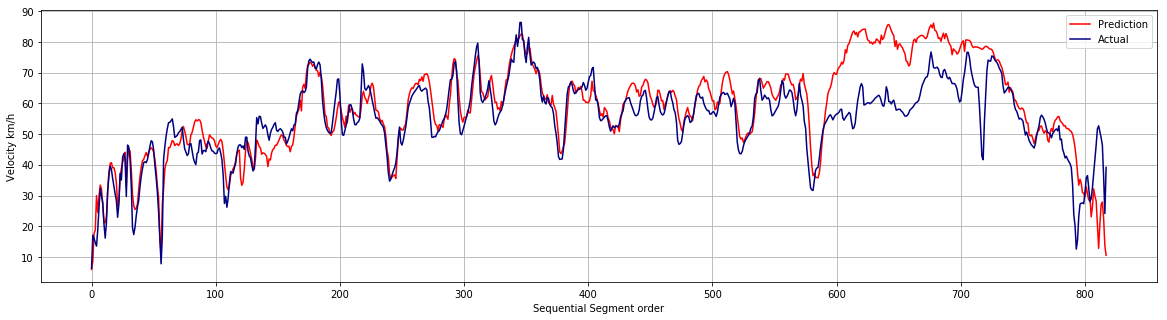

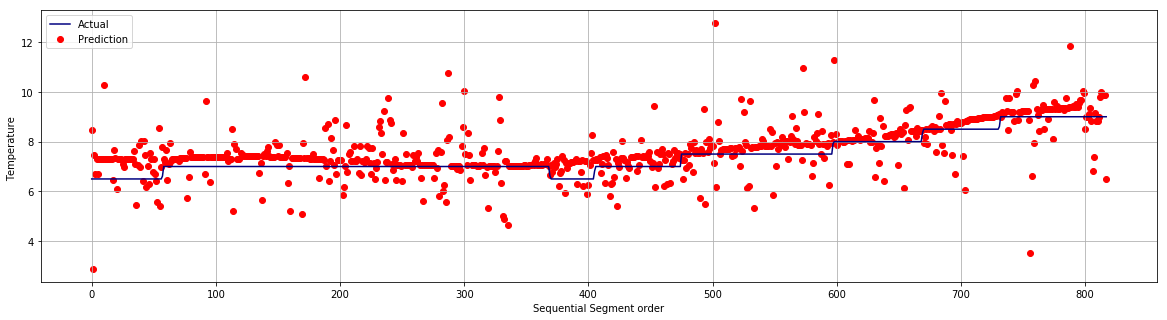

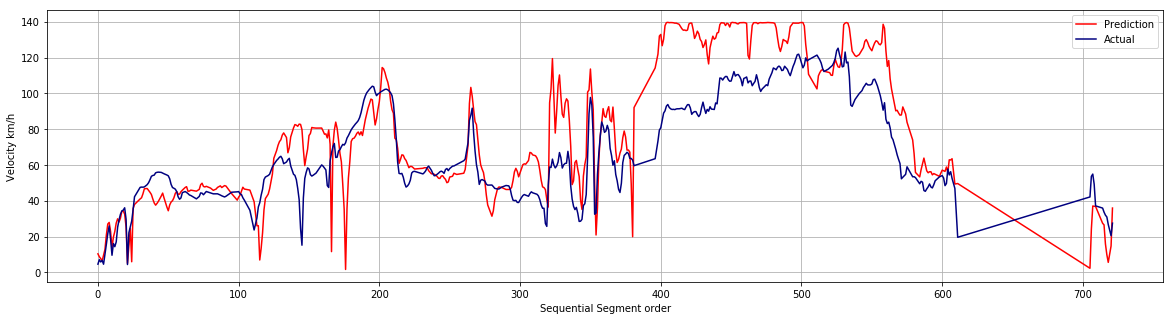

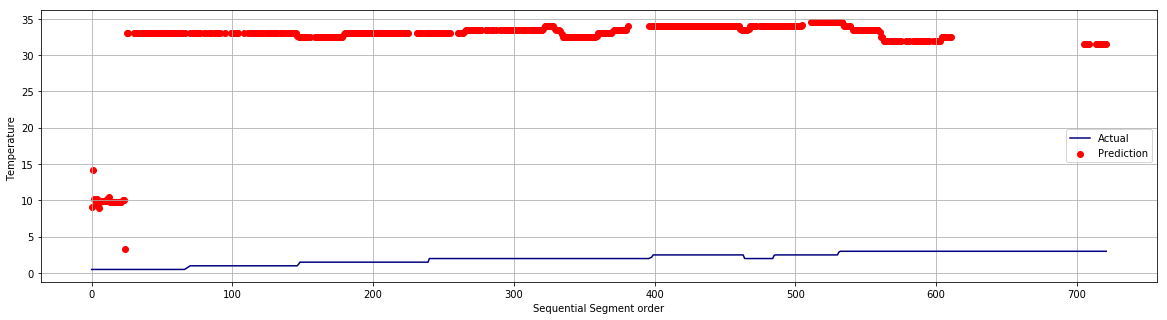

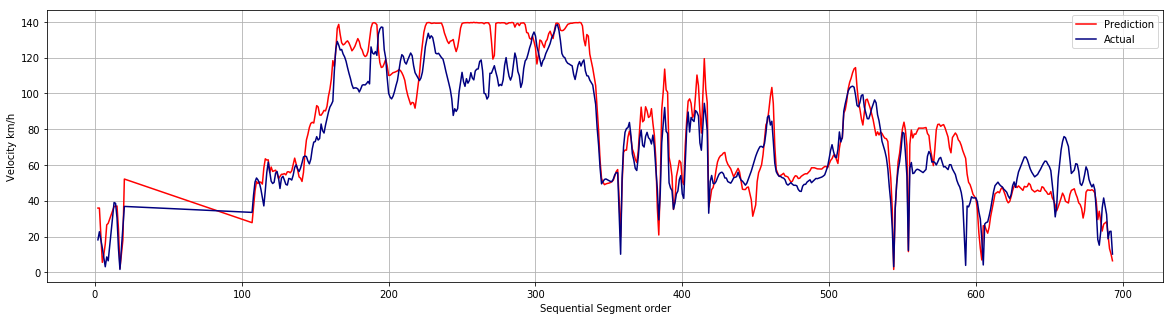

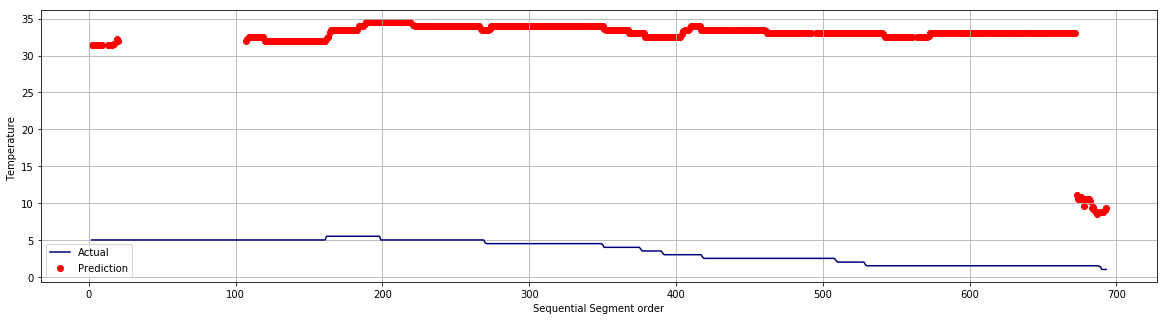

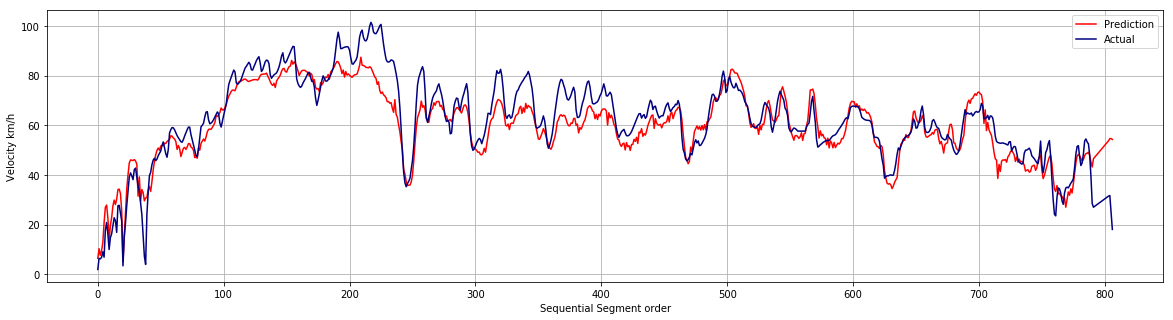

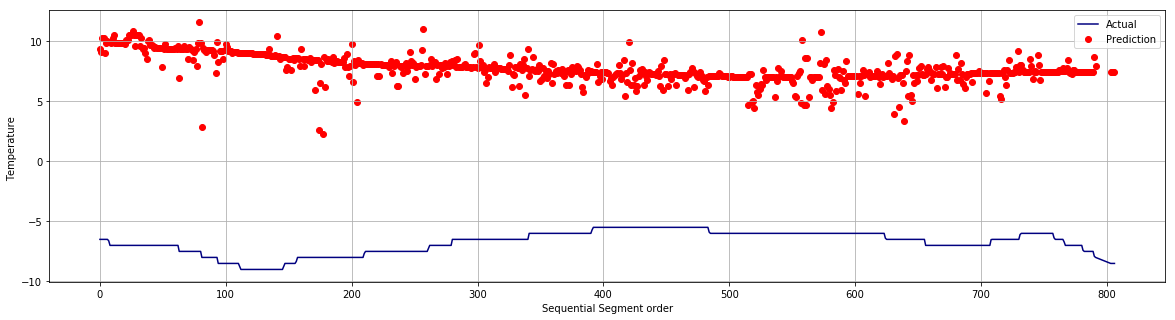

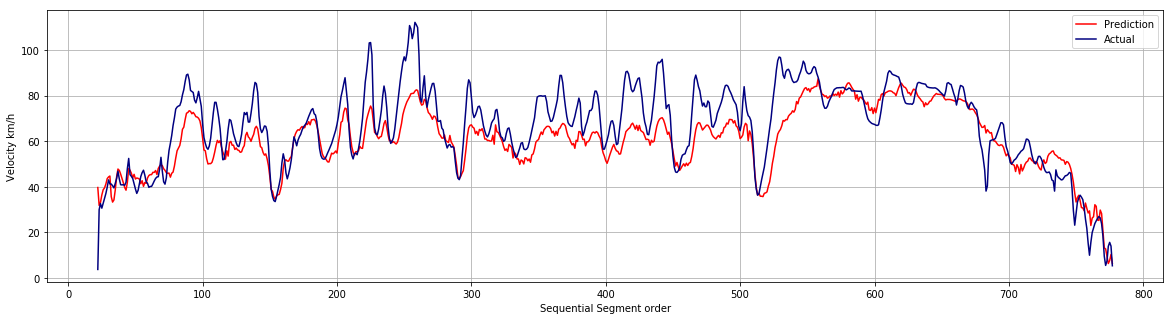

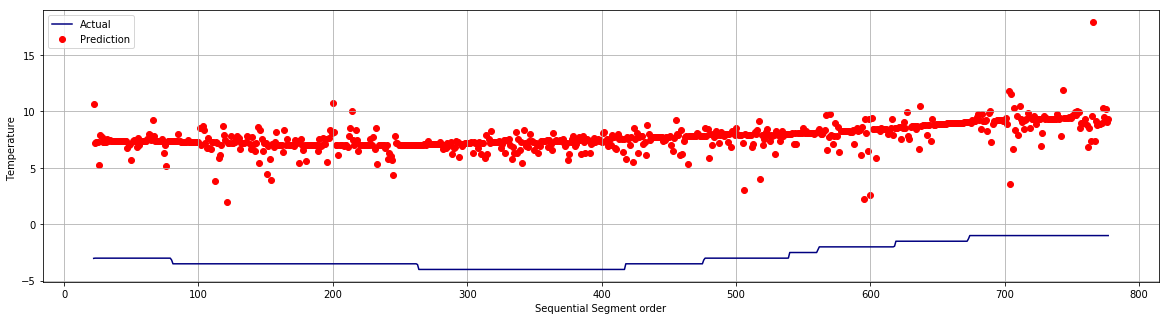

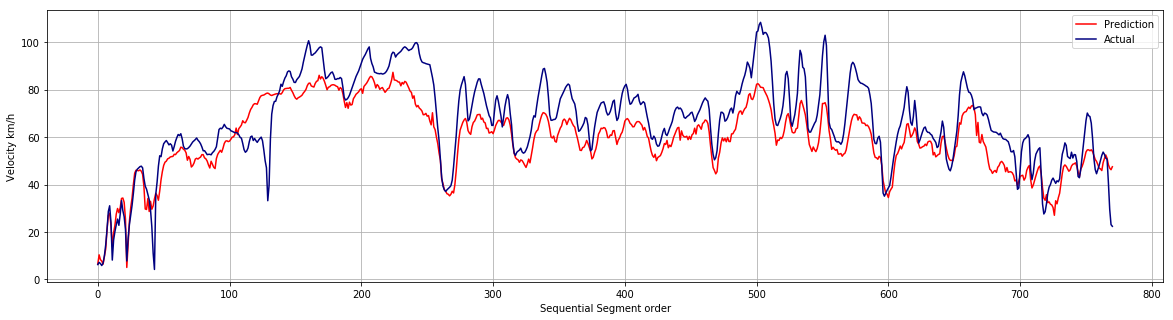

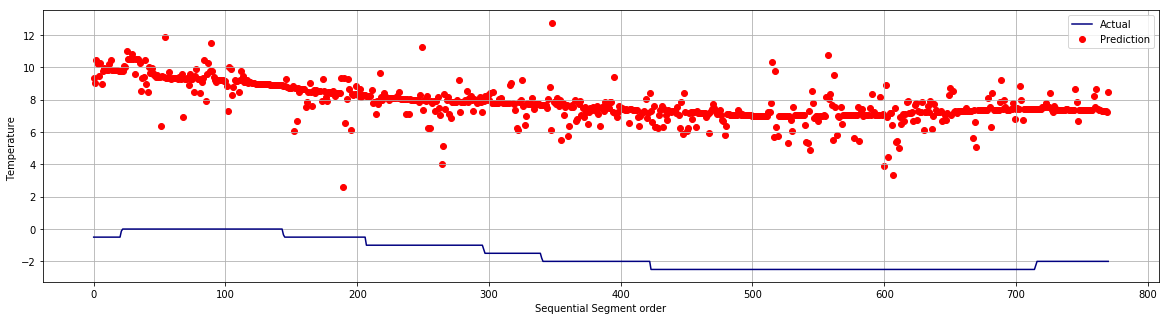

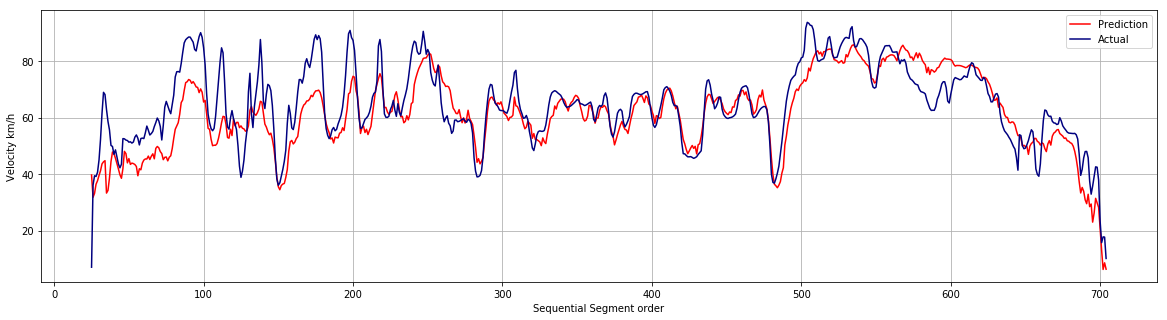

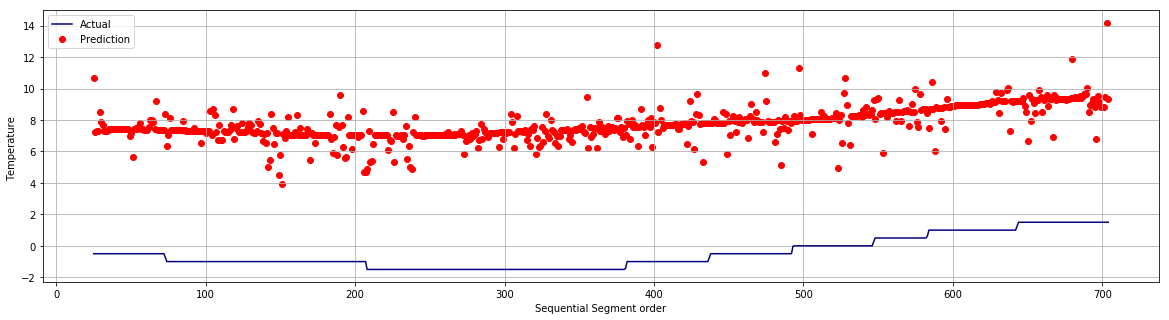

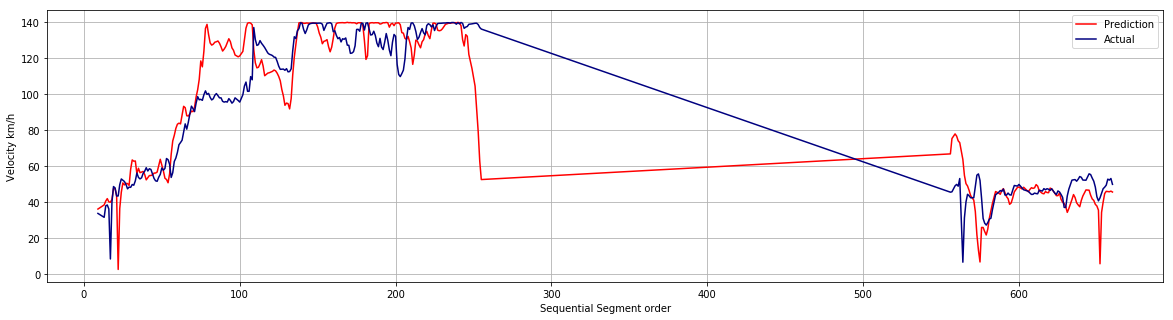

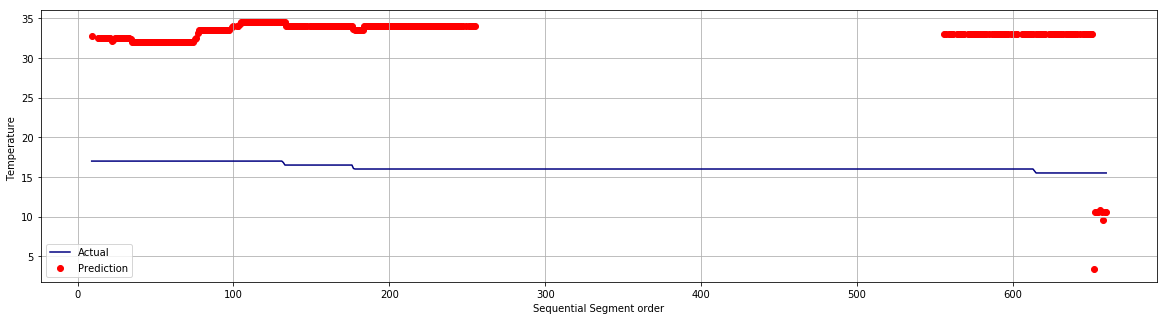

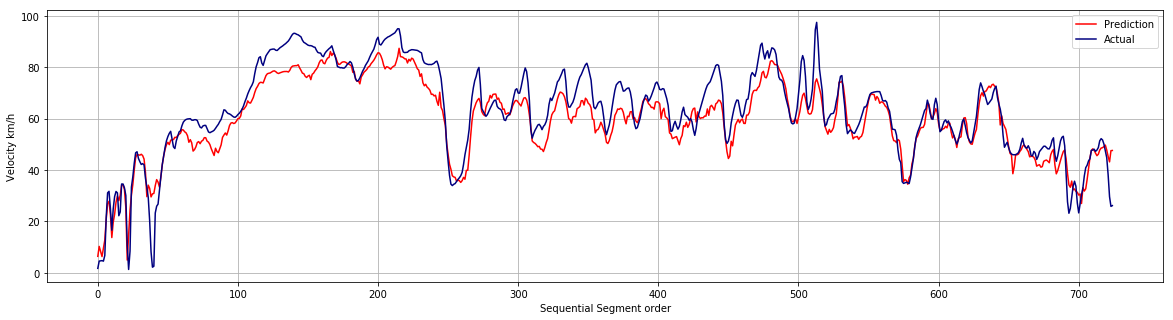

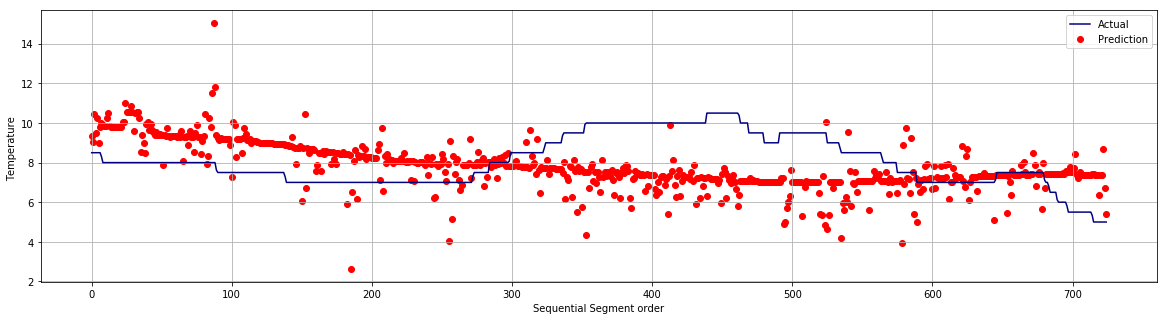

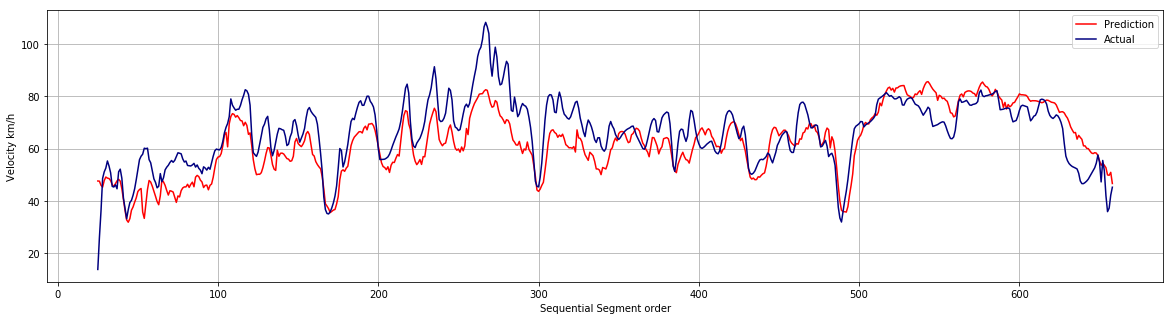

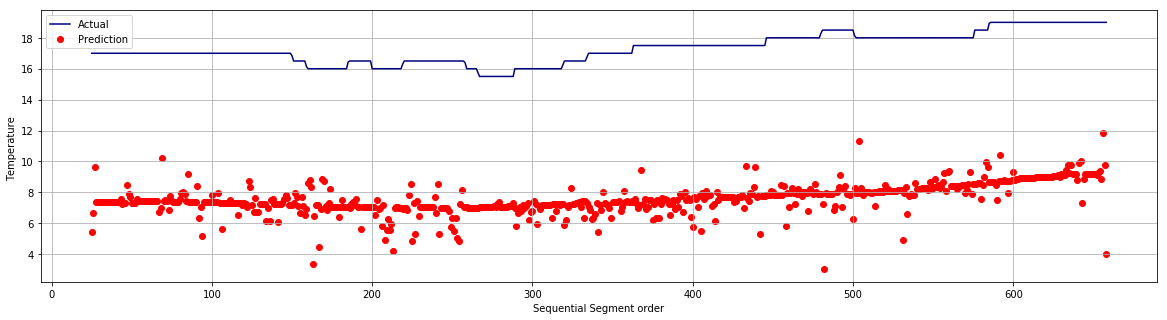

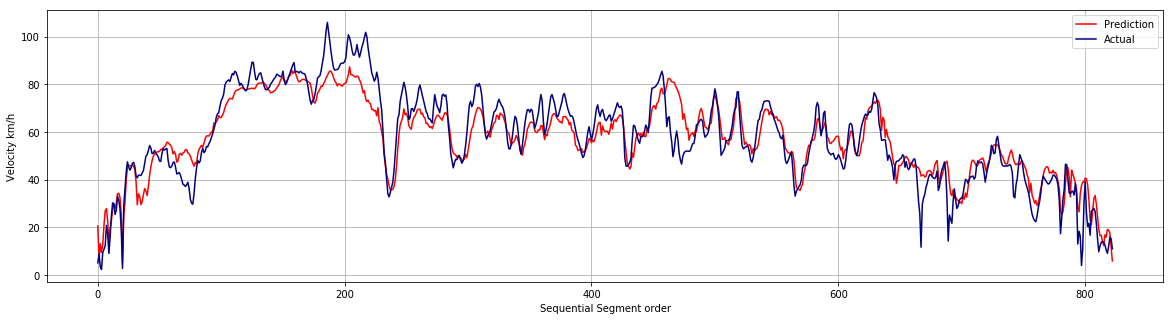

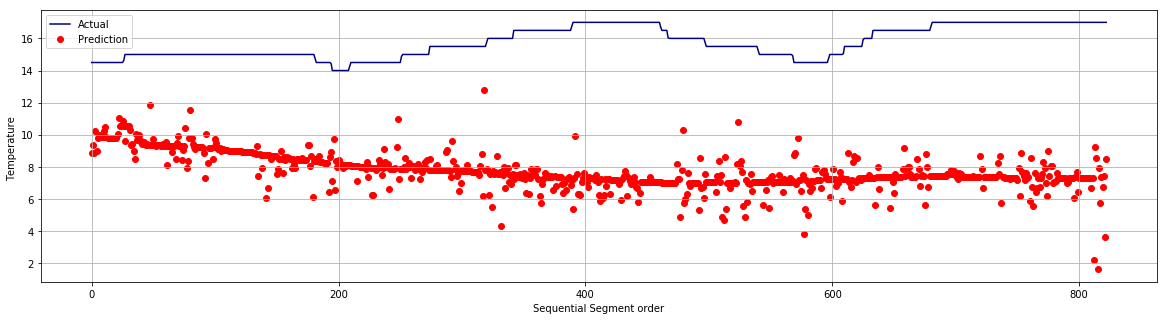

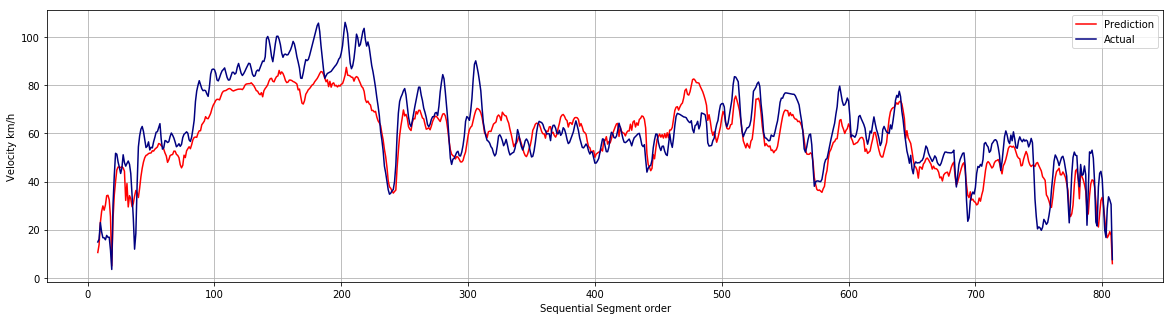

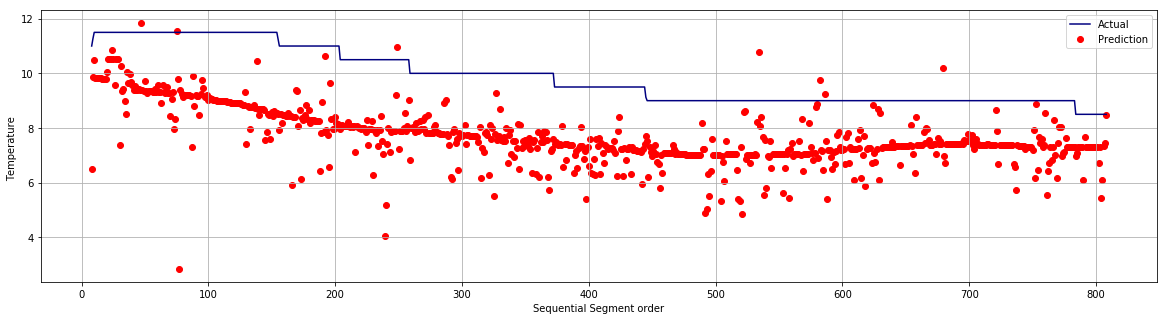

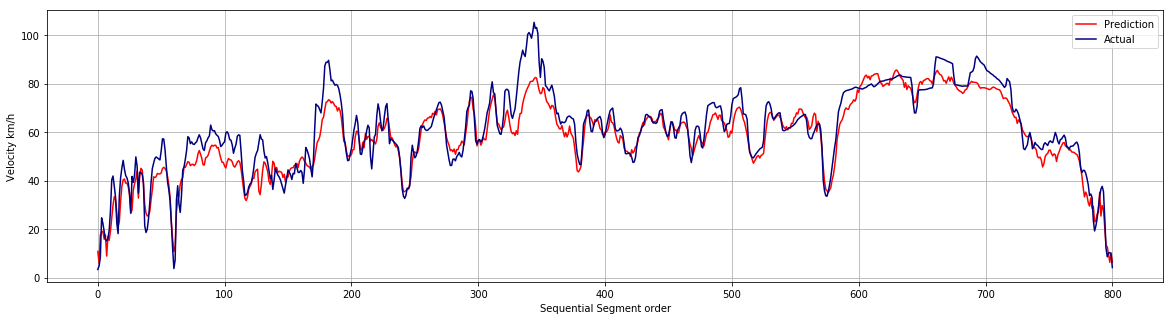

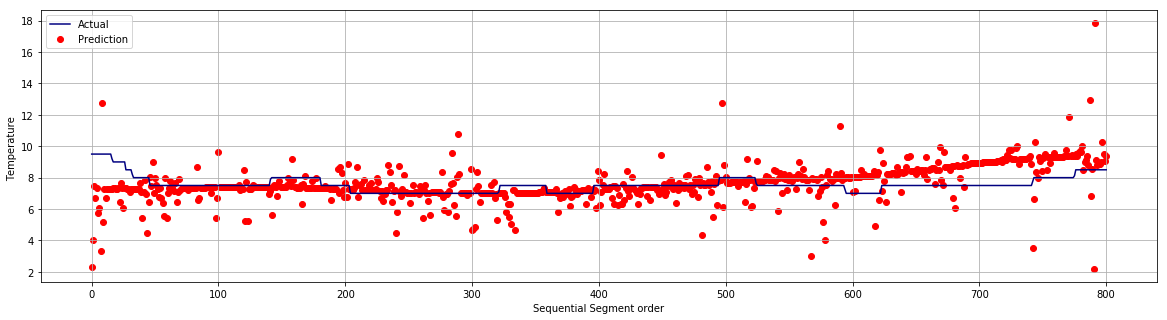

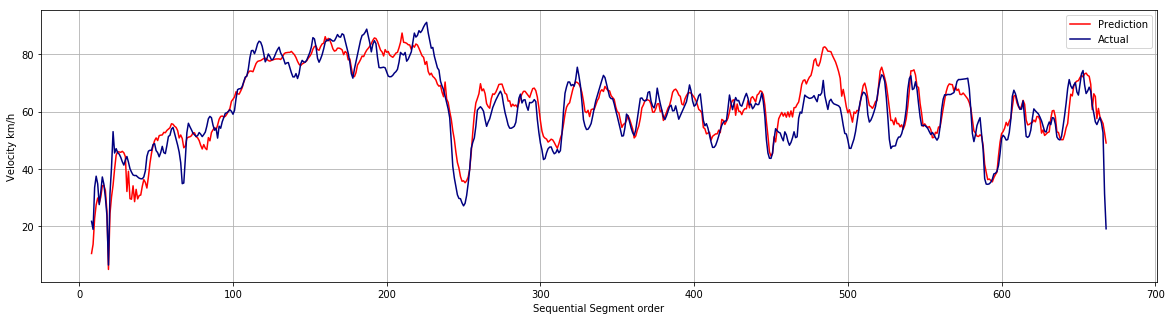

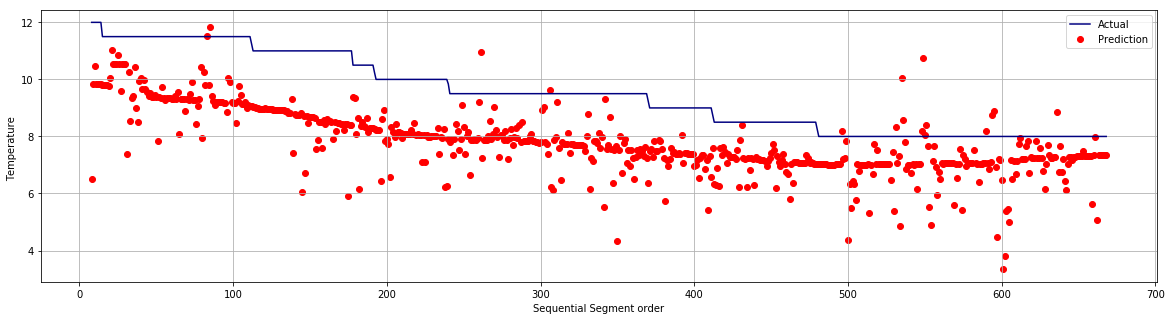

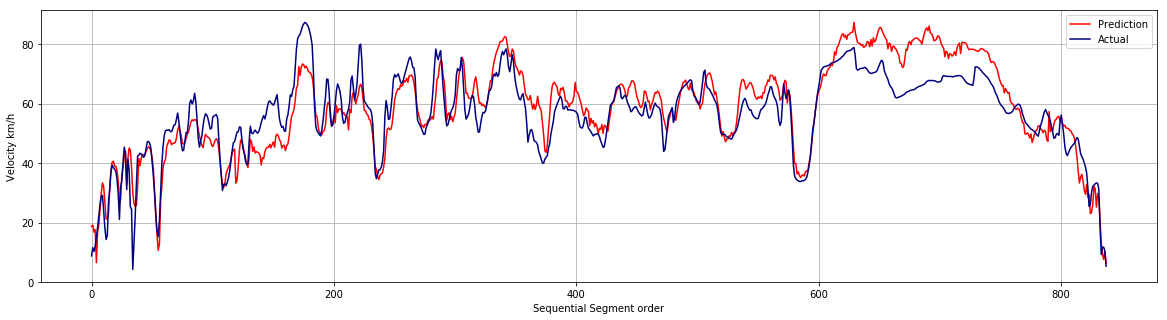

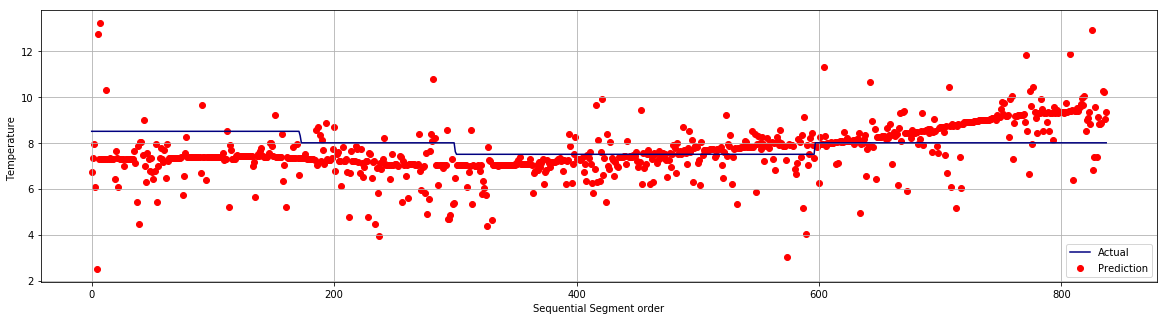

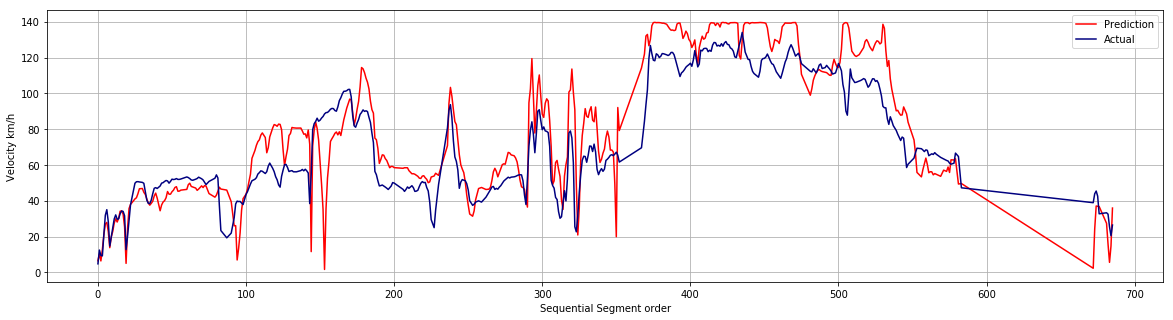

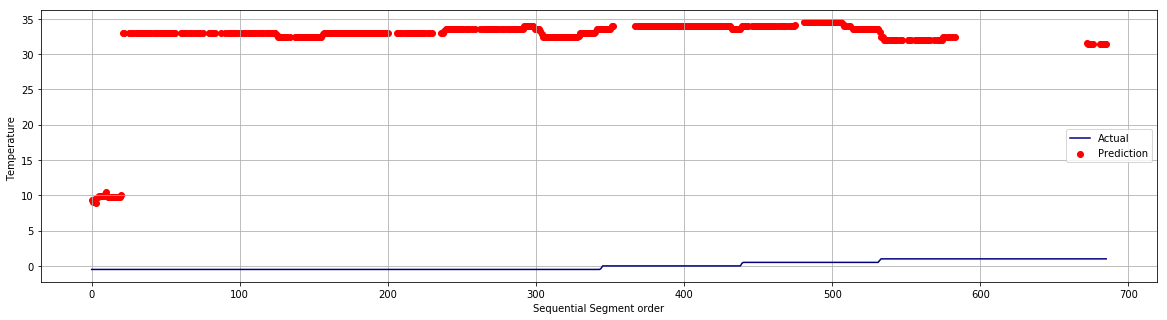

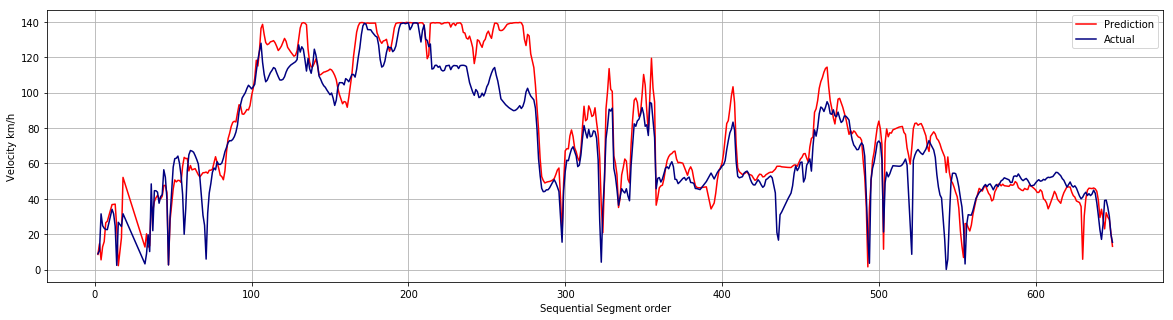

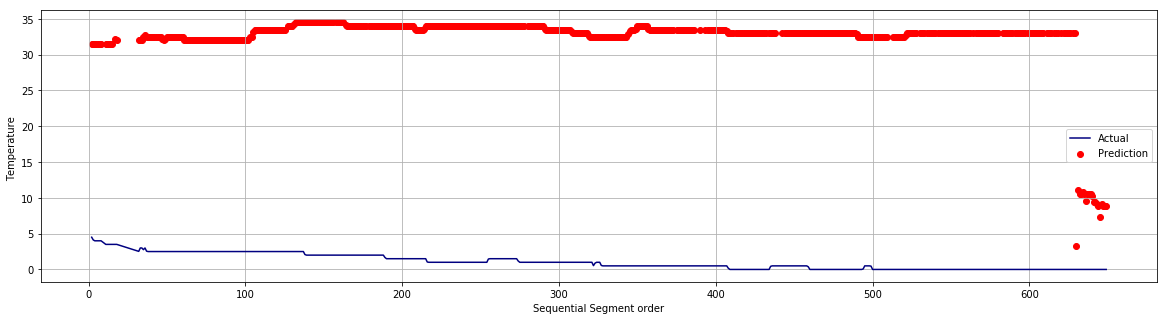

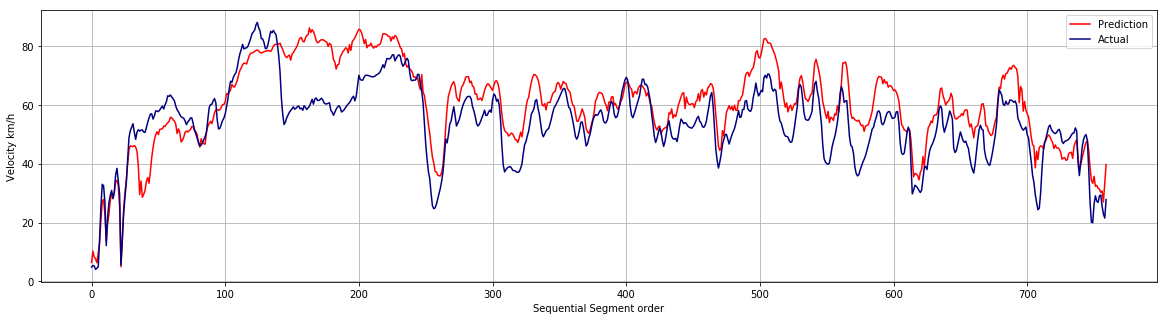

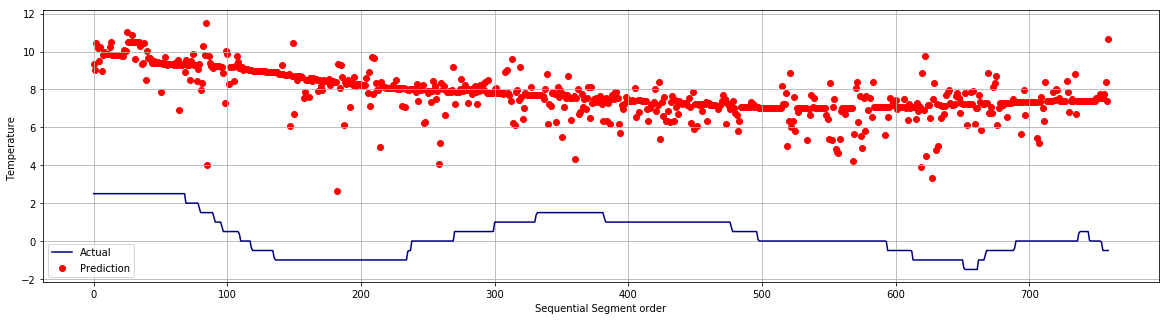

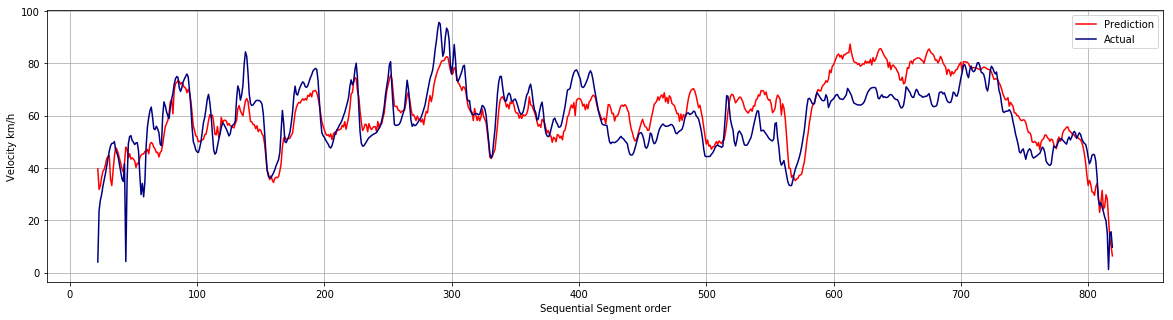

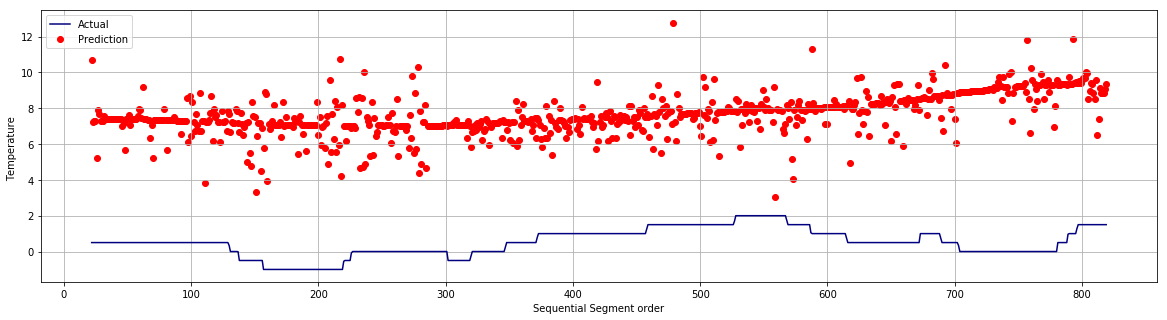

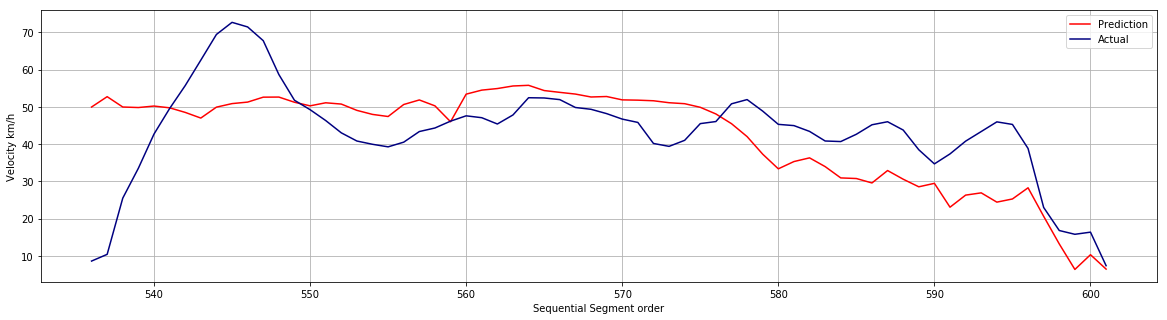

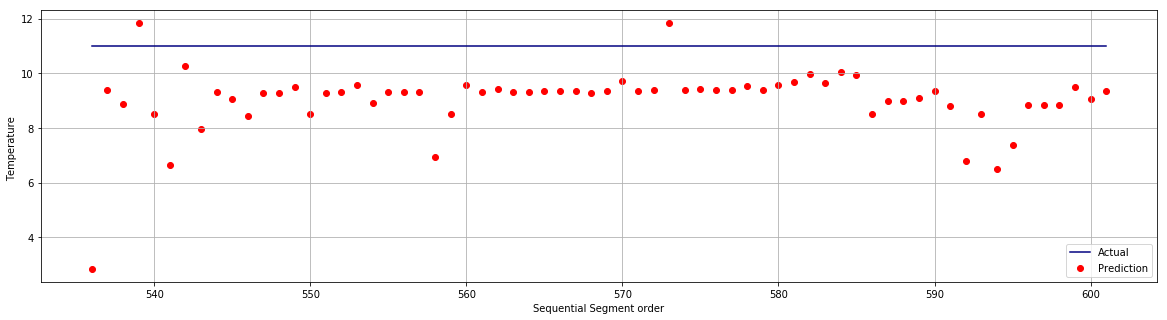

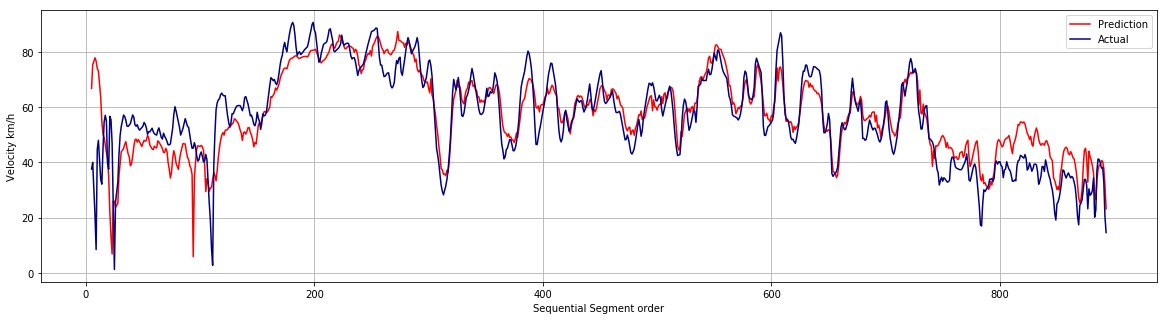

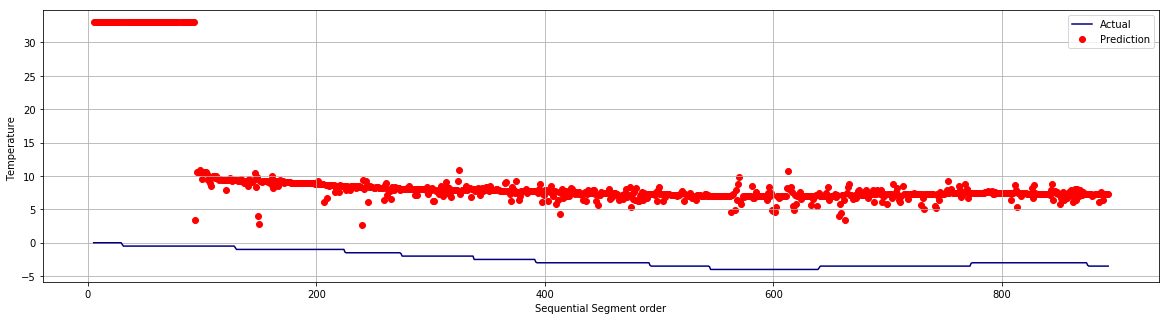

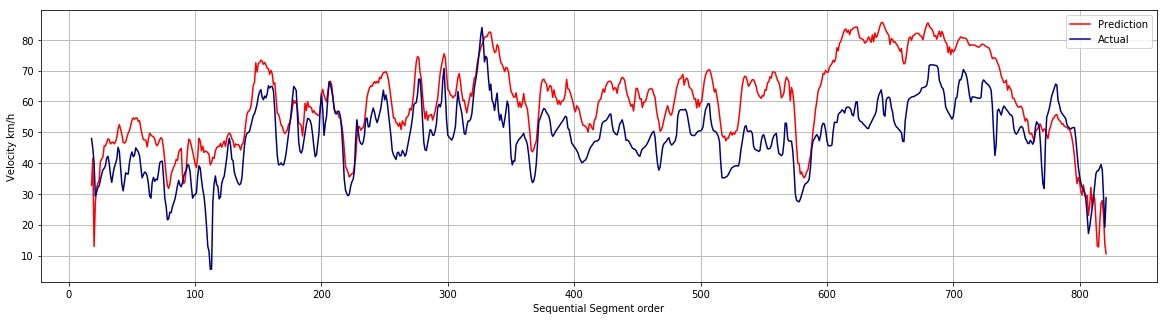

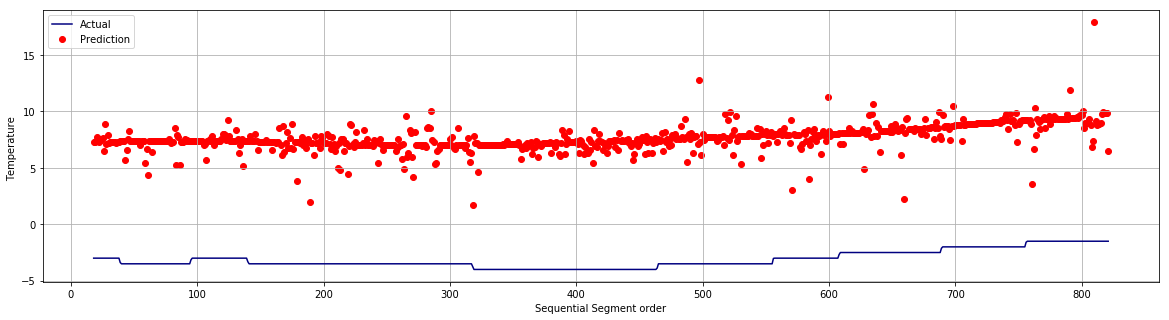

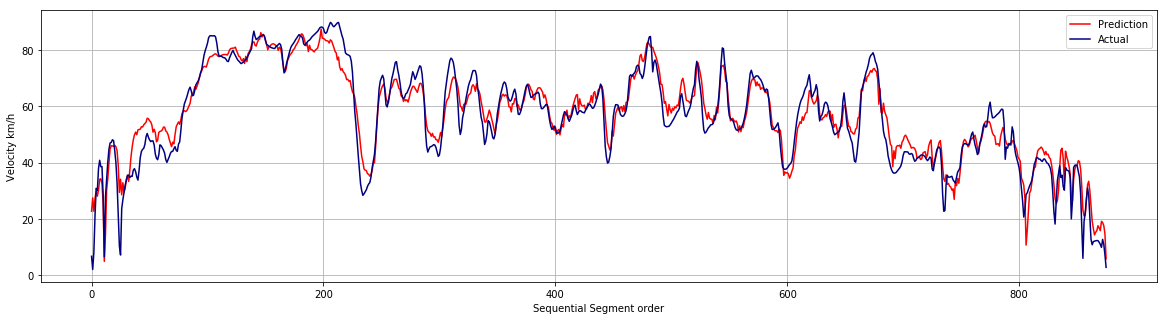

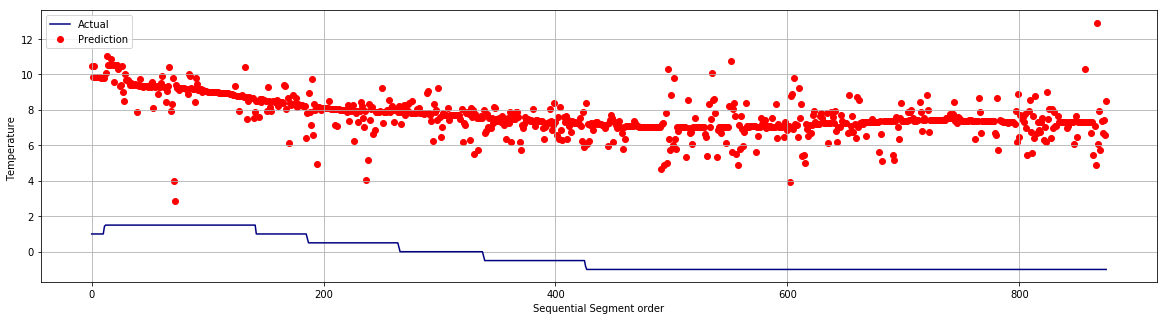

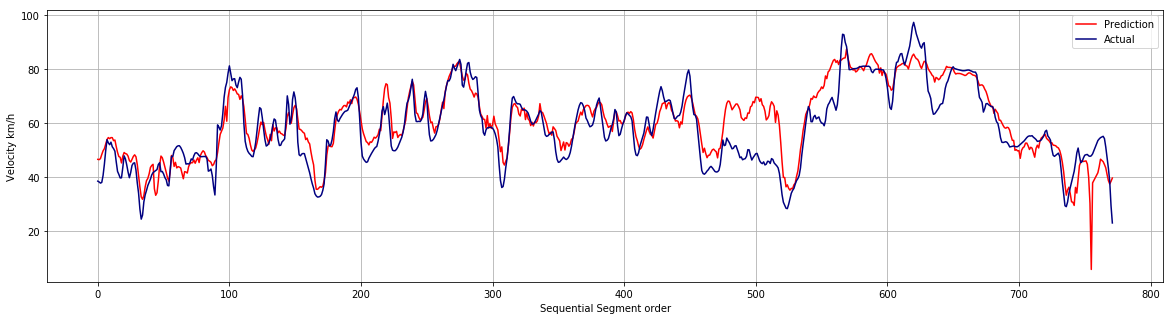

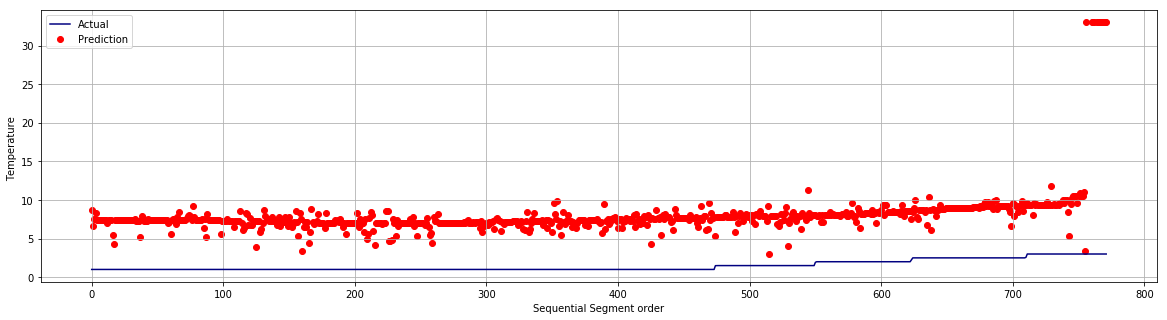

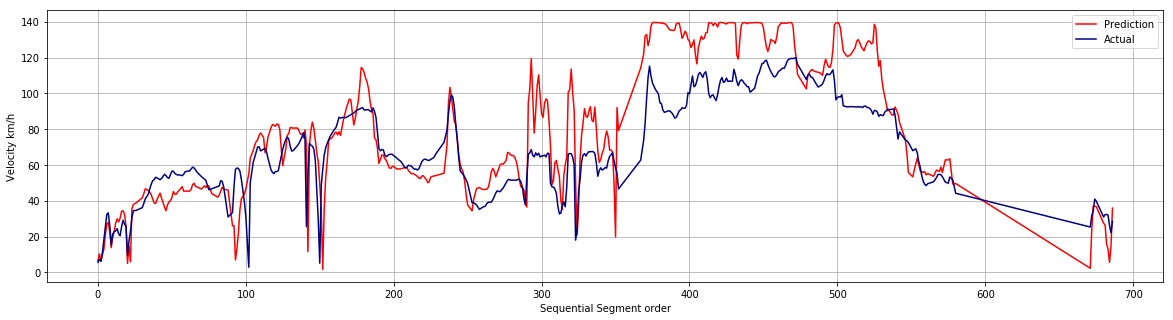

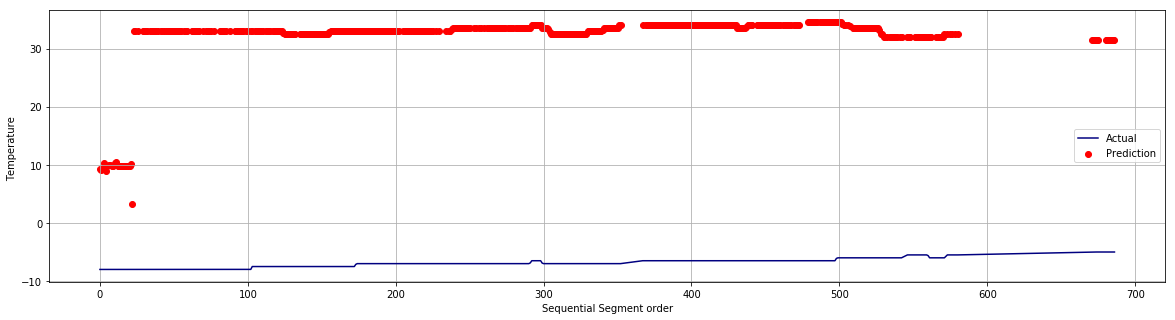

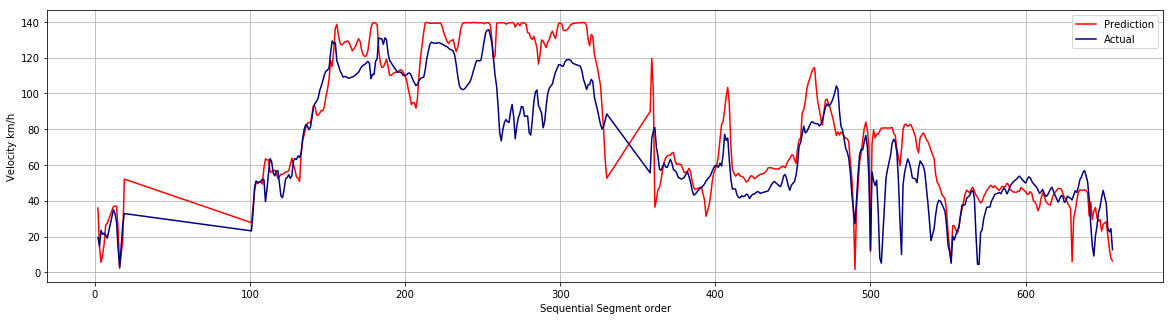

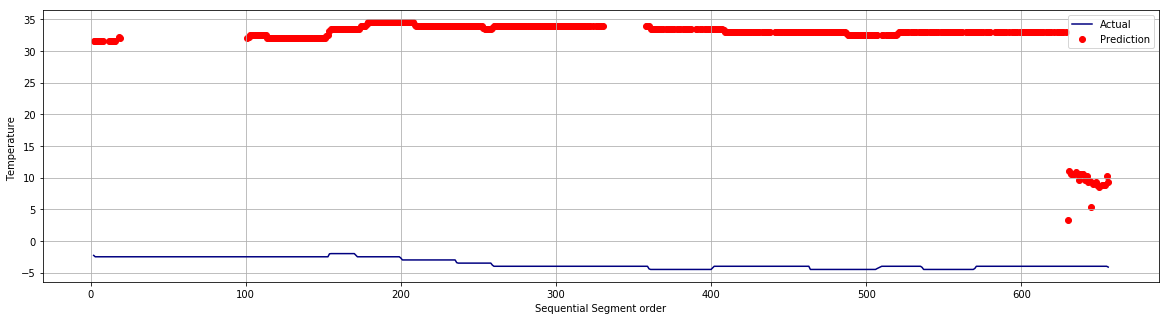

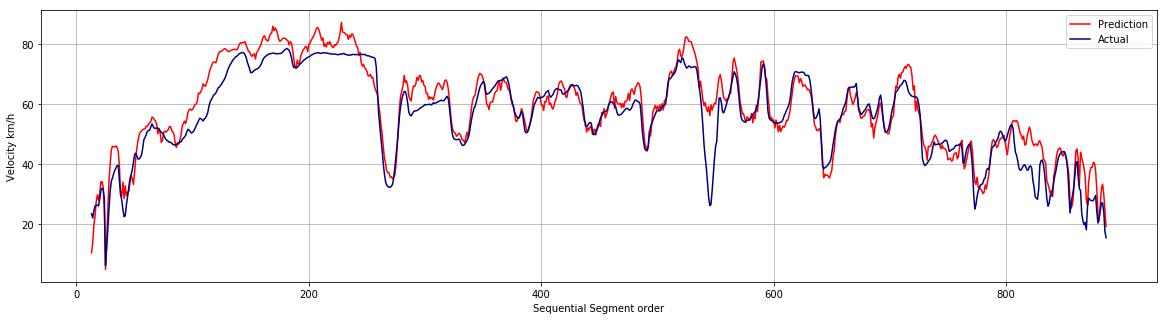

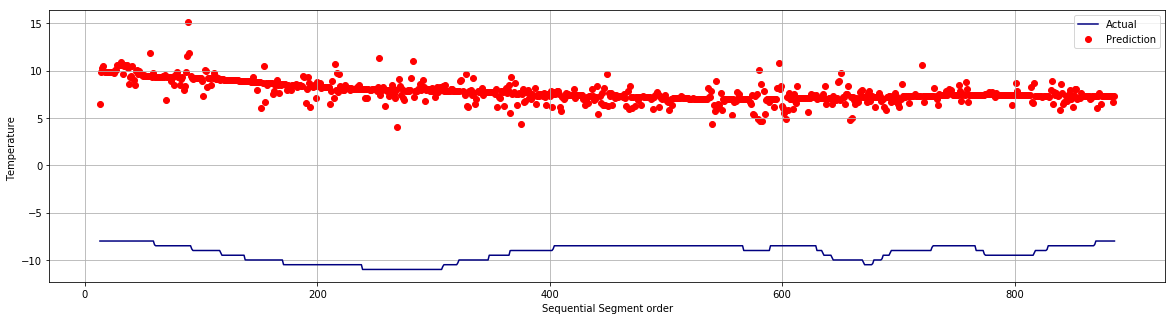

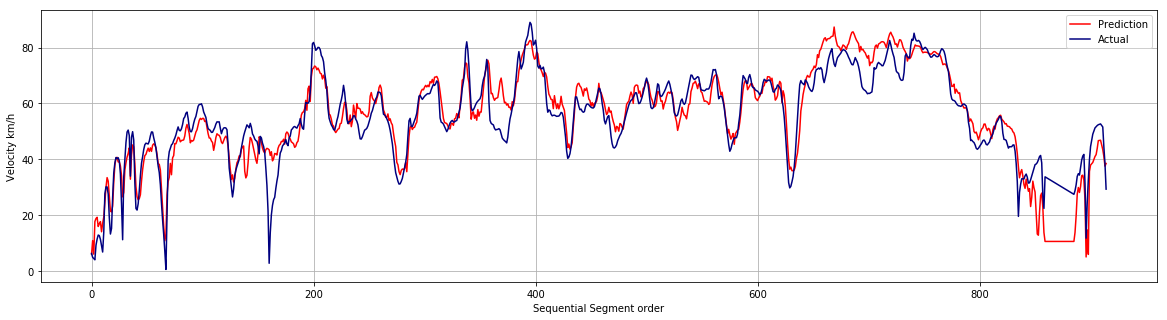

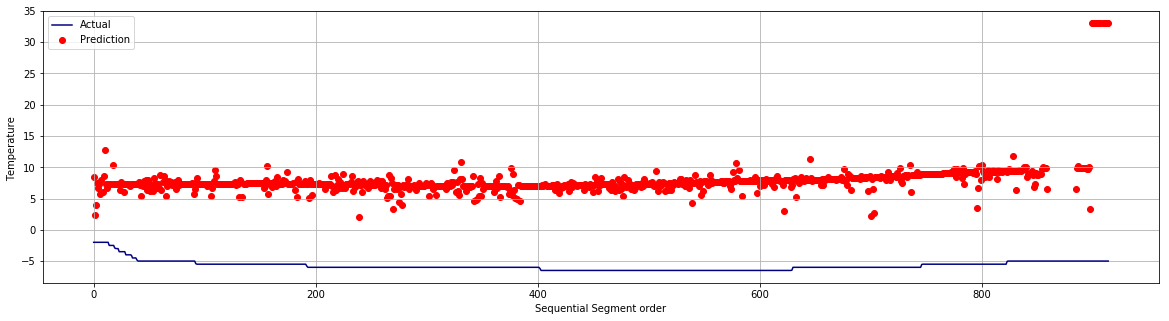

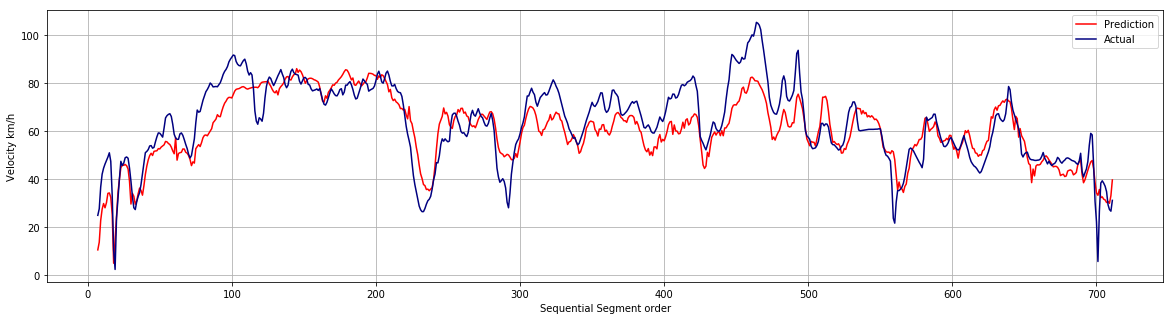

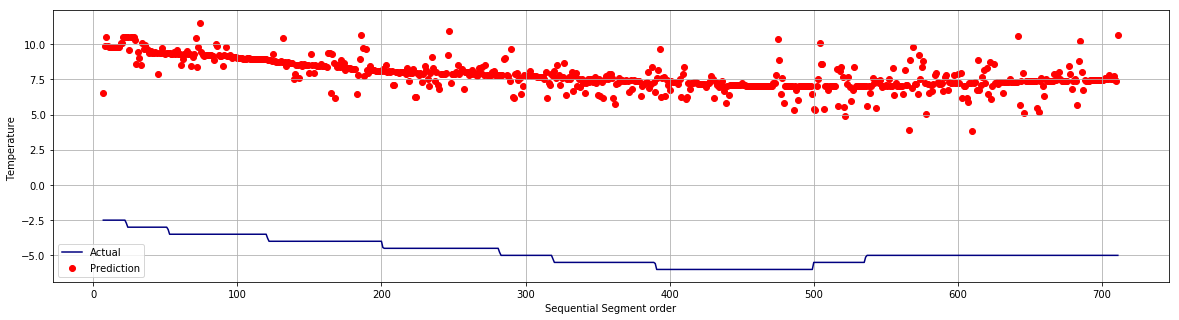

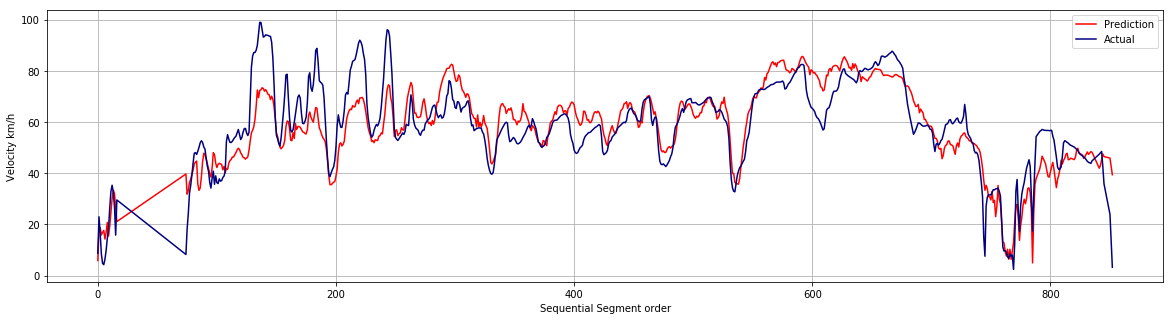

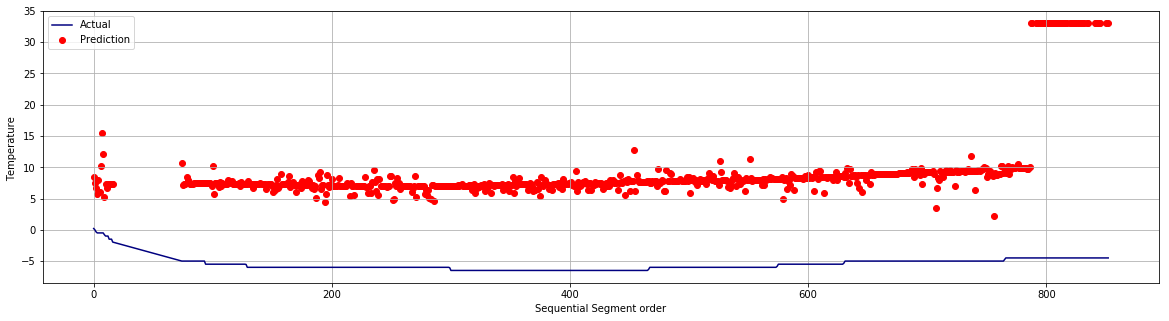

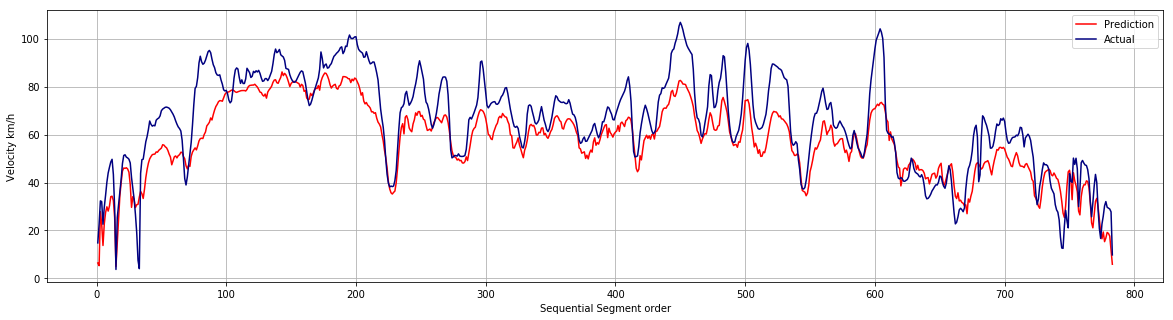

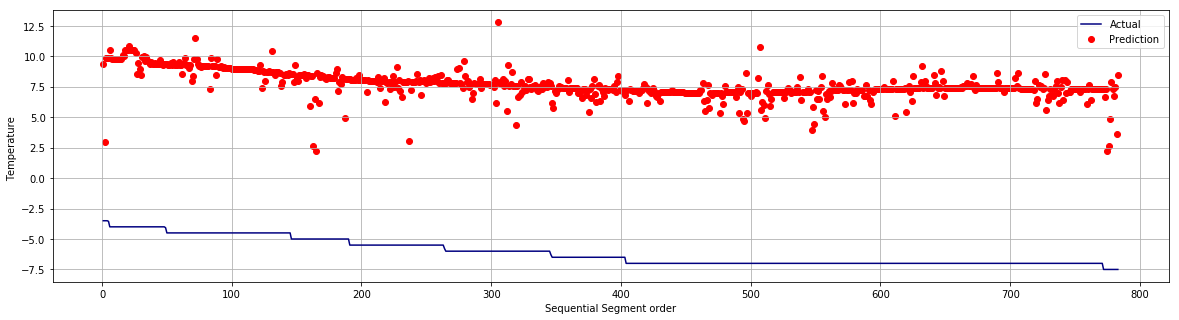

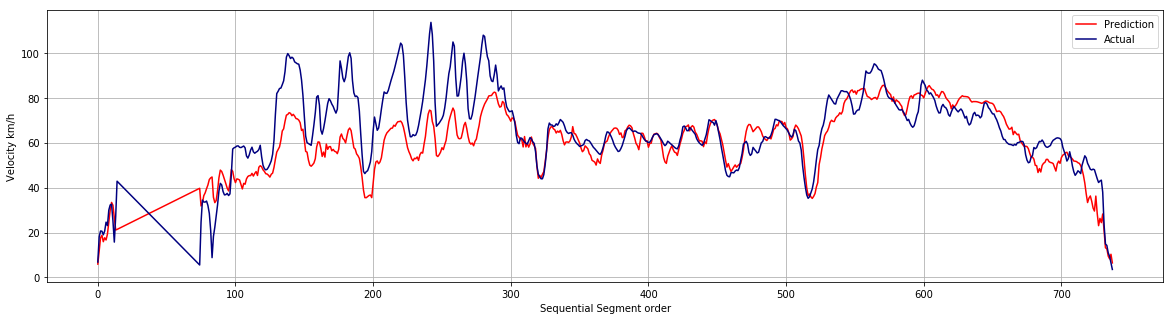

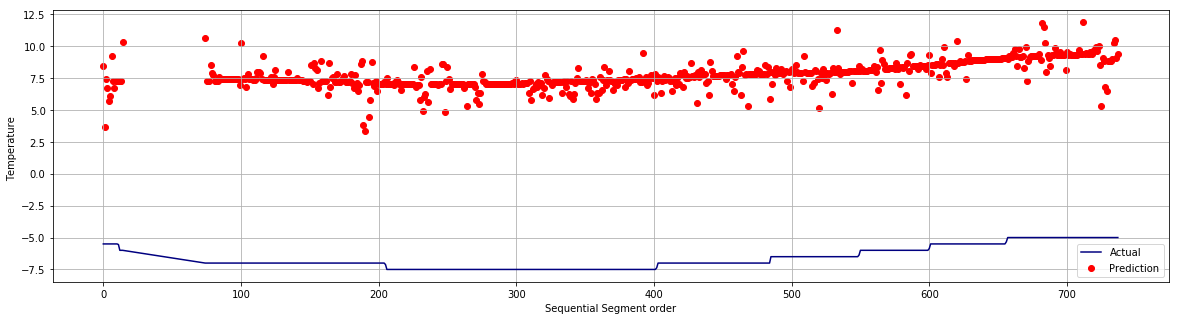

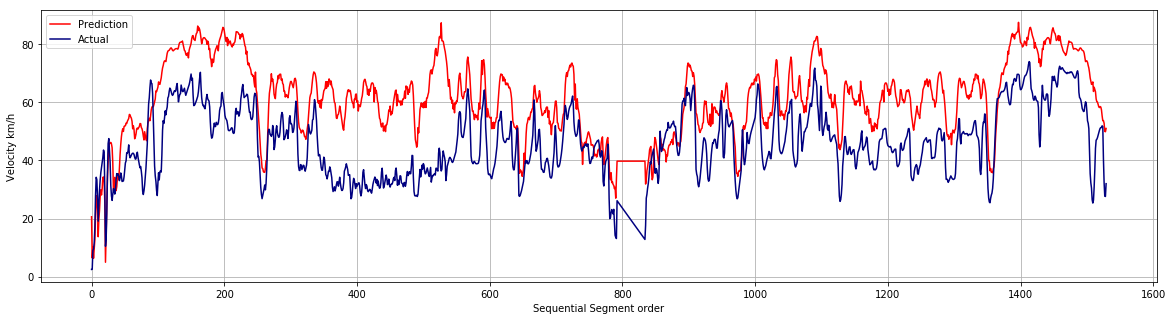

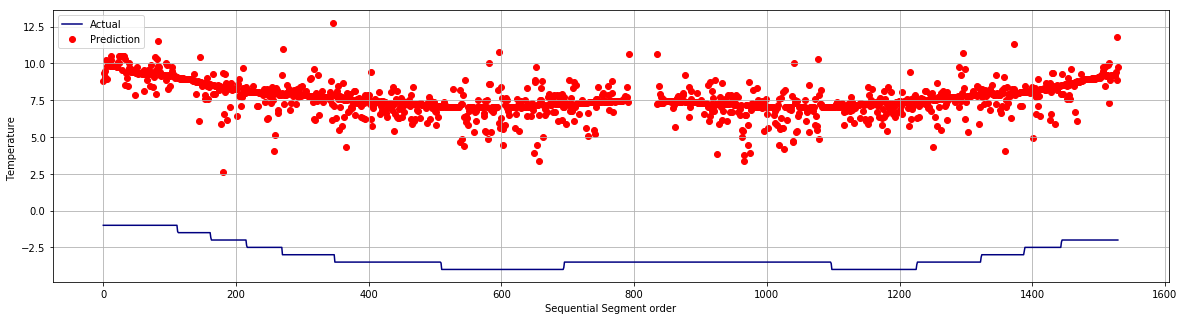

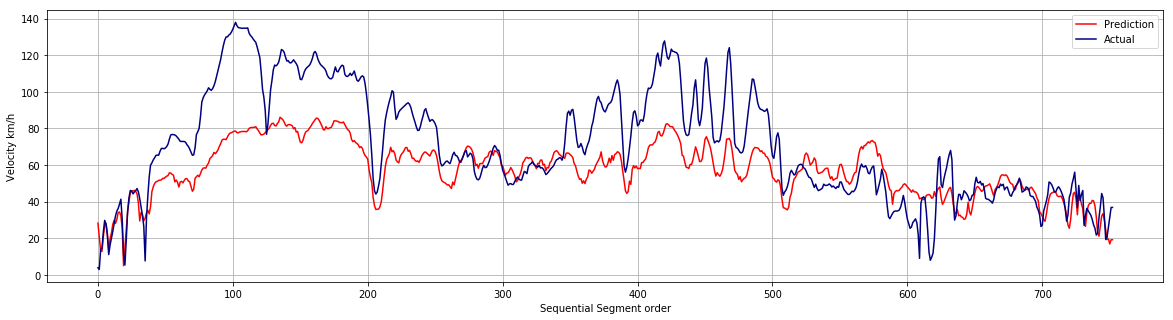

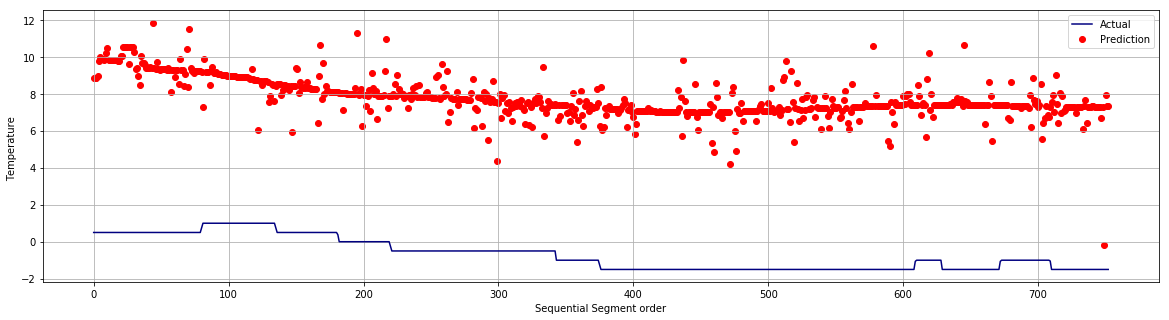

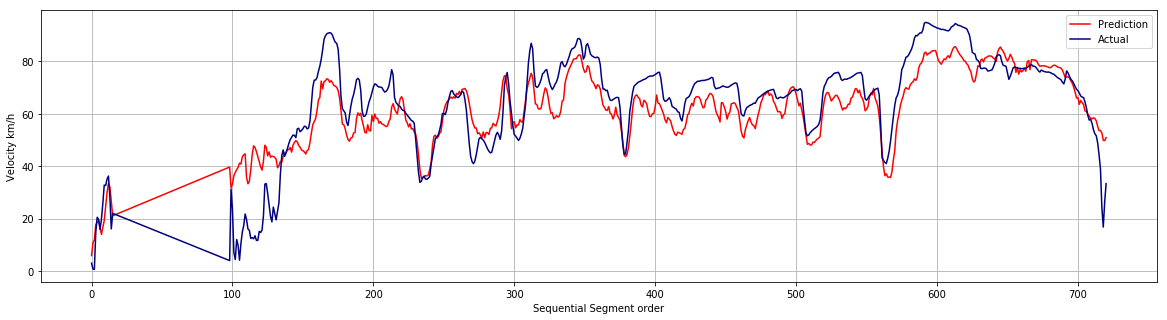

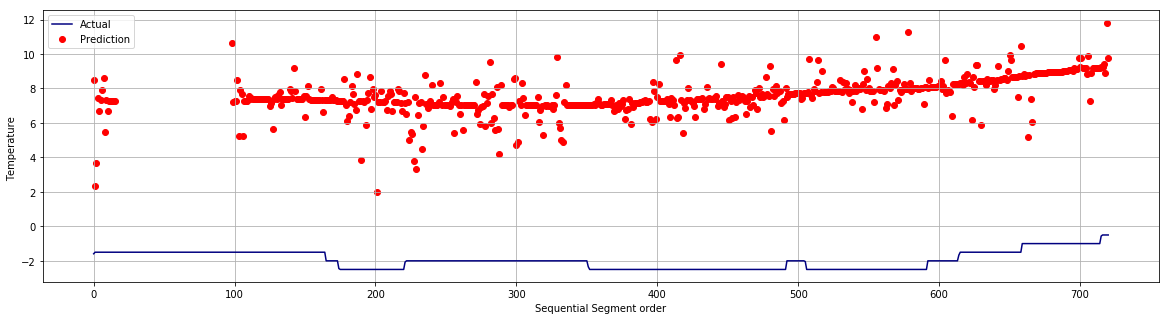

In [30]:


for i in range(35,93):
    print("----------------",i)
    test = [i]
    testDf = df[df['Measurement_file'].isin(test)]
    newTestDf = pd.DataFrame({'Measured_order': [],
               'Measurement_file':[],
               'Actual_Velocity':[],
               'Predicted_Velocity':[],
               'Actual_Temp':[],
               'Predicted_Temp':[],
               'Predicted_Seg':[]})
    
    trainingDf = avgsPredicted_df
    x = reduce(np.intersect1d, (testDf.Predicted_Seg, trainingDf.Predicted_Seg))
    
    trainingDf = trainingDf[trainingDf['Predicted_Seg'].isin(x)]
    testDf = testDf[testDf['Predicted_Seg'].isin(x)]
    trainingDf.set_index('Predicted_Seg', inplace=True)
    for indexMess, rowMess in testDf.iterrows():
        newTestDf = newTestDf.append({'Measured_order': rowMess['Measured_order'],
                                  'Measurement_file':rowMess['Measurement_file'],
                                   'Actual_Velocity':rowMess['Agg_Velocity'],
                                   'Predicted_Velocity':trainingDf.loc[rowMess['Predicted_Seg']]['Predicted_Velocity'],
                                   'Actual_Temp':rowMess['Agg_Temp'],
                                   'Predicted_Temp':trainingDf.loc[rowMess['Predicted_Seg']]['Predicted_Temp'],
                                   'Predicted_Seg':rowMess['Predicted_Seg']}, ignore_index=True)
    
    
    error = sqrt(mean_squared_error(newTestDf['Actual_Velocity'],newTestDf['Predicted_Velocity'])) #calculate rmse
    fig = plt.figure()
    ax = fig.subplots()
    ax.grid(which='both')
    ax.set_xlabel("Sequential Segment order")
    ax.set_ylabel("Velocity km/h")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Predicted_Velocity'],c='red', label='Prediction')
    plt.legend(loc='best')

    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Actual_Velocity'],color='navy', label='Actual')
    plt.legend(loc='best')
    path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/images1/stat/Velocity/'
    fig.savefig(path+str(i)+"-"+ str(error)+'.png',bbox_inches='tight') 
    
     #-------------------------------Temp
    error = sqrt(mean_squared_error(newTestDf['Actual_Temp'],newTestDf['Predicted_Temp'])) #calculate rmse
    fig = plt.figure()
    ax = fig.subplots()
    ax.grid(which='both')
    ax.set_xlabel("Sequential Segment order")
    ax.set_ylabel("Temperature ")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.scatter(newTestDf['Measured_order'].tolist(), newTestDf['Predicted_Temp'],c='red', label='Prediction')
    plt.legend(loc='best')

    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Actual_Temp'],color='navy', label='Actual')
    plt.legend(loc='best')
    path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/images1/stat/sample/'
    fig.savefig(path+str(i)+"-"+ str(error)+'.png',bbox_inches='tight')
        


In [269]:
newTestDf.head()

Empty DataFrame
Columns: [Measured_order, Measurement_file, Actual_Velocity, Predicted_Velocity, Actual_Temp, Predicted_Temp, Predicted_Seg]
Index: []

In [ ]:
    error = sqrt(mean_squared_error(newTestDf['Actual_Velocity'],newTestDf['Predicted_Velocity'])) #calculate rmse
    fig = plt.figure()
    ax = fig.subplots()
    ax.grid(which='both')
    ax.set_xlabel("Sequential Segment order")
    ax.set_ylabel("Velocity km/h")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Predicted_Velocity'],c='red', label='Prediction')
    plt.legend(loc='best')

    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Actual_Velocity'],color='navy', label='Actual')
    plt.legend(loc='best')
    path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/images1/stat/Velocity/'
    fig.savefig(path+str(i)+"-"+ str(error)+'.png',bbox_inches='tight') 
        
        #-------------------------------Temp
    error = sqrt(mean_squared_error(newTestDf['Actual_Temp'],newTestDf['Predicted_Temp'])) #calculate rmse
    fig = plt.figure()
    ax = fig.subplots()
    ax.grid(which='both')
    ax.set_xlabel("Sequential Segment order")
    ax.set_ylabel("Temperature ")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Predicted_Temp'],c='red', label='Prediction')
    plt.legend(loc='best')

    plt.plot(newTestDf['Measured_order'].tolist(), newTestDf['Actual_Temp'],color='navy', label='Actual')
    plt.legend(loc='best')
    path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/images1/stat/Temp/'
    fig.savefig(path+str(i)+"-"+ str(error)+'.png',bbox_inches='tight')

In [188]:
newTestDf.head()

Measured_order  Measurement_file  Actual_Velocity  Astual_Temp  \
0             0.0              66.0         6.816233          NaN   
1             1.0              66.0         2.144981          NaN   
2             2.0              66.0         8.300464          NaN   
3             3.0              66.0        21.359110          NaN   
4             4.0              66.0        30.893108          NaN   

   Predicted_Velocity  Predicted_Temp  Predicted_Seg  Actual_Temp  
0           22.804462       10.482143         6598.0          1.0  
1           27.502032        9.830645         6599.0          1.0  
2           22.804462       10.482143         6598.0          1.0  
3           27.502032        9.830645         6599.0          1.0  
4           29.876611        9.822581         6613.0          1.0

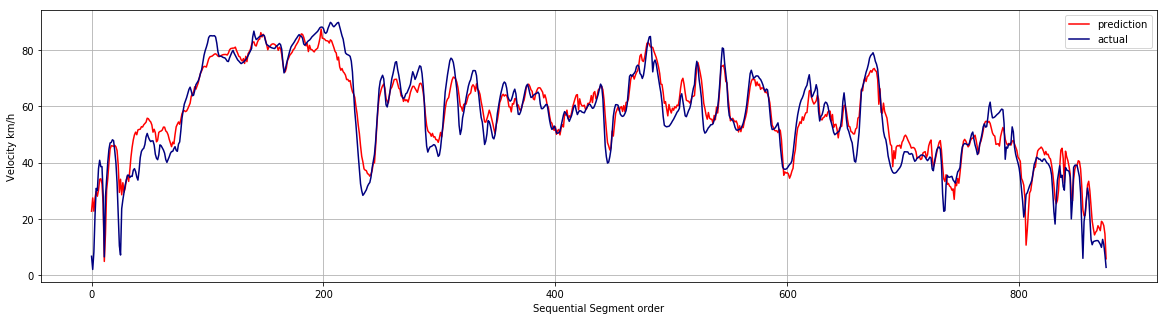

In [52]:
fig = plt.figure()
ax = fig.subplots()

ax.grid(which='both')
ax.set_xlabel("Sequential Segment order")
ax.set_ylabel("Velocity km/h")
plt.rcParams["figure.figsize"] = (20,5)

plt.plot(testDf['Measured_order'].tolist(), testDf['Predicted_Velocity'],c='red', label='prediction')
plt.legend(loc='best')

plt.plot(testDf['Measured_order'].tolist(), testDf['Agg_Velocity'],color='navy', label='actual')
plt.legend(loc='best')
path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/TRIAL/images1/'
# plt.plot(x_test['Measured_order'].tolist(), x_test['Pred_Velocity'],color='red', label='prediction')
# plt.plot(x_test['Measured_order'].tolist(), x_test['Actual_Velocity'],color='navy', label='actual')
fig.savefig(path+'sample.png',bbox_inches='tight') 
#plt.xlim(0, 140)


In [42]:
q = """ select * from avgsPredicted_df  where Predicted_Seg =6598.0  """
rslt = sql.sqldf(q, locals())
rslt

# q = """ select * from trainingDf  where Predicted_Seg =6598.0  """
# rslt = sql.sqldf(q, locals())
# rslt

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
0   2017-11-01 16:18:19.835089          12            12            12.0   
1   2017-11-28 16:21:30.652863        1620            13            13.0   
2   2017-12-01 12:33:05.415543        3291            14            14.0   
3   2017-12-01 13:28:07.119029        4951            11            11.0   
4   2017-12-12 13:40:38.957447        8263            12            12.0   
5   2017-12-21 12:59:13.205088       10166            11            11.0   
6   2017-12-21 13:53:16.152324       11789            10            10.0   
7   2018-01-09 18:00:14.540928       13542            12            12.0   
8   2018-01-10 12:13:15.723163       15156             9             9.0   
9   2017-11-02 12:35:42.583530       18593            12            12.0   
10  2018-01-15 14:21:36.365341       20306            12            12.0   
11  2018-01-16 13:17:42.203438       23675            12            12.0   
12  2018-02-07 17:05:34.610731       25455            13            13.0   
13  2018-01-30 15:15:59.906622       27248            12            12.0   
14  2018-08-07 16:42:54.252720       28885            12            12.0   
15  2018-08-22 14:38:47.069899       30511            11            11.0   
16  2018-08-28 10:48:05.685913       32904            13            13.0   
17  2017-11-03 13:24:47.460596       33851            11            11.0   
18  2018-08-29 13:04:20.941148       36465            13            13.0   
19  2018-08-29 15:58:17.173095       38207            13            13.0   
20  2018-08-29 15:58:17.173095       39819            13            13.0   
21  2018-08-30 08:00:04.186804       41431            13            13.0   
22  2017-11-07 16:56:32.710160       48118            13            13.0   
23  2017-11-08 13:21:01.789380       57587            13            13.0   
24  2017-11-10 12:39:20.876281       66732            12            12.0   
25  2017-11-10 14:07:13.010468       76085            12            12.0   
26  2017-11-16 15:48:02.987963       86621            13            13.0   
27  2017-11-28 14:34:35.276455       96380            12            12.0   

    Measurement_file     Month        Day                  Start_Time  \
0                  1  November  Wednesday  2017-11-01 16:18:19.835089   
1                 10  November    Tuesday  2017-11-28 16:21:30.652863   
2                 11  December     Friday  2017-12-01 12:33:05.415543   
3                 12  December     Friday  2017-12-01 13:28:07.119029   
4                 14  December    Tuesday  2017-12-12 13:40:38.957447   
5                 15  December   Thursday  2017-12-21 12:59:13.205088   
6                 16  December   Thursday  2017-12-21 13:53:16.152324   
7                 17   January    Tuesday  2018-01-09 18:00:14.540928   
8                 18   January  Wednesday  2018-01-10 12:13:15.723163   
9                  2  November   Thursday  2017-11-02 12:35:42.583530   
10                20   January     Monday  2018-01-15 14:21:36.365341   
11                22   January    Tuesday  2018-01-16 13:17:42.203438   
12                23  February  Wednesday  2018-02-07 17:05:34.610731   
13                24   January    Tuesday  2018-01-30 15:15:59.906622   
14                26    August    Tuesday  2018-08-07 16:42:54.252720   
15                27    August  Wednesday  2018-08-22 14:38:47.069899   
16                29    August    Tuesday  2018-08-28 10:48:05.685913   
17                 3  November     Friday  2017-11-03 13:24:47.460596   
18                31    August  Wednesday  2018-08-29 13:04:20.941148   
19                32    August  Wednesday  2018-08-29 15:58:17.173095   
20                33    August  Wednesday  2018-08-29 15:58:17.173095   
21                34    August   Thursday  2018-08-30 08:00:04.186804   
22                 4  November    Tuesday  2017-11-07 16:56:32.710160   
23                 5  November  Wednesday  2017-11-08 13:21:01.78

In [35]:
testDf.head()

Unnamed: 0  Unnamed: 0.1  Measured_order  \
Datetime                                                               
2019-01-15 08:49:15.891413       73073             0             0.0   
2019-01-15 08:49:19.391414       73074             1             1.0   
2019-01-15 08:49:22.391418       73075             2             2.0   
2019-01-15 08:49:25.391422       73076             3             3.0   
2019-01-15 08:49:30.391425       73077             4             4.0   

                            Measurement_file    Month      Day  \
Datetime                                                         
2019-01-15 08:49:15.891413                66  January  Tuesday   
2019-01-15 08:49:19.391414                66  January  Tuesday   
2019-01-15 08:49:22.391418                66  January  Tuesday   
2019-01-15 08:49:25.391422                66  January  Tuesday   
2019-01-15 08:49:30.391425                66  January  Tuesday   

                                           Start_Time  \
Datetime                                                
2019-01-15 08:49:15.891413 2019-01-15 08:49:15.891413   
2019-01-15 08:49:19.391414 2019-01-15 08:49:19.391414   
2019-01-15 08:49:22.391418 2019-01-15 08:49:22.391418   
2019-01-15 08:49:25.391422 2019-01-15 08:49:25.391422   
2019-01-15 08:49:30.391425 2019-01-15 08:49:30.391425   

                                             End_Time  \
Datetime                                                
2019-01-15 08:49:15.891413 2019-01-15 08:49:19.391414   
2019-01-15 08:49:19.391414 2019-01-15 08:49:22.391418   
2019-01-15 08:49:22.391418 2019-01-15 08:49:25.391422   
2019-01-15 08:49:25.391422 2019-01-15 08:49:30.391425   
2019-01-15 08:49:30.391425 2019-01-15 08:49:32.391424   

                                             Duration  Duration_in_hours  \
Datetime                                                                   
2019-01-15 08:49:15.891413  0 days 00:00:03.500001000           0.000972   
2019-01-15 08:49:19.391414  0 days 00:00:03.000004000           0.000833   
2019-01-15 08:49:22.391418  0 days 00:00:03.000004000           0.000833   
2019-01-15 08:49:25.391422  0 days 00:00:05.000003000           0.001389   
2019-01-15 08:49:30.391425  0 days 00:00:01.999999000           0.000556   

                            Duration_in_minutes  Agg_Velocity  Agg_Temp  \
Datetime                                                                  
2019-01-15 08:49:15.891413             0.058333      6.816233       1.0   
2019-01-15 08:49:19.391414             0.050000      2.144981       1.0   
2019-01-15 08:49:22.391418             0.050000      8.300464       1.0   
2019-01-15 08:49:25.391422             0.083333     21.359110       1.0   
2019-01-15 08:49:30.391425             0.033333     30.893108       1.0   

                            Predicted_Seg  
Datetime                                   
2019-01-15 08:49:15.891413         6598.0  
2019-01-15 08:49:19.391414         6599.0  
2019-01-15 08:49:22.391418         6598.0  
2019-01-15 08:49:25.391422         6599.0  
2019-01-15 08:49:30.391425         6613.0

In [4210]:
avgsPredicted_df = avgsPredicted_df.set_index(['Predicted_Seg'])

In [4211]:
avgs_actualDf = """ select avg(Agg_Velocity) Agg_Velocity,avg(Agg_Temp) Agg_Temp,
                    avg(Duration_in_minutes) Duration_in_minutes, Predicted_Seg
                    from testDf group by Predicted_Seg  """
avg_actualDf = sql.sqldf(avgs_actualDf, locals())

In [4212]:
avg_actualDf.head()

Agg_Velocity  Agg_Temp  Duration_in_minutes  Predicted_Seg
0     41.716774       4.0             0.033333         3132.0
1     44.840735       4.0             0.066667         3133.0
2     43.440854       4.0             0.016667         3136.0
3     48.894715       4.0             0.100000         3143.0
4     45.137089       4.0             0.016667         3145.0

In [4213]:
w = """ select * from avgsPredicted_df where Predicted_Seg = 6521 """
ws = sql.sqldf(w, locals())
ws

Predicted_Seg  Agg_Velocity  Agg_Temp  Duration_in_minutes
0         6521.0      5.357438  8.136364             0.015909

In [4214]:
for indexMess, rowMess in testRouteDF.iterrows():
    testRouteDF.loc[indexMess,'DwellTime'] = avgsPredicted_df.loc[rowMess['Predicted_Seg']]['Duration_in_minutes']

In [4215]:
testRouteDF.head()

TimeStamp  Predicted_Seg  Seg_length  Time_Seg  DwellTime
0 1900-01-01 15:47:00           6512    0.009717  15:47:00   0.814881
1 1900-01-01 15:47:00           6513    0.019795  15:47:00   0.019231
2 1900-01-01 15:47:00           6519    0.015773  15:47:00   0.013889
3 1900-01-01 15:47:00           6521    0.014433  15:47:00   0.015909
4 1900-01-01 15:47:00           6524    0.010078  15:47:00   0.049306

In [4216]:
len(testRouteDF),len(avg_actualDf)

(1550, 901)

In [4217]:
f = pd.DataFrame(np.random.rand(3) * 1000, columns=['DwellTime'])
testRouteDF['HH:MM:SS'] = pd.to_timedelta((60*testRouteDF['DwellTime']).astype('int'), unit='s')

In [4218]:
testRouteDF.Time_Seg = testRouteDF.iloc[0]['TimeStamp'] + np.timedelta64(testRouteDF.iloc[0]['HH:MM:SS'],'s')

In [4219]:
#testRouteDF.iloc[13]['Time_Seg'] = #testRouteDF.iloc[12]['TimeStamp']+testRouteDF.iloc[12]['HH:MM:SS']
# np.datetime64('2011-06-15T00:00') + np.timedelta64(12, 'h')
# numpy.datetime64('2011-06-15T12:00-0500')
#testRouteDF.iloc[1]['TimeStamp'] = testRouteDF.iloc[0]['TimeStamp'] + np.timedelta64(testRouteDF.iloc[0]['HH:MM:SS'],'s')

#testRouteDF.iloc[1]['HH:MM:SS']

In [4220]:
i=2
print(testRouteDF.iloc[i-1]['TimeStamp'])

1900-01-01 15:47:00


In [4221]:
testRouteDF.dtypes

TimeStamp         datetime64[ns]
Predicted_Seg              int64
Seg_length               float64
Time_Seg          datetime64[ns]
DwellTime                float64
HH:MM:SS         timedelta64[ns]
dtype: object

In [4222]:
testRouteDF.head()

TimeStamp  Predicted_Seg  Seg_length            Time_Seg  \
0 1900-01-01 15:47:00           6512    0.009717 1900-01-01 15:47:48   
1 1900-01-01 15:47:00           6513    0.019795 1900-01-01 15:47:48   
2 1900-01-01 15:47:00           6519    0.015773 1900-01-01 15:47:48   
3 1900-01-01 15:47:00           6521    0.014433 1900-01-01 15:47:48   
4 1900-01-01 15:47:00           6524    0.010078 1900-01-01 15:47:48   

   DwellTime HH:MM:SS  
0   0.814881 00:00:48  
1   0.019231 00:00:01  
2   0.013889 00:00:00  
3   0.015909 00:00:00  
4   0.049306 00:00:02

In [4223]:
tempDf = pd.DataFrame({'TimeStamp': [],'Predicted_Seg': [], 'Seg_length':[], 'Time_Seg':[], 
                       'DwellTime': [], 'HH:MM:SS':[]})
tempDf = tempDf.append({'TimeStamp': testRouteDF.iloc[0]['TimeStamp'],
               'Predicted_Seg':testRouteDF.iloc[0]['Predicted_Seg'],
               'Seg_length':testRouteDF.iloc[0]['Seg_length'],
               'Time_Seg':testRouteDF.iloc[0]['Time_Seg'],
               'DwellTime':testRouteDF.iloc[0]['DwellTime'],
               'HH:MM:SS':testRouteDF.iloc[0]['HH:MM:SS']}, ignore_index=True)
            
start_seg_time = testRouteDF.iloc[0]['TimeStamp']
start_seg_dwell_time = testRouteDF.iloc[0]['HH:MM:SS']

for i in range(1, len(testRouteDF)-1):
    if(i==1):
        current_seg_time = start_seg_time + np.timedelta64(start_seg_dwell_time,'s')
    else:
        previous_seg_time = testRouteDF.iloc[i-1]['TimeStamp']
        previous_seg_dwell_time = testRouteDF.iloc[i-1]['HH:MM:SS']
        current_seg_time = current_seg_time + np.timedelta64(previous_seg_dwell_time,'s')
    tempDf = tempDf.append({'TimeStamp': current_seg_time,
               'Predicted_Seg':testRouteDF.iloc[i]['Predicted_Seg'],
               'Seg_length':testRouteDF.iloc[i]['Seg_length'],
               'Time_Seg':current_seg_time,
               'DwellTime':testRouteDF.iloc[i]['DwellTime'],
               'HH:MM:SS':testRouteDF.iloc[i]['HH:MM:SS']}, ignore_index=True)


In [4224]:
tempDf.head()

TimeStamp  Predicted_Seg  Seg_length            Time_Seg  \
0 1900-01-01 15:47:00         6512.0    0.009717 1900-01-01 15:47:48   
1 1900-01-01 15:47:48         6513.0    0.019795 1900-01-01 15:47:48   
2 1900-01-01 15:47:49         6519.0    0.015773 1900-01-01 15:47:49   
3 1900-01-01 15:47:49         6521.0    0.014433 1900-01-01 15:47:49   
4 1900-01-01 15:47:49         6524.0    0.010078 1900-01-01 15:47:49   

   DwellTime HH:MM:SS  
0   0.814881 00:00:48  
1   0.019231 00:00:01  
2   0.013889 00:00:00  
3   0.015909 00:00:00  
4   0.049306 00:00:02

In [4225]:
len(tempDf)

1549

In [4226]:
tempDf = tempDf.drop_duplicates(subset=['TimeStamp'], keep='last', inplace=False)

In [4227]:
#print(tempDf['TimeStamp'].dt.strftime('%H:%M:%S'))
tempDf['TimeStamp'] = pd.to_datetime(tempDf['TimeStamp'])

In [ ]:
saveDirectory = "C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/kdtree/"

Text(0, 0.5, 'TimeStamp')

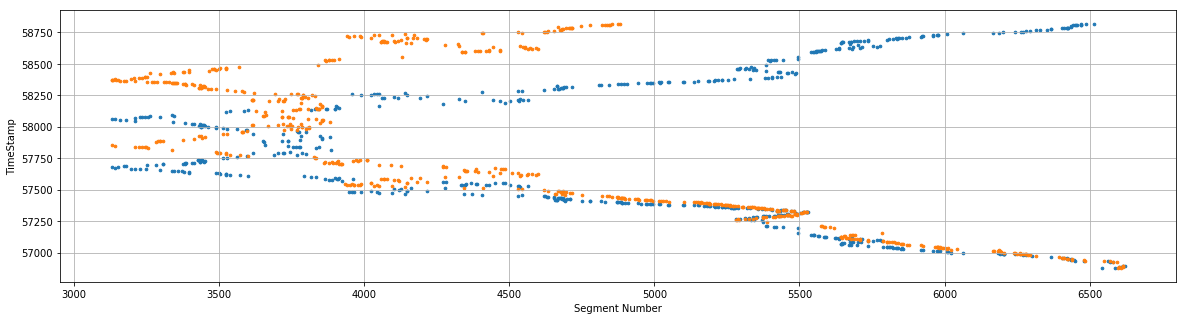

In [4297]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
#plt.plot(tempDf.Predicted_Seg,tempDf['TimeStamp'], label= 'Predicted Data')
plt.scatter(tempDf.Predicted_Seg,tempDf['TimeStamp'], label= 'Predicted Data',s=7)
plt.scatter(testDf.Predicted_Seg,testDf['Start_Time'], label= 'Predicted Data',s=7)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Segment Number')
plt.ylabel('TimeStamp')
#plt.xlim(3750, 3900)
#fig.savefig(saveDirectory+'Time_Seg_Plot',bbox_inches='tight', label = 'Actual Data')

In [4233]:
path = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/tempDf.csv'
tempDf.to_csv(path)

In [4234]:
# testRoute = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/tempDf.csv'
# testRouteDF = pd.read_csv(testRoute)

In [4235]:
tempDf.dtypes

TimeStamp         datetime64[ns]
Predicted_Seg            float64
Seg_length               float64
Time_Seg          datetime64[ns]
DwellTime                float64
HH:MM:SS         timedelta64[ns]
dtype: object

In [4236]:
df = pd.read_excel("C:/Users/NImi Jithin/Desktop/data/measurements/SegmentTable.xlsx")
df.head(3)

Segment_ID  Start_Longitude  Start_Latitude  End_Longitude  End_Latitude  \
0           1        10.128375       51.868551      10.128433     51.868380   
1           2        10.128384       51.868665      10.128375     51.868551   
2           3        10.128433       51.868380      10.128498     51.868291   

   Segment_Length  Mid_Latitude  Mid_Longitude  
0        0.019427     51.868466      10.128404  
1        0.012691     51.868608      10.128379  
2        0.010856     51.868336      10.128466

In [4237]:
# tempDf = pd.DataFrame({'TimeStamp': [],'Predicted_Seg': [], 'Seg_length':[], 'Time_Seg':[], 
#                        'DwellTime': [], 'HH:MM:SS':[]})

In [4238]:
def getLatLong(seg_id):
    source_latlon_df = df.loc[df['Segment_ID'] == seg_id]
    source_latlon = source_latlon_df[['Mid_Latitude', 'Mid_Longitude']].values
    return source_latlon

In [4239]:
target_latlons = df[['Mid_Latitude', 'Mid_Longitude']].values

In [4240]:
target_tree = GeodesicKDTree(target_latlons, distance_metric='Euclidean')

In [4241]:
# for indexMess, rowMess in testRouteDF.iterrows():
#     seg_id = rowMess['Predicted_Seg']
#     source_latlon = getLatLong(seg_id)
#     #specify the neighbours here
#     #distances, indices = target_tree.query(source_latlon, k=1)
#     #print(seg_id, distances, indices)
    
#     tempDf = tempDf.append({'TimeStamp': testRouteDF.iloc[indexMess]['TimeStamp'],
#                'Predicted_Seg':testRouteDF.iloc[indexMess]['Predicted_Seg'],
#                'Seg_length':testRouteDF.iloc[indexMess]['Seg_length'],
#                'Time_Seg':testRouteDF.iloc[indexMess]['Time_Seg'],
#                'DwellTime':testRouteDF.iloc[indexMess]['DwellTime'],
#                'HH:MM:SS':testRouteDF.iloc[indexMess]['HH:MM:SS']},
#                            ignore_index=True)

In [4242]:
tempDf.head(2)

TimeStamp  Predicted_Seg  Seg_length            Time_Seg  \
0 1900-01-01 15:47:00         6512.0    0.009717 1900-01-01 15:47:48   
1 1900-01-01 15:47:48         6513.0    0.019795 1900-01-01 15:47:48   

   DwellTime HH:MM:SS  
0   0.814881 00:00:48  
1   0.019231 00:00:01

In [4243]:
tempDf.to_csv('C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/tempDf2.csv')

In [4244]:
#tempDf.iloc[0]['Neighbour'][0][0]

In [4245]:
tempDf.head(3)

TimeStamp  Predicted_Seg  Seg_length            Time_Seg  \
0 1900-01-01 15:47:00         6512.0    0.009717 1900-01-01 15:47:48   
1 1900-01-01 15:47:48         6513.0    0.019795 1900-01-01 15:47:48   
4 1900-01-01 15:47:49         6524.0    0.010078 1900-01-01 15:47:49   

   DwellTime HH:MM:SS  
0   0.814881 00:00:48  
1   0.019231 00:00:01  
4   0.049306 00:00:02

In [4246]:
tempDf['TimeStamp'] = pd.to_datetime(tempDf['TimeStamp'])
tempDf['Time_Seg'] = pd.to_datetime(tempDf['Time_Seg'])

In [4247]:
tempDf.dtypes

TimeStamp         datetime64[ns]
Predicted_Seg            float64
Seg_length               float64
Time_Seg          datetime64[ns]
DwellTime                float64
HH:MM:SS         timedelta64[ns]
dtype: object

In [4248]:
tempDf.head()

TimeStamp  Predicted_Seg  Seg_length            Time_Seg  \
0 1900-01-01 15:47:00         6512.0    0.009717 1900-01-01 15:47:48   
1 1900-01-01 15:47:48         6513.0    0.019795 1900-01-01 15:47:48   
4 1900-01-01 15:47:49         6524.0    0.010078 1900-01-01 15:47:49   
5 1900-01-01 15:47:51         6471.0    0.194909 1900-01-01 15:47:51   
6 1900-01-01 15:47:53         6541.0    0.020288 1900-01-01 15:47:53   

   DwellTime HH:MM:SS  
0   0.814881 00:00:48  
1   0.019231 00:00:01  
4   0.049306 00:00:02  
5   0.035000 00:00:02  
6   0.042857 00:00:02

In [4249]:
q1 = """ select TimeStamp, Predicted_Seg from tempDf """
kdTreetempDf = sql.sqldf(q1, locals())

C:\ProgramData\AnacondaInstall\lib\site-packages\pandasql\sqldf.py:121: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  index=not any(name is None for name in df.index.names))  # load index into db if all levels are named


In [4250]:
len(kdTreetempDf)

1089

In [4251]:
#q1 = """ select Datetime, Predicted_Seg from trainingDf """
q1 = """ select * from trainingDf """
kdTree_trainingDf = sql.sqldf(q1, locals())

In [4252]:
len(kdTree_trainingDf)

10635

In [4253]:
kdTree_trainingDf['Datetime'] = pd.to_datetime(kdTree_trainingDf['Datetime'])
kdTreetempDf['TimeStamp'] = pd.to_datetime(kdTreetempDf['TimeStamp'])

In [4254]:
kdTree_trainingDf.head(3)

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
0 2017-11-01 16:17:31.835088       60734         60734             0.0   
1 2017-11-01 16:17:58.835092       60735         60735             1.0   
2 2017-11-01 16:18:00.835091       60737         60737             3.0   

   Measurement_file     Month        Day  Year                  Start_Time  \
0                 1  November  Wednesday  2017  2017-11-01 16:17:31.835088   
1                 1  November  Wednesday  2017  2017-11-01 16:17:58.835092   
2                 1  November  Wednesday  2017  2017-11-01 16:18:00.835091   

                     End_Time                   Duration  Duration_in_hours  \
0  2017-11-01 16:17:58.835092  0 days 00:00:27.000004000           0.007500   
1  2017-11-01 16:17:59.835087  0 days 00:00:00.999995000           0.000278   
2  2017-11-01 16:18:01.835096  0 days 00:00:01.000005000           0.000278   

   Duration_in_minutes  Agg_Velocity  Agg_Temp  Predicted_Seg  Segment_Length  
0             0.450000      3.732855      12.5         6512.0        0.009717  
1             0.016667      6.627475      12.5         6513.0        0.019795  
2             0.016667      3.573751      12.5         6521.0        0.014433

In [4255]:
kdTreetempDf.dtypes

TimeStamp        datetime64[ns]
Predicted_Seg           float64
dtype: object

In [4256]:
without_date = kdTreetempDf['TimeStamp'].apply( lambda d : d.time() )
kdTreetempDf['TimeStamp'] = without_date
without_date = kdTree_trainingDf['Datetime'].apply( lambda d : d.time() )
kdTree_trainingDf['Datetime'] = without_date

In [4257]:
kdTreetempDf['TimeStamp'] = pd.to_timedelta(kdTreetempDf['TimeStamp'].astype(str))
kdTree_trainingDf['TimeStamp'] = pd.to_timedelta(kdTree_trainingDf['Datetime'].astype(str))

In [4258]:
kdTreetempDf['TimeStamp'] = pd.to_timedelta(kdTreetempDf['TimeStamp']).astype('timedelta64[s]').astype(int)
kdTree_trainingDf['TimeStamp'] = pd.to_timedelta(kdTree_trainingDf['TimeStamp']).astype('timedelta64[s]').astype(int)

In [4259]:
# kdTree_trainingDf['Pred_seg'] = kdTree_trainingDf['Predicted_Seg']
# kdTree_trainingDf = kdTree_trainingDf.set_index('Predicted_Seg')

In [4260]:
kdTree_trainingDf.head(5)

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
0  16:17:31.835088       60734         60734             0.0   
1  16:17:58.835092       60735         60735             1.0   
2  16:18:00.835091       60737         60737             3.0   
3  16:18:01.835096       60738         60738             4.0   
4  16:18:03.835085       60739         60739             5.0   

   Measurement_file     Month        Day  Year                  Start_Time  \
0                 1  November  Wednesday  2017  2017-11-01 16:17:31.835088   
1                 1  November  Wednesday  2017  2017-11-01 16:17:58.835092   
2                 1  November  Wednesday  2017  2017-11-01 16:18:00.835091   
3                 1  November  Wednesday  2017  2017-11-01 16:18:01.835096   
4                 1  November  Wednesday  2017  2017-11-01 16:18:03.835085   

                     End_Time                   Duration  Duration_in_hours  \
0  2017-11-01 16:17:58.835092  0 days 00:00:27.000004000           0.007500   
1  2017-11-01 16:17:59.835087  0 days 00:00:00.999995000           0.000278   
2  2017-11-01 16:18:01.835096  0 days 00:00:01.000005000           0.000278   
3  2017-11-01 16:18:03.835085  0 days 00:00:01.999989000           0.000556   
4  2017-11-01 16:18:05.835084  0 days 00:00:01.999999000           0.000556   

   Duration_in_minutes  Agg_Velocity  Agg_Temp  Predicted_Seg  Segment_Length  \
0             0.450000      3.732855      12.5         6512.0        0.009717   
1             0.016667      6.627475      12.5         6513.0        0.019795   
2             0.016667      3.573751      12.5         6521.0        0.014433   
3             0.033333      7.243261      12.5         6524.0        0.010078   
4             0.033333     15.256550      12.5         6471.0        0.194909   

   TimeStamp  
0      58651  
1      58678  
2      58680  
3      58681  
4      58683

In [4261]:
kdTreetempDf.head()

TimeStamp  Predicted_Seg
0      56820         6512.0
1      56868         6513.0
2      56869         6524.0
3      56871         6471.0
4      56873         6541.0

In [4262]:
target_latlons = kdTree_trainingDf[['TimeStamp', 'Predicted_Seg','Agg_Temp','Agg_Velocity']].values
#target_latlons = kdTree_trainingDf[['TimeStamp', 'Predicted_Seg']].values

In [4263]:
kdTreetempDf['Agg_Temp'] = 0
kdTreetempDf['Agg_Velocity'] = 0

In [4264]:
target_tree = KDTree(target_latlons, leaf_size=2)

In [4265]:
target_latlons[0]

array([5.86510000e+04, 6.51200000e+03, 1.25000000e+01, 3.73285514e+00])

C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Time in Seconds')

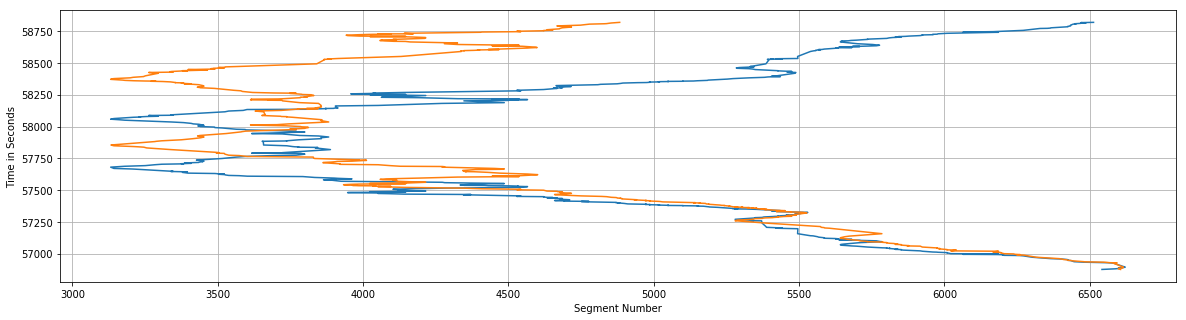

In [4295]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.subplot(1, 1, 1)
plt.plot(tempDf.Predicted_Seg,tempDf['TimeStamp'], label= 'TestRout Time Prediction')
plt.plot(testDf.Predicted_Seg,testDf['Start_Time'], label= 'TestRout Time Prediction')
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('Segment Number')
plt.ylabel('Time in Seconds')
#plt.xlim(3525, 3965)
#plt.ylim(47500, 47775)
#fig.savefig(saveDirectory+'TimeInSeconds_Seg_Plot',bbox_inches='tight', label = 'Actual Data')

In [4268]:
kdTreetempDf.head()

TimeStamp  Predicted_Seg  Agg_Temp  Agg_Velocity
0      56820         6512.0         0             0
1      56868         6513.0         0             0
2      56869         6524.0         0             0
3      56871         6471.0         0             0
4      56873         6541.0         0             0

In [4269]:
tempDf = pd.DataFrame({'TimeStamp': [],'Predicted_Seg': [], 'Nearest_Segment':[], 'Nearest_Segment_Time':[],
                       'Nearest_Segment_Dist':[],'Temp':[],'Velocity':[]})

# tempDf = pd.DataFrame({'TimeStamp': [],'Predicted_Seg': [], 'Nearest_Segment':[], 'Nearest_Segment_Time':[],
#                        'Nearest_Segment_Dist':[]})

In [4270]:
target_latlons

array([[5.86510000e+04, 6.51200000e+03, 1.25000000e+01, 3.73285514e+00],
       [5.86780000e+04, 6.51300000e+03, 1.25000000e+01, 6.62747515e+00],
       [5.86800000e+04, 6.52100000e+03, 1.25000000e+01, 3.57375106e+00],
       ...,
       [5.36270000e+04, 6.51900000e+03, 6.00000000e+00, 7.96329754e+00],
       [5.36290000e+04, 6.51300000e+03, 6.00000000e+00, 1.26169005e+01],
       [5.36300000e+04, 6.51200000e+03, 6.00000000e+00, 3.56339187e+00]])

In [4271]:
kdTreetempDf.head()

TimeStamp  Predicted_Seg  Agg_Temp  Agg_Velocity
0      56820         6512.0         0             0
1      56868         6513.0         0             0
2      56869         6524.0         0             0
3      56871         6471.0         0             0
4      56873         6541.0         0             0

In [4272]:
for indexMess, rowMess in kdTreetempDf.iterrows():
    source_latlon = [[rowMess['TimeStamp'], rowMess['Predicted_Seg'],rowMess['Agg_Temp'],rowMess['Agg_Velocity']]]
    neighbours = 7
    distances, indices = target_tree.query(source_latlon, k=neighbours)
    vel = 0.0
    temp = 0.0
    for i in range(0, neighbours-1):
        vel = vel+ target_latlons[indices[0][i]][3]
        temp = temp + target_latlons[indices[0][i]][2]
        i=i+1
    vel=vel/neighbours
    temp=temp/neighbours
    
    tempDf = tempDf.append({'TimeStamp': rowMess['TimeStamp'],'Predicted_Seg':rowMess['Predicted_Seg'],
                            'Nearest_Segment':[target_latlons[indices[0][0]][1],target_latlons[indices[0][1]][1],target_latlons[indices[0][2]][1]],
                            'Nearest_Segment_Time':[target_latlons[indices[0][0]][0],target_latlons[indices[0][1]][0],target_latlons[indices[0][2]][0]],
                            'Nearest_Segment_Dist': distances,'Temp':temp,
                            'Velocity':vel},ignore_index=True)
    
#,'Temp':target_latlons[indices[0][0]][2],
#                            'Velocity':target_latlons[indices[0][0]][3]

In [4273]:
#['TimeStamp', 'Predicted_Seg','Agg_Temp','Agg_Velocity'] index = [[1488 1499 1502]]
len(tempDf)

1089

In [4274]:
tempDf = tempDf.drop_duplicates(subset='TimeStamp', keep='last', inplace=False)

In [4275]:
tempDf.head(5)

TimeStamp  Predicted_Seg           Nearest_Segment  \
0    56820.0         6512.0  [6512.0, 6513.0, 6521.0]   
1    56868.0         6513.0  [6512.0, 6513.0, 6521.0]   
2    56869.0         6524.0  [6512.0, 6513.0, 6521.0]   
3    56871.0         6471.0  [6512.0, 6513.0, 6521.0]   
4    56873.0         6541.0  [6512.0, 6513.0, 6521.0]   

          Nearest_Segment_Time  \
0  [58651.0, 58678.0, 58680.0]   
1  [58651.0, 58678.0, 58680.0]   
2  [58651.0, 58678.0, 58680.0]   
3  [58651.0, 58678.0, 58680.0]   
4  [58651.0, 58678.0, 58680.0]   

                                Nearest_Segment_Dist       Temp  Velocity  
0  [[1831.0464724324984, 1858.0541363014438, 1860...  10.714286   8.79947  
1  [[1783.0480038988003, 1810.055295682125, 1812....  10.714286   8.79947  
2  [[1782.0881527599852, 1809.0887688079058, 1811...  10.714286   8.79947  
3  [[1780.5199196323235, 1807.5434084488552, 1809...  10.714286   8.79947  
4  [[1778.2843372777866, 1805.2726036327324, 1807...  10.714286   8.79947

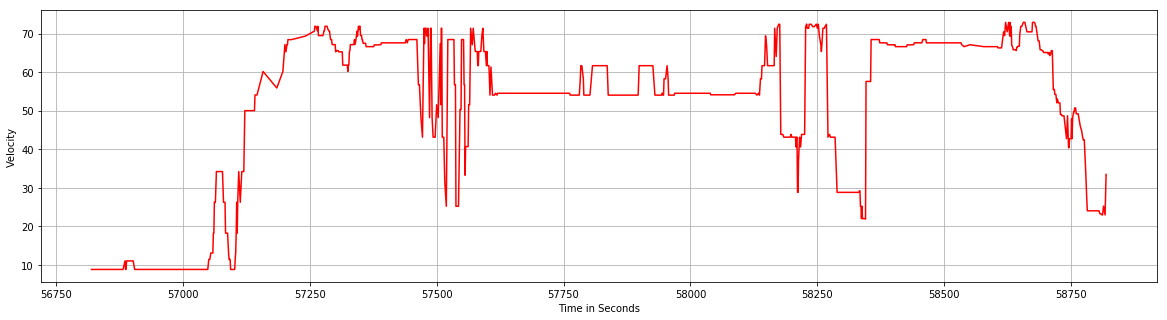

In [4276]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
#plt.scatter(kdTreetempDf.Predicted_Seg,tempDf.Velocity, label= 'Predicted velocity',color='red')
plt.plot(tempDf['TimeStamp'],tempDf.Velocity, label= 'Predicted velocity',color='red')
#plt.plot(kdTreetempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red')
plt.rcParams["figure.figsize"] = (20,5)
plt.ylabel('Velocity')
plt.xlabel('Time in Seconds')
#plt.xlim(3525, 3965)
#plt.ylim(47500, 47775)
fig.savefig(saveDirectory+'Predicted_Vel_time_plt',bbox_inches='tight', label = 'Actual Data')

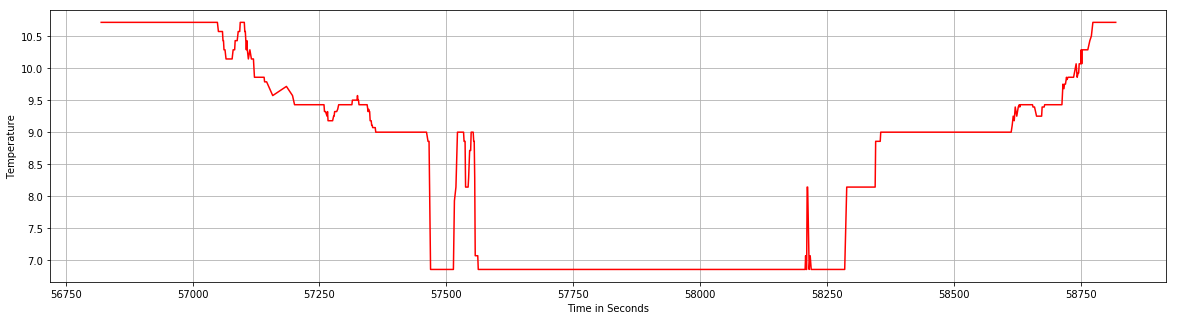

In [4277]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.plot(tempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red')
plt.rcParams["figure.figsize"] = (20,5)
plt.ylabel('Temperature')
plt.xlabel('Time in Seconds')
#plt.xlim(3525, 3965)
#plt.ylim(47500, 47775)
fig.savefig(saveDirectory+'Predicted_Temp_time_withoutWeather_plt',bbox_inches='tight', label = 'Actual Data')

In [4278]:
tempDf.to_csv('C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/tempdf/tempDf.csv')

In [4279]:
testDf.tail(2)

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
13489  2017-11-16 16:29:12.987963       81544         81544          1550.0   
13490  2017-11-16 16:29:13.987958       81545         81545          1551.0   

       Measurement_file     Month       Day  Year                  Start_Time  \
13489                 8  November  Thursday  2017  2017-11-16 16:29:12.987963   
13490                 8  November  Thursday  2017  2017-11-16 16:29:13.987958   

                         End_Time                   Duration  \
13489  2017-11-16 16:29:13.987958  0 days 00:00:00.999995000   
13490  2017-11-16 16:29:34.987965  0 days 00:00:21.000007000   

       Duration_in_hours  Duration_in_minutes  Agg_Velocity  Agg_Temp  \
13489           0.000278             0.016667     12.606652       7.5   
13490           0.005833             0.350000      3.445126       7.5   

       Predicted_Seg  
13489         6513.0  
13490         6512.0

In [4280]:
testDf['Start_Time'] = pd.to_datetime(testDf['Start_Time'])
without_date = testDf['Start_Time'].apply( lambda d : d.time() )
testDf['Start_Time'] = without_date
testDf['Start_Time'] = pd.to_timedelta(testDf['Start_Time'].astype(str))
testDf['Start_Time'] = pd.to_timedelta(testDf['Start_Time']).astype('timedelta64[s]').astype(int)

In [4283]:
len(testDf)

1491

In [4282]:
testDf = testDf.drop_duplicates(subset='Start_Time', keep='last', inplace=False)

In [4284]:
x = reduce(np.intersect1d, (tempDf.TimeStamp, testDf.Start_Time))
testDf = testDf[testDf['Start_Time'].isin(x)]
tempDf = tempDf[tempDf['TimeStamp'].isin(x)]

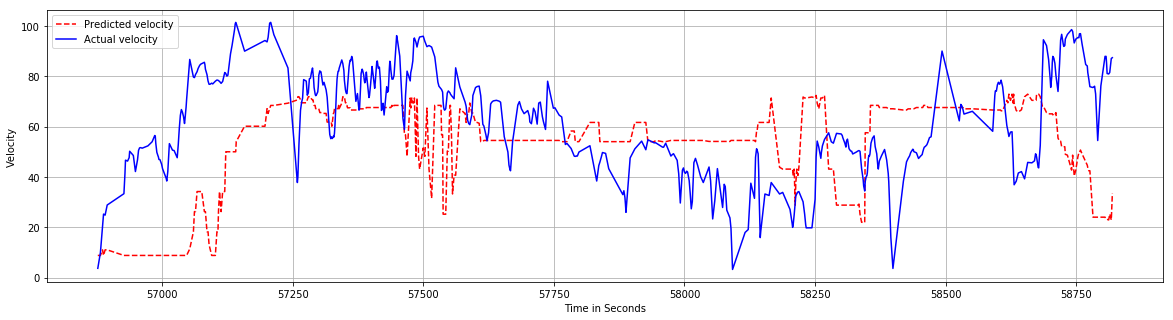

In [4285]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.plot(tempDf['TimeStamp'],tempDf.Velocity, label= 'Predicted velocity',color='red',linestyle='dashed')
plt.plot(testDf['Start_Time'],testDf.Agg_Velocity, label= 'Actual velocity',color='blue')
plt.legend(loc='best')
#plt.plot(kdTreetempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red')
plt.rcParams["figure.figsize"] = (20,5)
plt.ylabel('Velocity')
plt.xlabel('Time in Seconds')
fig.savefig(saveDirectory+'ActualVsPredicted_Vel_plt',bbox_inches='tight', label = 'Actual Data')
#plt.xlim(56810, 59352)
#plt.ylim(47500, 47775)

In [4286]:
rmse_vel = mean_squared_error(testDf.Agg_Velocity, tempDf.Velocity)
absolute_vel = mean_absolute_error(testDf.Agg_Velocity, tempDf.Velocity)
rmse_vel, absolute_vel

(770.2987931702237, 22.159516543528763)

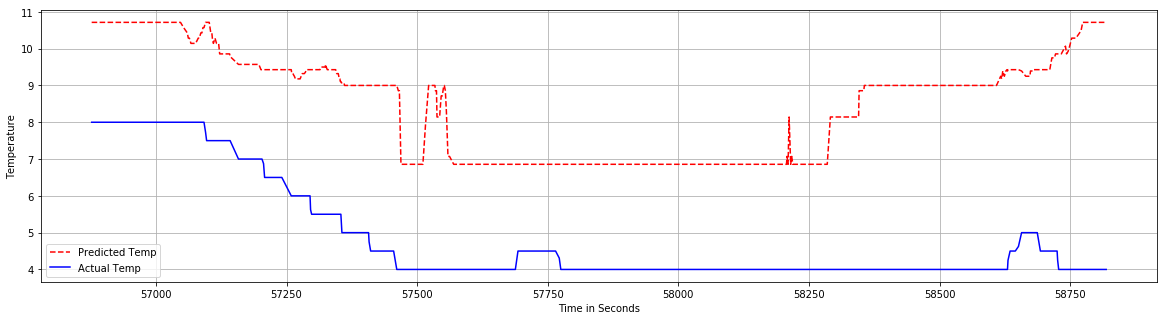

In [4287]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.plot(tempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red',linestyle='dashed')
#plt.scatter(kdTree_trainingDf.TimeStamp,kdTree_trainingDf.Agg_Temp, label= 'Actual Temp',color='blue')
plt.plot(testDf['Start_Time'],testDf.Agg_Temp, label= 'Actual Temp',color='blue')
plt.legend(loc='best')
#plt.plot(kdTreetempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red')
plt.rcParams["figure.figsize"] = (20,5)
plt.ylabel('Temperature')
plt.xlabel('Time in Seconds')
fig.savefig(saveDirectory+'ActualVsPredicted_Temp_plt_without',bbox_inches='tight', label = 'Actual Data')
#plt.xlim(3525, 3965)
#plt.xlim(56810, 59352)

In [4288]:
rmse_temp = mean_squared_error(testDf.Agg_Temp, tempDf.Temp)
absolute_temp = mean_absolute_error(testDf.Agg_Temp, tempDf.Temp)
rmse_temp, absolute_temp

(15.194854007631296, 3.7319176061503216)

In [4289]:
tempDf['Temp'] = tempDf['Temp']+meanTemp

In [4290]:
tempDf['Temp'] = tempDf['Temp']/2

In [4150]:
#kdTreetempDf['TimeStamp'] = kdTreetempDf['TimeStamp']*2 - meanTemp

In [4156]:
kdTreetempDf.head()

TimeStamp  Predicted_Seg  Agg_Temp  Agg_Velocity
0    56820.0         6512.0  2.295379             0
1    56868.0         6513.0  2.295379             0
2    56869.0         6524.0  2.295379             0
3    56871.0         6471.0  2.295379             0
4    56873.0         6541.0  2.295379             0

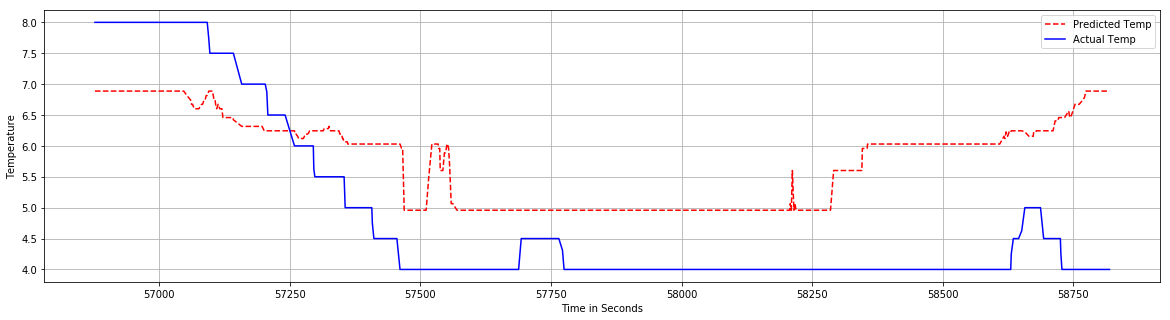

In [4291]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.plot(tempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red',linestyle='dashed')
#plt.scatter(kdTree_trainingDf.TimeStamp,kdTree_trainingDf.Agg_Temp, label= 'Actual Temp',color='blue')
plt.plot(testDf['Start_Time'],testDf.Agg_Temp, label= 'Actual Temp',color='blue')
plt.legend(loc='best')
#plt.plot(kdTreetempDf['TimeStamp'],tempDf.Temp, label= 'Predicted Temp',color='red')
plt.rcParams["figure.figsize"] = (20,5)
plt.ylabel('Temperature')
plt.xlabel('Time in Seconds')
fig.savefig(saveDirectory+'ActualVsPredicted_Temp_plt_with_Weather',bbox_inches='tight', label = 'Actual Data')
#plt.xlim(3525, 3965)
#plt.xlim(56810, 59352)

In [4292]:
rmse_temp = mean_squared_error(testDf.Agg_Temp, tempDf.Temp)
absolute_temp = mean_absolute_error(testDf.Agg_Temp, tempDf.Temp)
math.sqrt(rmse_temp), absolute_temp

(1.4066511956779415, 1.2727617397074291)

In [4174]:
x = reduce(np.intersect1d, (tempDf.TimeStamp, testDf.Start_Time))
testDf = testDf[testDf['Start_Time'].isin(x)]
tempDf = tempDf[tempDf['TimeStamp'].isin(x)]

In [4175]:
len(testDf),len(tempDf)

(616, 616)

In [4177]:
rmse_dwell = mean_squared_error(testDf.Agg_Velocity, tempDf.Velocity)
absolute_dwell = mean_absolute_error(testDf.Agg_Velocity, tempDf.Velocity)
rmse_dwell, absolute_dwell

(582.8882998610719, 19.774403086619422)

In [4178]:
testDf.head()

Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
11951  2017-11-16 15:47:57.987970       80006         80006            12.0   
11952  2017-11-16 15:48:02.987963       80007         80007            13.0   
11953  2017-11-16 15:48:06.987961       80008         80008            14.0   
11954  2017-11-16 15:48:08.987960       80009         80009            15.0   
11955  2017-11-16 15:48:11.987954       80010         80010            16.0   

       Measurement_file     Month       Day  Year  Start_Time  \
11951                 8  November  Thursday  2017       56877   
11952                 8  November  Thursday  2017       56882   
11953                 8  November  Thursday  2017       56886   
11954                 8  November  Thursday  2017       56888   
11955                 8  November  Thursday  2017       56891   

                         End_Time                   Duration  \
11951  2017-11-16 15:48:02.987963  0 days 00:00:04.999993000   
11952  2017-11-16 15:48:06.987961  0 days 00:00:03.999998000   
11953  2017-11-16 15:48:08.987960  0 days 00:00:01.999999000   
11954  2017-11-16 15:48:11.987954  0 days 00:00:02.999994000   
11955  2017-11-16 15:48:13.987954  0 days 00:00:02.000000000   

       Duration_in_hours  Duration_in_minutes  Agg_Velocity  Agg_Temp  \
11951           0.001389             0.083333      3.675476       8.0   
11952           0.001111             0.066667      9.941900       8.0   
11953           0.000556             0.033333     20.504330       8.0   
11954           0.000833             0.050000     25.257575       8.0   
11955           0.000556             0.033333     24.840992       8.0   

       Predicted_Seg  
11951         6606.0  
11952         6598.0  
11953         6599.0  
11954         6613.0  
11955         6614.0

In [4179]:
tempDf.head()

TimeStamp  Predicted_Seg           Nearest_Segment  \
6     56877.0         6542.0  [6512.0, 6513.0, 6521.0]   
8     56882.0         6588.0  [6512.0, 6513.0, 6521.0]   
9     56886.0         6606.0  [6512.0, 6513.0, 6521.0]   
11    56888.0         6599.0  [6512.0, 6513.0, 6521.0]   
13    56891.0         6614.0  [6512.0, 6513.0, 6521.0]   

           Nearest_Segment_Time  \
6   [58651.0, 58678.0, 58680.0]   
8   [58651.0, 58678.0, 58680.0]   
9   [58651.0, 58678.0, 58680.0]   
11  [58651.0, 58678.0, 58680.0]   
13  [58651.0, 58678.0, 58680.0]   

                                 Nearest_Segment_Dist      Temp   Velocity  
6   [[1774.3016046341997, 1801.289031062729, 1803....  7.467753  19.898493  
8   [[1770.679864969243, 1797.6209760199465, 1799....  7.467753  19.898493  
9   [[1767.5494856460161, 1794.4673787580828, 1796...  7.467753  19.898493  
11  [[1765.1935259929705, 1792.1205800466955, 1793...  7.467753  19.898493  
13  [[1763.0014702794483, 1789.9078673012486, 1791...  7.467753  19.898493

In [2745]:
q1 = """ select * from avg_actualDf where Predicted_Seg = 3538.0  """
a = sql.sqldf(q1, locals())
a

Agg_Velocity  Agg_Temp  Duration_in_minutes  Predicted_Seg
0     53.504152  2.666667             0.071296         3538.0

In [3354]:
tempDf.head(1)

TimeStamp  Predicted_Seg           Nearest_Segment  \
0    46773.0         6512.0  [5530.0, 5524.0, 5526.0]   

          Nearest_Segment_Time  \
0  [46272.0, 46273.0, 46269.0]   

                                Nearest_Segment_Dist  Temp   Velocity  
0  [[1103.5684652981402, 1108.4916424987389, 1108...   5.0  51.552226

In [3364]:
tempDf_vel = tempDf.groupby(['Predicted_Seg']).mean()


In [3391]:
tempDf_temp = tempDf.groupby(['Predicted_Seg']).mean()

In [3366]:
tempDf_vel.head(2)

TimeStamp  Temp   Velocity
Predicted_Seg                            
3132.0           47794.0   4.0  36.006745
3133.0           47792.5   4.0  36.006745

In [3372]:
q1 = """ select avg(Agg_Temp) Temp, avg(Agg_Velocity) Velocity,Predicted_Seg,Start_Time  from testDf group by Start_Time """
a = sql.sqldf(q1, locals())

In [3374]:
q1 = """ select avg(Agg_Temp) Temp, avg(Agg_Velocity) Velocity,Predicted_Seg,Start_Time  from testDf group by Predicted_Seg """
a_vel = sql.sqldf(q1, locals())

In [3373]:
a.head()

Temp   Velocity  Predicted_Seg  Start_Time
0   8.0   5.067061         6512.0       38009
1   8.0  12.929632         6519.0       38026
2   8.0   7.630580         6524.0       38027
3   8.0  12.547064         6471.0       38028
4   8.0  16.653992         6541.0       38030

In [3375]:
a_vel.head()

Temp   Velocity  Predicted_Seg  Start_Time
0  6.100000  39.382598         3132.0       59945
1  6.100000  43.304604         3133.0       59941
2  6.100000  40.660448         3136.0       59946
3  6.075000  47.805428         3143.0       59935
4  5.944444  42.008239         3145.0       59948

In [3410]:
#tempDf_temp.reset_index()
#a.reset_index()
tempDf_temp.head()

TimeStamp  Temp   Velocity     new
Predicted_Seg                                    
3132.0           47794.0   4.0  36.006745  3132.0
3133.0           47792.5   4.0  36.006745  3133.0
3136.0           47794.0   4.0  38.707895  3136.0
3143.0           47791.5   4.0  34.940782  3143.0
3145.0           47794.0   4.0  34.940782  3145.0

C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Temperature')

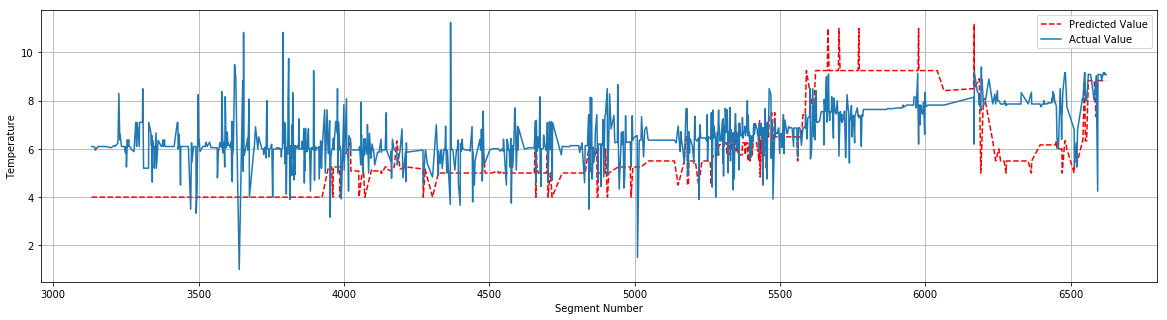

In [3404]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(which='both')
plt.subplot(1, 1, 1)
#-----------------------------------------Temp plot-----------------------------------------
plt.plot(tempDf.index.values, tempDf_temp.Temp,label='Predicted Value',linestyle='dashed',color='red')
plt.plot(a_vel.Predicted_Seg, a_vel.Temp, label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both') ,linestyle='dashed',color='red'  ,c='red',s=15
plt.xlabel('Segment Number')
plt.ylabel('Temperature')
#plt.ylim(45,52)
#plt.xlim(46770,47461)
#plt.xlim(3100, 3500)
#fig.savefig(saveDirectory+'velocity.png',bbox_inches='tight')

C:\ProgramData\AnacondaInstall\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(3100, 3500)

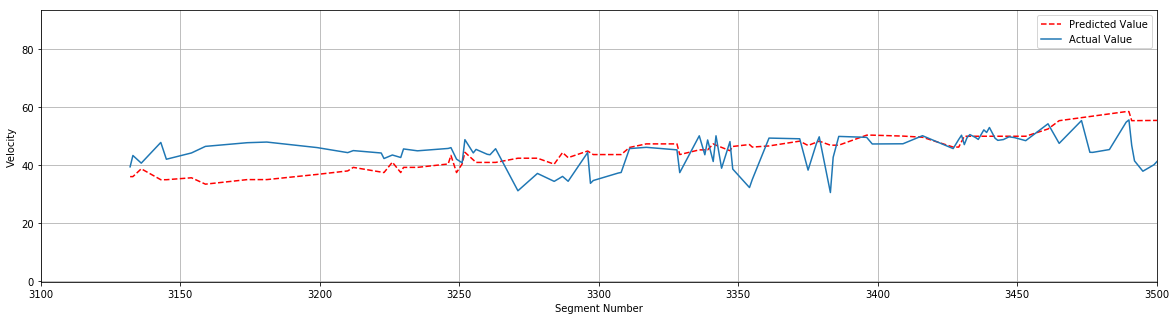

In [3407]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(which='both')
plt.subplot(1, 1, 1)
#-----------------------------------------Temp plot-----------------------------------------
plt.plot(tempDf_temp.index.values, tempDf_temp.Velocity,label='Predicted Value',linestyle='dashed',color='red')
plt.plot(a_vel.Predicted_Seg, a_vel.Velocity, label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both') ,linestyle='dashed',color='red'  ,c='red',s=15
plt.xlabel('Segment Number')
plt.ylabel('Velocity')
#plt.ylim(45,52)
#plt.xlim(46770,47461)
plt.xlim(3100, 3500)
#fig.savefig(saveDirectory+'velocity.png',bbox_inches='tight')

In [3411]:
len(tempDf_temp),len(a_vel)

(613, 968)

In [3408]:
tempDf_temp['new'] = tempDf_temp.index
a_vel['new'] = a_vel.index

In [3409]:
# trainingDf = trainingDf[trainingDf['Predicted_Seg'].isin(x)]
# testDf = testDf[testDf['Predicted_Seg'].isin(x)]
# testRouteDF = testRouteDF[testRouteDF['Predicted_Seg'].isin(x)]

0

In [2583]:
rmse_dwell = mean_squared_error(avg_actualDf.Agg_Temp, tempDf.Temp)
absolute_dwell = mean_absolute_error(avg_actualDf.Agg_Temp, tempDf.Temp)
rmse_dwell, absolute_dwell

(6.220150089996764, 2.05339578781686)

In [2437]:
avg_actualDf.head()

Agg_Velocity  Agg_Temp  Duration_in_minutes  Predicted_Seg
0     39.710044       2.6             0.026667         3132.0
1     44.516222       2.6             0.073333         3133.0
2     39.349593       2.6             0.033333         3136.0
3     49.190462       2.6             0.106667         3143.0
4     40.397830       2.6             0.020000         3145.0

In [2299]:
#q1 = """ select count(distinct(Predicted_Seg)),Predicted_Seg from tempDf group by Predicted_Seg """
q1 = """ select * from tempDf where Predicted_Seg=3263 """
a = sql.sqldf(q1, locals())
a

TimeStamp  Predicted_Seg  Nearest_Segment  Nearest_Segment_Time  \
0    48553.0         3263.0           3398.0               49142.0   
1    48954.0         3263.0           3263.0               49165.0   

            Nearest_Segment_Dist  Temp   Velocity  
0  b'/\x8d\xdf\x9d\xd9\xf2\x82@'   4.5  50.016615  
1  b'\xc2\xf6\xbd\xf2\x11\x07k@'   4.5  47.013246

In [1658]:
for indexMess, rowMess in kdTreetempDf.iterrows():
    #source_latlon = rowMess[['TimeStamp', 'Predicted_Seg']].values
    #specify the neighbours here
    #distances, indices = target_tree.query(source_latlon, k=1)
    #print(rowMess[['TimeStamp', 'Predicted_Seg']].values)
    print([[rowMess['TimeStamp'], rowMess['Predicted_Seg']]])
    
#     tempDf = tempDf.append({'TimeStamp': testRouteDF.iloc[indexMess]['TimeStamp'],
#                'Predicted_Seg':testRouteDF.iloc[indexMess]['Predicted_Seg'],
#                'Seg_length':testRouteDF.iloc[indexMess]['Seg_length'],
#                'Time_Seg':testRouteDF.iloc[indexMess]['Time_Seg'],
#                'DwellTime':testRouteDF.iloc[indexMess]['DwellTime'],
#                'HH:MM:SS':testRouteDF.iloc[indexMess]['HH:MM:SS'],'Neighbour':indices,'Distances':distances },
#                            ignore_index=True)

[[46800.0, 6588.0]]
[[46805.0, 6598.0]]
[[46807.0, 6599.0]]
[[46809.0, 6613.0]]
[[46810.0, 6614.0]]
[[46811.0, 6617.0]]
[[46812.0, 6616.0]]
[[46813.0, 6622.0]]
[[46814.0, 6619.0]]
[[46820.0, 6605.0]]
[[46825.0, 6604.0]]
[[46843.0, 6600.0]]
[[46844.0, 6581.0]]
[[46844.0, 6594.0]]
[[46845.0, 6569.0]]
[[46846.0, 6562.0]]
[[46847.0, 6561.0]]
[[46848.0, 6549.0]]
[[46848.0, 6548.0]]
[[46849.0, 6482.0]]
[[46850.0, 6480.0]]
[[46851.0, 6481.0]]
[[46852.0, 6448.0]]
[[46853.0, 6473.0]]
[[46854.0, 6446.0]]
[[46855.0, 6443.0]]
[[46855.0, 6439.0]]
[[46856.0, 6438.0]]
[[46856.0, 6436.0]]
[[46857.0, 6437.0]]
[[46857.0, 6434.0]]
[[46858.0, 6424.0]]
[[46860.0, 6425.0]]
[[46864.0, 6422.0]]
[[46866.0, 6421.0]]
[[46867.0, 6410.0]]
[[46869.0, 6407.0]]
[[46870.0, 6403.0]]
[[46872.0, 6395.0]]
[[46874.0, 6366.0]]
[[46876.0, 6365.0]]
[[46877.0, 6354.0]]
[[46879.0, 6330.0]]
[[46880.0, 6329.0]]
[[46881.0, 6316.0]]
[[46884.0, 6302.0]]
[[46889.0, 6294.0]]
[[46892.0, 6286.0]]
[[46893.0, 6281.0]]
[[46894.0, 6279.0]]


[[47792.0, 5278.0]]
[[47793.0, 5307.0]]
[[47794.0, 5318.0]]
[[47795.0, 5323.0]]
[[47795.0, 5329.0]]
[[47796.0, 5335.0]]
[[47797.0, 5338.0]]
[[47798.0, 5351.0]]
[[47798.0, 5361.0]]
[[47799.0, 5356.0]]
[[47799.0, 5357.0]]
[[47799.0, 5360.0]]
[[47800.0, 5359.0]]
[[47801.0, 5365.0]]
[[47802.0, 5379.0]]
[[47802.0, 5370.0]]
[[47803.0, 5389.0]]
[[47804.0, 5381.0]]
[[47805.0, 5398.0]]
[[47806.0, 5393.0]]
[[47807.0, 5404.0]]
[[47809.0, 5436.0]]
[[47810.0, 5405.0]]
[[47811.0, 5452.0]]
[[47813.0, 5446.0]]
[[47813.0, 5444.0]]
[[47814.0, 5424.0]]
[[47815.0, 5423.0]]
[[47816.0, 5425.0]]
[[47817.0, 5432.0]]
[[47817.0, 5512.0]]
[[47817.0, 5517.0]]
[[47818.0, 5524.0]]
[[47819.0, 5530.0]]
[[47820.0, 5526.0]]
[[47821.0, 5513.0]]
[[47823.0, 5510.0]]
[[47825.0, 5505.0]]
[[47827.0, 5503.0]]
[[47828.0, 5502.0]]
[[47829.0, 5486.0]]
[[47830.0, 5484.0]]
[[47831.0, 5491.0]]
[[47833.0, 5485.0]]
[[47834.0, 5489.0]]
[[47835.0, 5490.0]]
[[47836.0, 5461.0]]
[[47837.0, 5459.0]]
[[47839.0, 5457.0]]
[[47840.0, 5458.0]]


In [1647]:
kdTree_trainingDf.tail()

Datetime  Predicted_Seg  TimeStamp
2101  15:19:26.276454         6436.0      55166
2102  15:19:27.276458         6438.0      55167
2103  15:19:28.276453         6443.0      55168
2104  15:19:29.276447         6446.0      55169
2105  15:19:32.276441         6448.0      55172

In [1138]:
tempDf.to_csv (r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\AggregateMessurement\tempDf.csv")

In [902]:
testRouteDF['HH:MM:SS'].sum()

Timedelta('0 days 00:21:49')

In [723]:
#saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-1/'
#saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-2/'
#saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-3/'
saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-4/'
#saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-5.1/'

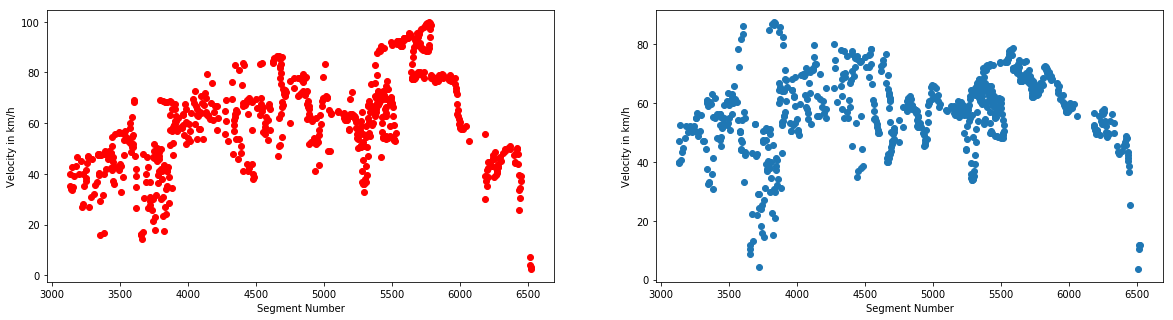

In [724]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.subplot(1, 2, 1)
plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Velocity,label= 'Predicted Data',color='red', )
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('Segment Number')
plt.ylabel('Velocity in km/h')
#fig.savefig(saveDirectory+'Velocity_Scattering_of_PredictedData.png',bbox_inches='tight', label = 'Actual Data')

plt.subplot(1, 2, 2)
plt.scatter(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Velocity)
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('Segment Number')
plt.ylabel('Velocity in km/h')
fig.savefig(saveDirectory+'Velocity_Scattering_of_Test.png',bbox_inches='tight')

In [725]:
#avg_df.head()
len(avg_actualDf)

728

In [726]:
#avg_testDf.head()
len(avgsPredicted_df)

728

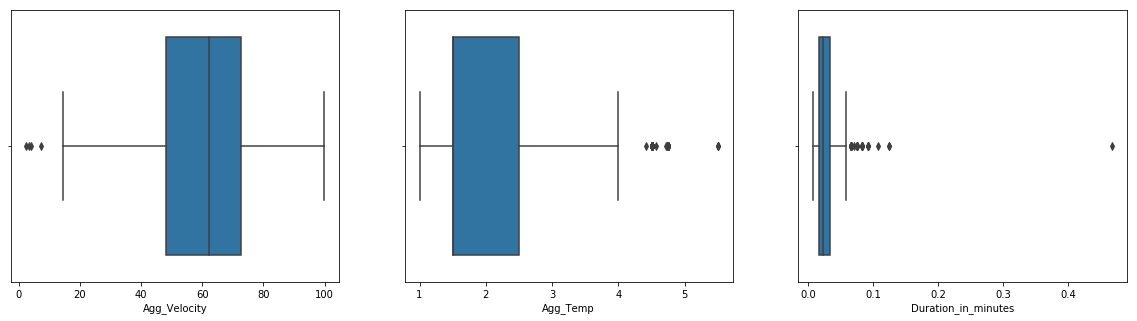

In [727]:
fig = plt.figure()
plt.subplot(1, 3, 1)
plt.rcParams["figure.figsize"] = (20,5)
sns.boxplot(x=avgsPredicted_df['Agg_Velocity'])
#fig.savefig(saveDirectory+'Velocity_Outliers.png',bbox_inches='tight')

plt.subplot(1, 3, 2)
plt.rcParams["figure.figsize"] = (20,5)
sns.boxplot(x=avgsPredicted_df['Agg_Temp'])
#fig.savefig(saveDirectory+'Temp_Outliers.png',bbox_inches='tight')

plt.subplot(1, 3, 3)
plt.rcParams["figure.figsize"] = (20,5)
sns.boxplot(x=avgsPredicted_df['Duration_in_minutes'])
fig.savefig(saveDirectory+'DwellTime_Temp_Velocity_Outliers.png',bbox_inches='tight')

In [728]:
z = np.abs(stats.zscore(avgsPredicted_df.Agg_Temp))
#print(z)

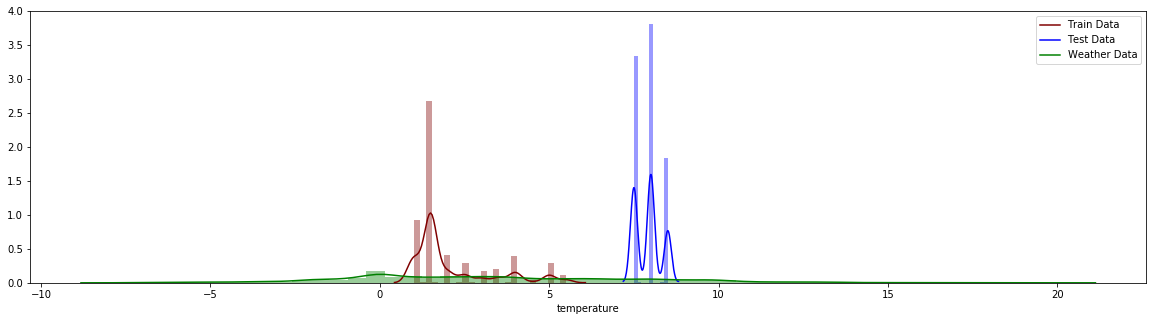

In [729]:
fig = plt.figure()
plt.subplot(1, 1, 1)#sns.distplot(avgsPredicted_df['Agg_Temp'], color="maroon")
plt.rcParams["figure.figsize"] = (20,5)
sns.distplot(trainingDf['Agg_Temp'], color="maroon",kde_kws={"label": "Train Data"})
#plt.subplot(1, 3, 2)
sns.distplot(testDf['Agg_Temp'], color="blue",kde_kws={"label": "Test Data"})
#plt.subplot(1, 3, 3)
sns.distplot(weather_df['temperature'], color="green", kde_kws={"label": "Weather Data"})
fig.savefig(saveDirectory+'Temperature Concentration',bbox_inches='tight')

In [730]:
avfTemp_stdDev = avgsPredicted_df['Agg_Temp'].std()
avfTemp_stdDev

1.1575488504539746

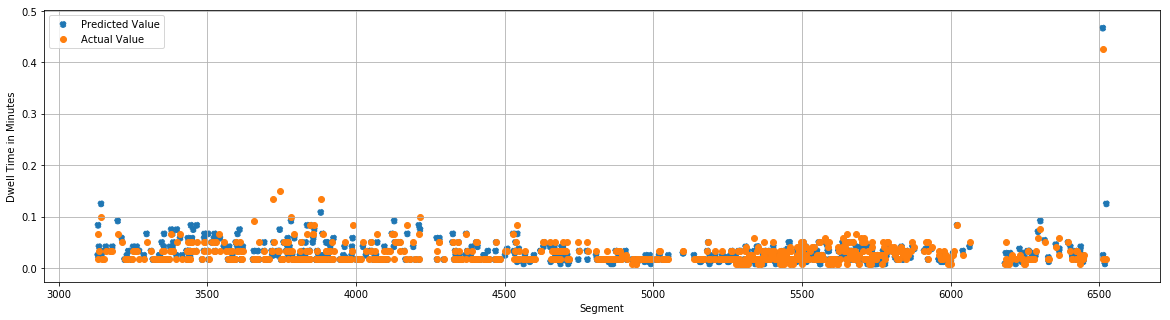

In [731]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Duration_in_minutes,label='Predicted Value',linestyle='dashed')
plt.scatter(avg_actualDf.Predicted_Seg, avg_actualDf.Duration_in_minutes, label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Dwell Time in Minutes')

#plt.xlim(3100, 3500)
fig.savefig(saveDirectory+'dwelltime.png',bbox_inches='tight')

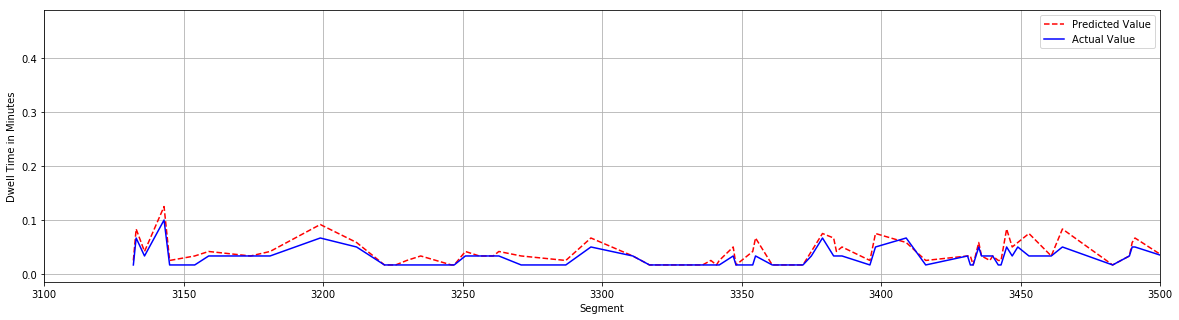

In [732]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.plot(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Duration_in_minutes,label='Predicted Value',color='red',linestyle='dashed')
plt.plot(avg_actualDf.Predicted_Seg, avg_actualDf.Duration_in_minutes, label='Actual Value',color='blue')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Dwell Time in Minutes')

plt.xlim(3100, 3500)
fig.savefig(saveDirectory+'dwelltime_plot.png',bbox_inches='tight')

In [733]:
rmse_dwell = mean_squared_error(avg_actualDf.Duration_in_minutes, avgsPredicted_df.Duration_in_minutes)
absolute_dwell = mean_absolute_error(avg_actualDf.Duration_in_minutes, avgsPredicted_df.Duration_in_minutes)
rmse_dwell, absolute_dwell

(0.00013896054336419444, 0.006610624187271061)

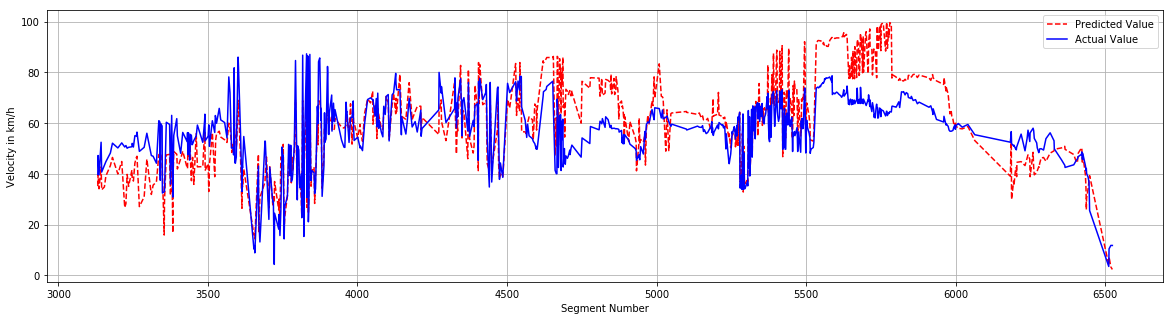

In [734]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.grid(which='both')

#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.plot(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Velocity,'r', label='Predicted Value',linestyle='dashed')
plt.plot(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Velocity, 'b', label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both')
plt.xlabel('Segment Number')
plt.ylabel('Velocity in km/h')
#plt.ylim(0, 0.150)
#plt.xlim(3110, 4250)
fig.savefig(saveDirectory+'velocity.png',bbox_inches='tight')

In [735]:
rmse_vel = math.sqrt(mean_squared_error(avg_actualDf.Agg_Velocity, avgsPredicted_df.Agg_Velocity))
absolute_vel= mean_absolute_error(avg_actualDf.Agg_Velocity, avgsPredicted_df.Agg_Velocity)
rmse_vel, absolute_vel

(12.15939171155438, 9.574732481448471)

AttributeError: 'DataFrame' object has no attribute 'Predicted_Seg'

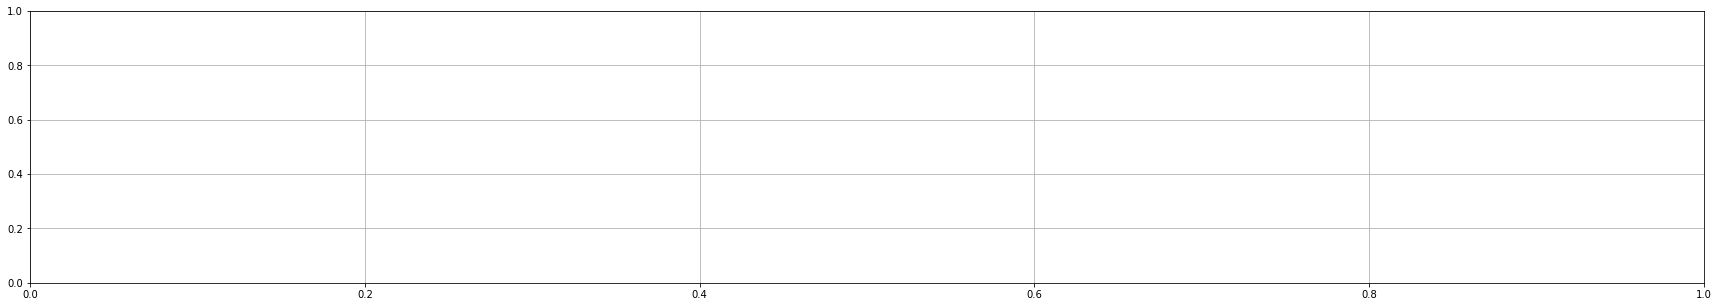

In [1274]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks , minor ticks 
ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Temp,label='Predicted Value',linestyle='dashed',color='red')
plt.scatter(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Temp,label='Actual Value', color='blue')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,5)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Temperature')
#plt.xlim(6480, 6485)
#plt.xlim(3500, 4000)
fig.savefig(saveDirectory+'Temp_Without_WeatherData.png',bbox_inches='tight')

In [701]:
rmse_temp = math.sqrt(mean_squared_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp))
absolute_temp = mean_absolute_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp)
rmse_temp, absolute_temp

(8.382559977795362, 8.027334532039314)

In [657]:
avfTemptrain = trainingDf['Agg_Temp'].mean()
avfTemptest = testDf['Agg_Temp'].mean()
avfTempweatherData = weather_df['temperature'].mean()
avfTemptrain, avfTemptest, avfTempweatherData

(6.199730574366371, 6.581508934294329, 3.362086045967845)

In [658]:
avgsPredicted_df['Agg_Temp'] = (avgsPredicted_df['Agg_Temp']+avfTempweatherData)/2

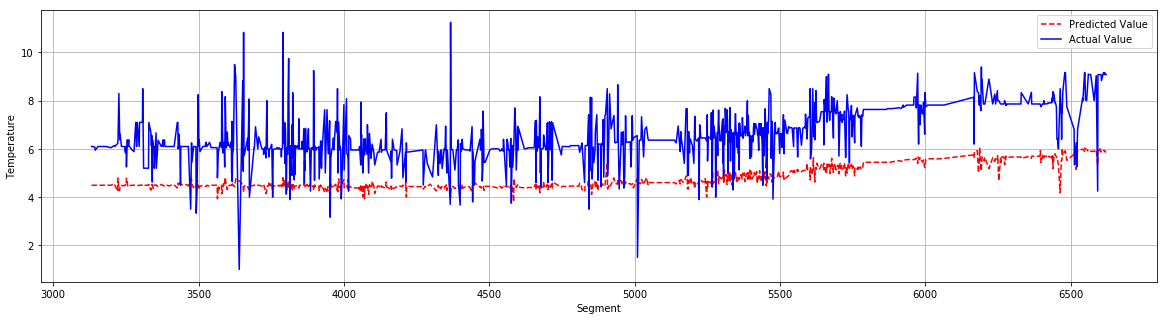

In [659]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks , minor ticks 
ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.plot(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Temp,label='Predicted Value',linestyle='dashed',color='red')
plt.plot(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Temp,label='Actual Value', color='blue')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (30,10)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Temperature')
#plt.xlim(6480, 6485)
#plt.xlim(3500, 4000)
fig.savefig(saveDirectory+'Temp_With_WeatherData.png',bbox_inches='tight')

Text(0, 0.5, 'Temperature')

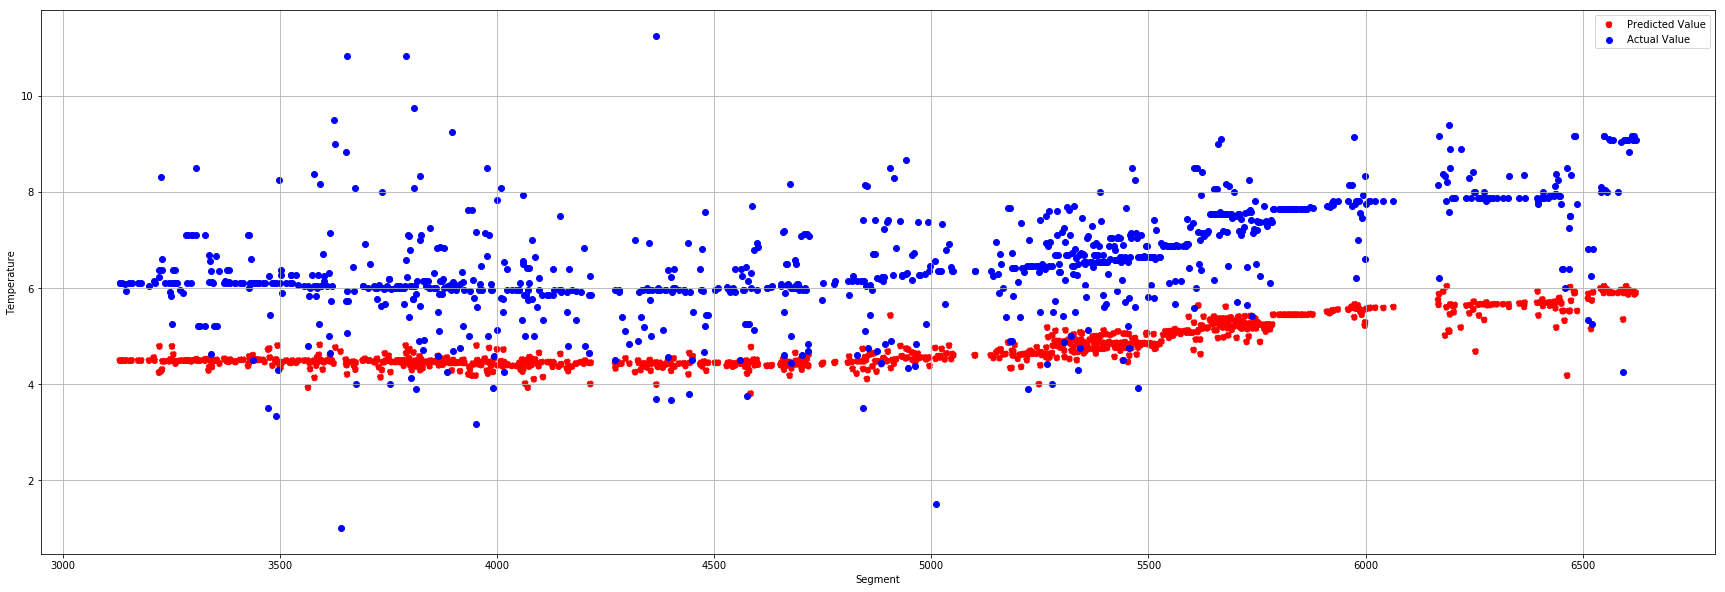

In [661]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks , minor ticks 
ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Temp,label='Predicted Value',linestyle='dashed',color='red')
plt.scatter(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Temp,label='Actual Value', color='blue')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (30,10)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Temperature')
#plt.xlim(6480, 6485)
#plt.xlim(3500, 4000)
#fig.savefig(saveDirectory+'Temp_With_WeatherData.png',bbox_inches='tight')

In [660]:
rmse_temp = math.sqrt(mean_squared_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp))
absolute_temp = mean_absolute_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp)
rmse_temp, absolute_temp

(2.00845186425712, 1.836110017076479)

In [ ]:
#====================================KD Tree Nearest Neighbour Search#=======================================================

for filename in os.listdir(directory):
    measuresdf = pd.read_csv(directory+filename)
    for indexMess, rowMess in measuresdf.iterrows():
        source_latlon = rowMess['lat'],rowMess['long']
        distances, indices = target_tree.query(source_latlon, k=1)
        nearest_target_table = df.loc[indices].copy()
        measuresdf.loc[indexMess,'PredictedSeg']= nearest_target_table['Segment_ID']
    measuresdf.to_csv(newDirectory+filename)
    print(filename)


In [662]:
trainingDf.head()


Datetime  Unnamed: 0  Unnamed: 0.1  Measured_order  \
0  2017-11-01 16:17:31.835088       60734         60734             0.0   
1  2017-11-01 16:17:58.835092       60735         60735             1.0   
3  2017-11-01 16:18:00.835091       60737         60737             3.0   
4  2017-11-01 16:18:01.835096       60738         60738             4.0   
5  2017-11-01 16:18:03.835085       60739         60739             5.0   

   Measurement_file     Month        Day  Year                  Start_Time  \
0                 1  November  Wednesday  2017  2017-11-01 16:17:31.835088   
1                 1  November  Wednesday  2017  2017-11-01 16:17:58.835092   
3                 1  November  Wednesday  2017  2017-11-01 16:18:00.835091   
4                 1  November  Wednesday  2017  2017-11-01 16:18:01.835096   
5                 1  November  Wednesday  2017  2017-11-01 16:18:03.835085   

                     End_Time                   Duration  Duration_in_hours  \
0  2017-11-01 16:17:58.835092  0 days 00:00:27.000004000           0.007500   
1  2017-11-01 16:17:59.835087  0 days 00:00:00.999995000           0.000278   
3  2017-11-01 16:18:01.835096  0 days 00:00:01.000005000           0.000278   
4  2017-11-01 16:18:03.835085  0 days 00:00:01.999989000           0.000556   
5  2017-11-01 16:18:05.835084  0 days 00:00:01.999999000           0.000556   

   Duration_in_minutes  Agg_Velocity  Agg_Temp  Predicted_Seg  
0             0.450000      3.732855      12.5         6512.0  
1             0.016667      6.627475      12.5         6513.0  
3             0.016667      3.573751      12.5         6521.0  
4             0.033333      7.243261      12.5         6524.0  
5             0.033333     15.256550      12.5         6471.0

In [201]:
avgactualDf = """ select *  from avg_actualDf  where TempZscore<3 """
avg_actualDf = sql.sqldf(avgactualDf, locals())
len(avg_actualDf)


PandaSQLException: (sqlite3.OperationalError) no such column: TempZscore
[SQL:  select *  from avg_actualDf  where TempZscore<3 ]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [1712]:
len(x)

917

In [1708]:
avgsPredicted = """ select *  from avgsPredicted_df  where TempZscore<3 """
avgsPredicted_df = sql.sqldf(avgsPredicted, locals())
len(avgsPredicted_df)

934

Text(0, 0.5, 'frequency')

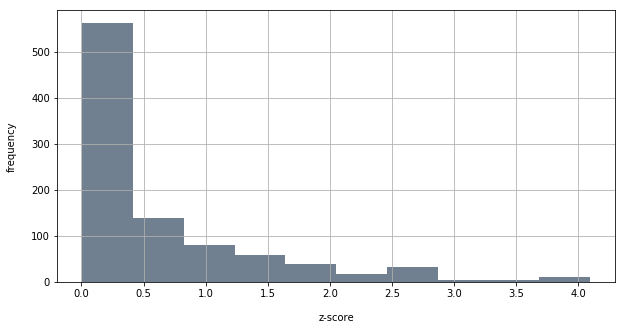

In [1709]:
avfTemp = avg_actualDf['Agg_Temp'].mean()
avfTemp
avfTemp_stdDev = avg_actualDf['Agg_Temp'].std()
avfTemp_stdDev
avg_actualDf['TempZscore'] = np.abs(stats.zscore(avg_actualDf.Agg_Temp))
avg_actualDf['TempZscore'].hist(color='slategray',bins=10)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14)

In [1706]:
avgsPredicted_df['TempZscore'] = np.abs(stats.zscore(avgsPredicted_df.Agg_Temp))

In [ ]:
avgactualDf = """ select *  from avg_actualDf  where TempZscore<3 """
avg_actualDf = sql.sqldf(avgactualDf, locals())
len(avg_actualDf)

Text(0, 0.5, 'frequency')

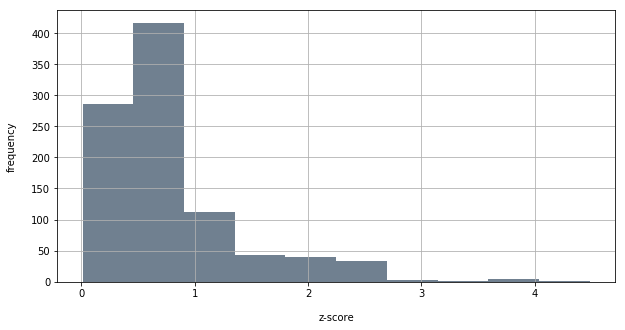

In [1707]:
avgsPredicted_df['TempZscore'].hist(color='slategray')
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14)

In [1364]:
#df.iloc[1]['Start_Time'].time()
#tempDf['Start'] = tempDf['Start'].apply(lambda x: datetime.strftime(x, '%H'))
#print(df['Start_Time'].dt.time())
#print(tempdf['Start_Time'].dt.time)
##to get hour and minute
#print(df['date_col'].dt.strftime('%H:%M'))